# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [51]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [52]:
import base64
with open("thumb.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

UklGRro9AABXRUJQVlA4WAoAAAAIAAAA8wEAjwEAVlA4IBY9AACQ5gCdASr0AZABPnU4mEiko6KhJbTZgJAOiWVu/HyZq+jKzoeF1PK+T5yL3u8/7reda+9/1/Vx/XPUV/rXpd9LPmn82D/w+v3+xeoB/XuqZ9D/piP7H/6fSz1TTzn/s/RX4gfl/7144+M31r+6/4z/hf4z3UckfYfqNfLPvT+8/vvtx/lv+p/jfGP5Ef6/qC/lH9G/1v+A33e3n7N+wL8A/cv+V/kvyb+Mr6b/veiP2g/6fuBfrx/yPLf8K71H2Bv63/mPRd/9v936Ufqz/2f6r4EP6B/ev+v/jO2X6UREKqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqornYsSKH1W0uElK1JdVVVVVVVVVVVVVVUuFU5C/3KE1NC0YsKR2OxTaBi4kZ/45boREeT/vSN5kZfVj6otFgiavSbQHRtcrTSVKcuZmZmZmZmZmZmQwPOUrPdH/RQYyrfHm3XKnj+nHygCRkWG25q9iFGKzej8JRdZ4QANVxbhdLqg3/TR5Kk44SUxNkzUGZmZmZmZmZmZl0yJIscVvN/HruwpeHVgC/01RznA6jN+oGK9fX/x71U4lZSKxz37q7Xn/8308F3pRaxwAQMT9SOFMhfN3d3d3d3d3d3d2ecWeDaEnaeXX2K6cahqz0xifJl4d+8iGxtWc/TXMexplJvA8YjfAY0N7e0Bk/AA70nvUw1OQ/5+2E4leS4yqqqqqqqqqqqqkvHqlhMJ7SBB7snr89kV2Su4qwY7ydxUc8fPl/xGQxJvwuq2pGi0EXjW619eqSKeBcJCPowE10delpmwvwwHsiIiIiIh9DOuTj3B68DCI/n3OLH1UkDWecgVXOlL1Y/TbCC7gcrY337vqEFSeRKCm3Oqr1CWArlwliHa8u+t/5PFW+QZ0BNzup/aMel7IiIiIiIANfDA6n/b0m8

(np.float64(-0.5), np.float64(499.5), np.float64(399.5), np.float64(-0.5))

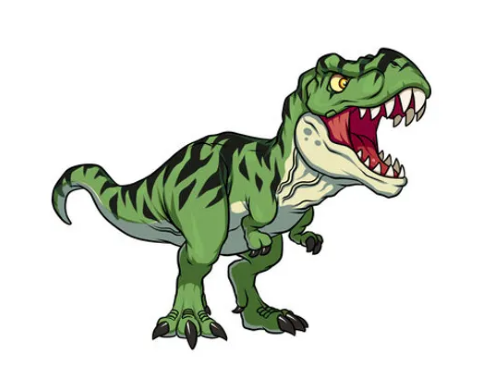

In [1]:
from PIL import Image
import io
import base64
import cv2
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image =  """UklGRro9AABXRUJQVlA4WAoAAAAIAAAA8wEAjwEAVlA4IBY9AACQ5gCdASr0AZABPnU4mEiko6KhJbTZgJAOiWVu/HyZq+jKzoeF1PK+T5yL3u8/7reda+9/1/Vx/XPUV/rXpd9LPmn82D/w+v3+xeoB/XuqZ9D/piP7H/6fSz1TTzn/s/RX4gfl/7144+M31r+6/4z/hf4z3UckfYfqNfLPvT+8/vvtx/lv+p/jfGP5Ef6/qC/lH9G/1v+A33e3n7N+wL8A/cv+V/kvyb+Mr6b/veiP2g/6fuBfrx/yPLf8K71H2Bv63/mPRd/9v936Ufqz/2f6r4EP6B/ev+v/jO2X6UREKqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqqornYsSKH1W0uElK1JdVVVVVVVVVVVVVVUuFU5C/3KE1NC0YsKR2OxTaBi4kZ/45boREeT/vSN5kZfVj6otFgiavSbQHRtcrTSVKcuZmZmZmZmZmZmQwPOUrPdH/RQYyrfHm3XKnj+nHygCRkWG25q9iFGKzej8JRdZ4QANVxbhdLqg3/TR5Kk44SUxNkzUGZmZmZmZmZmZl0yJIscVvN/HruwpeHVgC/01RznA6jN+oGK9fX/x71U4lZSKxz37q7Xn/8308F3pRaxwAQMT9SOFMhfN3d3d3d3d3d3d2ecWeDaEnaeXX2K6cahqz0xifJl4d+8iGxtWc/TXMexplJvA8YjfAY0N7e0Bk/AA70nvUw1OQ/5+2E4leS4yqqqqqqqqqqqqkvHqlhMJ7SBB7snr89kV2Su4qwY7ydxUc8fPl/xGQxJvwuq2pGi0EXjW619eqSKeBcJCPowE10delpmwvwwHsiIiIiIh9DOuTj3B68DCI/n3OLH1UkDWecgVXOlL1Y/TbCC7gcrY337vqEFSeRKCm3Oqr1CWArlwliHa8u+t/5PFW+QZ0BNzup/aMel7IiIiIiIANfDA6n/b0m8FO/CVJbLBtQsibUCWgcM/SimyZloRqH4Zf/EYGWDxS2iN6Fm8+aBjY3quvEc7yhML2d42o6rWBavNFOyfR0RD2OGURY0THLFtc+AYrPjnXzMzMmZy/Kf+Xvb78t/XN9d04KuM6FLo3Rh6KjheP9p91G6LSuTskYK0hSsb48f7NEJdpSALaXr+0VmPBauorFQaTTJOTjtdagnaZVDdZFta3xFhLiHaDqcT+JCtPoRPxT8RWsBjD2E7M9H6fh6W8b4I05VSFHsh/9k4IafcbPVrvWbtlrhD5xOG4pP3fOwptszzAPhbb/pP/CKofwK/7DKgvkKwPxGBzxGROssgFbBM6k8YXEKxAWzNzn/ulNdBgXv/QO0rKn1flsHysJ5JHEWedXZTNgj8AqDMVvcn/7G67soTyDzKYXdgJVKALOz+i45e9iPb26/gI5VOGApiwuojj1o9ZbIO7oJ5lMWRzeI31QTq0/5MFn/qRpnuDN2Z57aPT4uJPNQrJjB8o45wQag5+PK8Tp9tvx4bCPSdWI572sqYD17KOjW2wDlle3Rd1FR+bLgpR+TcXVXRLPKH5u14tu9DX2CHlqFeqgCX//clZsUMkpTNVbV8veooXgUMxHxqWNFXkHlfTh2RDx6cSup1oCis25ZEi1VpHwGWDGzXF6axVuyT/JgRQex5wPdlqy1yQj8lmcu4hg7v2WdDX5tLitAa9/ElSmR9/C9cBiTkbx+URpTX9DjMVeL4YtPXMCsvCEQWRERD4SrwEhMneeHAFaWoXnWhFGDWBoPLms+7zD1OzrOXJdMH7J5POJ7bzWZtrcKO5j4RFOXptECTvNmQ4i5nl44+hwu49joHVW/9W6bnROEVSdd3d3d3d3d8OzenQsOhBxMEEjrrHw19RpgbdjOMGKTh/BvmEzbbbT3VX7N1ujcbjU0GbsZTdCd/2kexkJOoKXFFtLbXyq/9kwhzbEcC0NvxvLsz6xGZmZmZmZmZmiDG3GWwFwiMTBfSpFguBv/Vu6emVd32RL2dYK36iulKDcot984stCOsNEQVajEjPa8oo/C6Hd8/5iqqqqqqqqqqqqj04VCEdetOUgn/yHrPZXi6v4TeeEDbEbGMKpN4uDMbEaRKZmZmZmZmZmZmZmWORYFxY+1JeJ6zvsMzQqimTyyd8fo2S4DNc/dSIiIiIiIiIiIiIiIASDeRbQkQ3EK6az+mhpZPpMotcZh4x4cBg1UEYOZmZmZmZmZmZmZmF8Rz+X+WZ03Ev8RaveGcSCCiRNEIyapWvxCysSRkdTHUzporoOij2I5Al0N1KAfkdiVv1G18aSez2REREREREREPvstClWZncV4Vq5dVPhYk6/46gdvvAQTdbu+a0qjsZ54ixEj3AMItqVR/+KRkWWlMbUauX6856hVl6WVTMzMzMzMzMzMzCPIhXzabCQk7Q1owqE5OX12iCP9n4RCjJUsD5c9X7vldlIZKqqqqqqqqqqqqqqXCBYmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZmZlAAD+/8aEAAAAAEcwhUf65giMEIsbIriJOsYvzmKp8ho30y9PGoEHOEgx3iIiU21ag05v93TzzW/J2Ev9pmUhJYjB6wDMvooWikutSgIcGwbppSoV3nCSFGgJa4/Fy9XPX8t/y4Z3/ysJ/FBivNmUDdGv3fPub2v0q3tpQdPCSJHAthBuLQtMnvNnfOaP6V7yPaKJlZS836FKCE2H9/3WY5rHKpopdKqMWtY9Ui+/OyaEOOVB+PndRamGcdIqBMvQ/rWW8XQnLmtv2H9WqRog9Zg6UY23DRFpgxp2EU3ZV0WQi4ypbMrDjh3+4NS+LuFLOGFWfTDFY8/d/8KcQrypRBSdrGMEGnDvo/Qt+W8ZAYUvCziQR9Gg+TblkLMEDGf6bsGfsSHV8wpG24KVzw91kuYtZlrsG4hyCNGafRHkZ5wNDLZ37uhU0g/D65lfJmiYuhbRrzWObkyRrqBLtTcgPEH0knwcIzZQuofeimr+EGP0G8JalSSIqAexx+Wy1eBkrW4ZKB6nuIGlF/5w/c0h9mXebrHa32Kyf2eGv1cwqnmujBP7mn2yjnlDVza2U1eiVBkaaXYKyr68vrJIlDfZT8OImMYEZ5FYsgNPZFdfX/48QHlzo8464LlmtKTKr/H+G0nVdWevLTzLjtesIDKLeu7yfjf9JYDnaKpfWfwOXtSsyExH50Cg4vHmRkDlo8gvaE7IjUSyrwB2L/x6/8h7ZzzFWnTpcpcgfMl61J+uv4XYmsXdgl22MjEcIUHZm6fDmwHbbooKRCFsiXUmh285K49+VmdZlCSEWIrs4nDsHpaAN0DURK4kN8W9U3y7iFmELG2ylKD8LuWRBOgxB4Mjsd8He4OFrN6eFynxm0gsIlSVH538+uLEfVfe2rPUpTw3CP1p+m3qf8HZ2HvylaEhZ0EffxDKTeyQwddbqkUCCoOcHJU7VvO8GPzVUJBOQ8nhbamefWnqw6+K/WUH4vsoSivHv86XxYff5mLLMuDKlshMYhTGROhCeP/pog2DGtO4XMXZGubykTjIpIgIH5l5Zv0TPzFMx7uMASUXeTtbOXV2cQMuAuH4bjb8aINJpKDMhae0t7cafaIOp72zuXfiaZblqESSlihRvvxYpa/UTUmUX2i4nQ5cDvxcRlOMu4ogrsjaY9nQ6Wzis/QgI5+RWOd5VeTli5J7ZhVi/EmRuoQVS9LHcVJ9WgRLK6vptt7yArjn2NXb2vz+g/Z8T8Wvh2r1oz2avqOqQdaHWtrwXZ/Lgudm7LV5K19b6/86gC2rCquTKEnzEWzjgXe3PwzqTkbtuT1sn41z/lpMFkG+spy9WIpnG56R/sNfbJ3Qmfbr5Gk0YcwuimQfgyzXc443vDFCZoS1A4Phb7l0lXcitAFZR4benB6WUR5aBq8Ps47bulQMH8JFFEtFMw9r322Hf+CPVv3jTFFNO6H8Vk7G0UwRZPQHeCSUsHivFjA+Xgi+LExjQWKT1qtAqdZOBoyJsVmwIVTgTBwjqBr4J/4I2wbnESZKLlD092/P8Q7OTQKfNQKtYKqsitRaweHK6/PG6T1rLCQ8ltlZSvpx3b58XZVVomKtPG/OP0nrKT4zfCOIzN7zCVYdEQGoDQMpzNfNLuUMXDGAoD3PHwW16fV1SGmviH5q/2cm/JNHjDSJ18thmbG+iVijghRHK+lWDJwKIT0AdFX5LS9cLdlvqQOY5v8wiecXj8JVj8ZoXxE348F7Nv3Z8JwreZikhHdU/xoEhIXJaX2JkRHzsv4cHDXJ+a4AbNGe7BIPSLC7zh2poeFB6kGFQnqL7mgWO8vvQCzMy9f+6iAQM4zUVU2TkiRJdutfqE73cz0V+6aozSlGdXBFVHjdyFDBg2e5vrIFq7PeslIod6CbG33wU4YOFJ55jL2c6rBL3fLra5h8tJNU9GFGQpdoDVto1bbOqJiK3NcjKl19GASzqXXR4DjJHb3f99v5F8nRUl2Y7NobRe76h6O0LwwRDmwk27TYQiqnOuQoEGTBIA9QM8PM0NmqCRzN457TTboR/ZvaMvRnIo3Nn1AOyIYwMhDRY4CwKz/+KqFV7v3eaNpmKGh6AuBCmDnhyJK0QoBHkAEebIkLadcoB/fIPisTe7UcXBHlsYeYrVeoZYIbzsqtP5XBKMSRuWqr+qVuPdYMOvk7CEBFP/I1Q+xx3CZEnDQ7DxnAP5exaYTJFhs2i1TL6FNxRLwEJFOMxOZFzqVJi/GNhwJXXrYyqGITwuTxLK7yMvUSBlWqUL52dcGyD+GZXp9XNY3tYuvsVNpLHLkym27+C/bns6+GNuGstgenvpykUWvHc3xr6NVrUdm7ZAN7eixMpgMKLCAPN6Qfe5EvQaIzRtQ72ObcT7CtDFJcPopNFvx+WB0cnnmvcNYZSzcMOXNlC+4KAC8sEijHMBGDzsH72s55ygkNXfG+JUTbnA5jhLaSEcSoeVxhY2+qBNXFt2NR3R4l0xlWcUbSdWHjbqeWIHFPnvpcIO6RYnBofC5LoBCdyMtPW24ZzHzgqRDUDCpbrKZhj5/zwvE3wk4vBqHVZlFCk9YqcyXiOnlQsBMBQ/k7dxLa90seNJp0llAjqgErb7a1m3OBxRMQ4+sf7Mo3MhzFOQd14EpWUaZGiDRA5S7FGPCHgegwYA1ebf46P+oSb77KK4s6D0TEbzPxKJoqBeaqsOB4WCRFFQKgxuosNZmXbzJ7k+RbeXJcLbSjGkrQSNbgx5AMI2aZlEYXCqKXmcbCZu/6ym728wiqgIej9zwV67G57FtlZmytzOTjOy2299/2ONS5QeJ3blh+RhIjv/ukvpipzZvIk0t9X109eJ6Hu2OM7+ZUdiUddc0b9j2h+s8vlV9yF1OYLa8ZKCNFGLA/toOJN0biaVfD+uGWXle4xWagLALGrVuoMAq2oQlDNFXUJI5QvWGEFpvrcNlMgVb2tMO/XAOpUJBK5mCOEdL1004EeUYwPtEwxLOiO/hCYc662467FQoldrRtXB5QvAgc8Sf3Croelg2og+tCTdJ9maIVfWrhsTCbVEHa21p+citB8zImbG6lGOVARP/ZWerEVeNyfb3uRfd/Jc3bvQwJO2x7JdrSeCxm7lEO4mLXnVWHuNyjsFIgSZpK0S7/Vgp9XA2pyX0yXft3GdhvyvrtypEXDKyh/tAb5nDf9PTxYlH7KUgmab8b2JPndQl2vLPJy1VyR8vbGVf02nUv0InVCdECmc5b/Pzp8hk+e0YmUm5yL4MwhtkYkuQvg5F18rwDmD2UrScLE8b3NDgpaNgJCDiQm5/5mVrgsoAXfb0K7PqXmd6KBa9E7bNto+tSxrk89IbRPIAkvP4k0R+jDaYqfUAkd0vMXRly3nybmgcucFlfrOuohIiLtMsGuW2ezFs+X7ZuS3SHKj+imXNKm/jEf6G70qBVDB/Ls+i2BmQoQ3+wEpIrbN7h1sO/PMkMniD/zzkdmUoylNRuu3zTEoEsFn6CHUHzB3zwNgEfuj8JfFFiWGn/sYh3BioR1MCcOKQxZCGac5ALJdPwHp+elCNuq+dzM6FTUxffPBzBW6JhHWm7HNhmAOzU+2U+V5WVniU0ZcUZp/sWj2d5Zg6eaxqaC0KTGvvoADpaky3keFOszV7RzEYREp6emrdLOOzPkAQzXOyOo2RhFGLpwYj3kLX3ihoUiJU+ggz8cKQDokJs1lt63cmUVBMxLhznX98uhIM56QYBOv5m5S+Fqnd3/u316bD2XittnwesmKFd7/VSpioX7ta3sJxI9ImyaonIPwGuwEkUFKqRQULKcNEdtgBflrEXttT8sQeI6QuqlxlCphNOCwFx0/4Yw1hzFQEnUYCdqdUdltf+uvK+/yUc4UIoJEeceWRxxx7fmsiCYmlTAxnLbaVH21BJnRMEJjypHCscQSrnUZ32/rXq5EKaAEUseGtk2TALvTwKY/+6Xk7wMKicu3SJB2WDsjGGOAPa0Ke+cv4tSYmVbQiLvZCNv6dXuVMlDIVI+TcMaHzAoSIKEJ2Xn7nrwGmVCfUWKKMMwjaFE8iN1gC6JQQWTqhbs4NP7JCr6iehuDzzwM7uhIL1mBlF+fVAI+ZG/8G3ZUWoVMSIFBIdmlpbxK6COv1MKtVu9DpOGGyWvUVTd06dHy53eK7vTdMIwo18ocKDegjedeUNy12Q+PAC9qZYmIKreHzkdNUIrdB5QNbN8ApxZ+FjrozX2thUwKkker3mnErjzy96dhu65yfP9TVn2qZZ21rtrtNrxfgX7nJm77dtbK4j5qD/wp319ooQ99BDyqlsy/9vYWIUIBSXZv47KC49ttqhq8zNyuHHFUpMyxK4MjEpMbCo0HK0XCANMAAAgqAIJ4PRfUzDhbrhJu1QiTpfbj1oQO2D6BC0eV4LAo1iLxODxr3f9q0ZCgDxU5NbfZZq5CTur32GeiGfJG12wiIddg7KOsDrhhHP7K82lNJ74Z6PGwdexahNzuA4N1LaGfqFT1c69yjo5GM3w7OInqd3tgYVo/RrtOksISO4KpLABJg5aZF61HhDcQyJ9xekga+3d5irEZT6RVod7Yy02He0UmXJgNCz0cj2sgDOg8jelr0VCWxHvlp6OB5kOWSBCIpFWrXVb/h7gmEtOZvD2J/OFqo76g/TD/Ycvw+oTBPLb6GfJfqTtDJsl4ex4B9yPFQqGkdIw8R18fMooUzCctjrT6MnqsIZ8ipdlDQqyosFbYHKrsXbsh941+KRxwZWfz3QCRfnr15HhTTsEQBLICjoxU2JwjhOgR0YG5VKjpjACpz2S1OBBj/FHASq7b1S6OFg/UIqMVsmUFGlpKhQoPntZM1jafLcEPcaUIPiCpIRZmZ1lRhAUlDLa4zqHtDVp5SN/XqBJq8iG+z0Sm/on1AVepJaJwy9qg4nfhzUd1QJgL9EOSvlJxbv34oRsqVSv2mj8LXkZ0Y4PITq8FIALf1K+LchfHYn5KWP+b4JluTpYWIsAHKPD/1YGiCEn7Rw1qAPYIBT+bb846a7l42gPOQem15jsiydMQrEnYqOiic+UxRrFqOrpQp25LqRDKSAugVjLkX3QEpB/Vq0H6f9qlqC228Ip9lNqXLE1H5oLmuNxzVvsQjjQwZtn5EAh00Hwl/sBHNSGGnyiERSb98+RQOtazs577V3LE4lMY2817/V7tvvsDi2W90F8OWoe1Plbj9lz8PpgIRM2OF1MPTCLVU5vGIJ9DSfg9ArYWNTEfbHff8EL+RoCnyQawubpXk4b1ghtfAAnMEUIAAABMCTR2j2Ce1GjTr2nPxmyomJR6u0NDwyAIC5imvSUAase2NJm0Mnd0lwbJRLZsUTBm7O4n0J0tPuoUdHjDObNIBBHPfV+uDVX9hdAUe8ID8Oh1RVOf9sIk+WGfVnyc+JBZEx0wLmPSyR05Mi8ESdAaH1M/EKV4u1qLtN4iT/NEvTt+s7hu+Q9WbwPvXd/9/zjYfWYliV5P6IG9Uxewa4j4Xxig8X0icxrInbtUQXQ4wRJdL1OsZ4KbeCCsrTToKgSpWfS0AhSfSvJ7osRrDFUE6NTmePGUG6JejTa/3Q93fQ0sVtUwHlhsPhl7GSbw/04pReGdNIFWEB08P1smMkncAhRpTv/IgTtQpEEGuz71GvsokKQ0rOCVYuPb8vs7o1RRFAmuNWoGrO+bxmCDQd6fQ4uPnRu9sGNAdT87kxsANTL68FO4sAjNsc33JQgKWeOP3zvKAIQ6sODOfF+o8WcNkCAnVaqhT8bpAX6NtlRLDcrIeFA1RKvsAAF4KmSiiuQj/f38NpLyuqqgoXxqm0i/hcafjMXBEu3PolcEK0OeXVYb1I0f7hNnLlKP5SBUUbWsd7AY9e+3atVmc5v4pDCacd8i9tLZgE8WxxDOcNAsik3yAys+H8X/exhA1bmowTAj+3rXVGUStuEJUMrGT6Zsq3GsjoLJEHkDNh+QmOYf/noqiGCh+qbmp319zz27+O76GeSysZ4DDb6Pv++NfVFFts/UL//kGCxG180AD9GQNomd+ZslgwodWY04QxnwOJb3BtAP2dqR5cHVAEFjQu+Jji/RfiA49mHPkgM9bVCccVRVxWLoDxzH//g18ggGTsIL+XIoYl6KyBBxeZ36LwT0gOW1kApWOVS1NEzK4IYjqmtZrit0MeIG+DSG9ZfEdVQ8R/UX3sdN/WXuS3pb7m7SMwgfE45kW+lX3JaNsKAtCyNuWpSb43NGnc32P6NHvBdMw1EF7ct510SKjOST9hokEqHj5AFl0PiWFzPBN2I9S8YjTnt6JGP2jsmXYJjiMOF44YF8dxqkpfov7mwPql7bBg8Ni6l/56/0iSHK0XogFYG0dgbE97WxEDJGcKeq8P8IvbqHhOU7VbIXOZm+CFP7iuiKPwDkwVO8J4Iovt9HbQKMzqnkgWK3+qHw9dxuPsL5HNm+v30197bS1smon/lZip/bVi6sjmTxAaY6/dY1/yeqqy59EqNJEjwLom+tQSds+KAuiG5HR6WtKmjkEp18zLO0C/Png0SpnzxnLnhpoPaZCBgvpNw9WSj/S/BwOWz0mkCgOEjah755jwvwhUZwVNM6G6+A0UIC+0tf08HcsRDdn0fnxu6xWFHkeU0KUmhQd1rQIRaeCzNyqFOYVlhcqqlv/CxUzYgxRgIAaGPubiWMA/zzTaPvCT/jx7O92sNvjsizKHse+f75zIeLK8TevJFtXAO6qVWe4LgizLLzTPOm4NETLzrPknoednr6qIso3DupSi/ZX2LBsVaFgjfJBsCJkj4c0ppDZfEmF0ZVPb6xZwRIGNlYU5wSkEgDmw/VLn/Nsw7aNuEORfYAqC7L77u/LkRhkhskkVCCwZjm54aUUDA/v6N+wb71Tr2b87KCauwuwmoEIW64Wd9tdiNSbPLBhne3TyjVSAzfflNX/WLLSdnQhtcLXSAiS3d1BZEYADEtdX/jdgNgMOwGeL3qeW9zmc2TFi4wrq2h1TlfMwKoMYA/ttu+5fJ0zQtdsGgPFitxgqNhK5NqCJaId/bdTGtUuzahLphZmi5In4bTqS8tfrOswI9rHj2ittbwBQFRMa9ye/HlziF8Tj8E1FHl4RpYhkjHznxeRYDJOIhdhbH7wxYoWdYGj9ZYIMc9nJOqo0gcOoPp21VyFgv9mRMQbKvIImO7hvYEYtHAmbWDl/1+g0naKSAP28wIq57F+CCp0Dm3r+Nkhqbtw3ltJiei9Z5QmAsMQFx6mGvSUBKliL3q7AOBeGe6XkOCx/u41VIMwfr4SfpnSKRQNRyURpInE7DX2c/4tPzEMVGI5WQJXUj94Ttz9l8hZYgudlfsgP6XJuhn9OHpDcp3rigV3qLZrlT+vwz/GHjtP0MecynF2lg/+5EIx2ozyhR+sz+UGcg92E9gWCruhbT4pnOv7t0ynQqQSs2ngkHNHkwlPiNnKfmkr6a6vPHEbYPyKFNC5F/KqjX5NgNIwYEwMCL4Oz/3QknkFS7CWTAR4C9AJ7SYIIC1gOqpBXy0gDv8W6uIH6uiUJs1jr6mQ+5CHkWelL2gSxthk7EAOVwxdEDcO+WGg+DHZNIClBkJDxDAa2JCPNav4jwL+GAOAKzNBHUxePcpInb+aAJ/WaVnbQYAogm74haSr4Pp+J38Eq4M/zl5AoqeIwkJTST2984Cprg4QEEDtVTNB0HHMRF20G8sMbZmVfEMVKDHVDX442KmunsN4wVLkOQu5PMHt6skJa+aF/dVsaH8Eqj9u0imD73tiE1FJKUEr6ApqzYWZMIIY6PEO3VVhuHn+NSX02QOkzIqXf2jnobip4WEiul77lzozyR6fahVrxxJf0qNQ2bk6NYIUEvd7ubXI6tXoi/o01Q+7+7/cDGQ0jWrqEycZKISPRtwwK5pNG5VfjqmdkSSf5YzvcdoSpyp4z9RBhG2hWO+/45gCwE47vdOcok+KCXzZzfd1KxN+at4oI/cSI9G2spvMV3UIqA5IpvMBQaOUbyZJbnNsI1OLBm9G1sssqRdK9QZ2vy5P9KqBWtkeO1XSP2GF4tdkUa5apZEPIpFMs7m1xsW7hcjEjw11s9ANWl7h3QAfVnB1E1Zcmz9HFgCe8IkAi0+KVsGdZA4B3hOEpj95h3ri3d40sMNPxVO3gOJ06u8GIx6TVkuwj6yL+IUbS0JU5u45TmvC2ZAFIsXBm0qg8Bh9DjaBQ2MOsu0bJWs6gfRQ7PlEfaMaCKkmB2AOKkdU2Ch5h6rd3VpJ5CAUrk01/YTOXBVCotzlsYRrFCEH+WwuQVf2ZX51FU+cl8jqVRPjTTPrgPbOzHNMdgFLmsYGFWRiXqE2q9xMY82wDpmv3jRMA4WbZuc+44zubWGAhOEduf28Y+bRTZVR3MqE75aegz2EfFjNYPnlmpDJugezUHETK/kUFGOPxqrTivMTLwE7hE60LPQEHT0fbwTPCLF6JOkMB7XQlvaZ5Ak64Nzx6lQVDTumaXqPoyM5LvOas0JgFrfXCMsEEeo3y0l+tnI1BcatPrLXfEzSnmrvoRFWKWQlDJcOXuLzENjKj5hwhcBk8S6FiwbiIHb/3emrQmuHRKa+gexzMMcmHiJ1UrQqB+WjQHV8Pk0uJ0BLFHnnaHUOKofTg4k1hSz3WxtC8QLSzr1e3lKMEONwX73N4kgdHP2oP6ah7NoaZZ8H6mxvmh96FMLIJLl0FPHhgvhg8erE0u4ADr7mwAnTI0K71XUsecWJoGgXmaA3elePriRP90ZawwlFTvhtvLyRsqHVRLy+Ky7g6gMhABdGwlV2SlmekHuIEYJtTFbE2tCE3h5VF1a2PaGID7PN83xG6p6i6xzrNXt7WL1dKs/tjiUBLxfqKRqH9vPyUyAiJGAnjuT3toLiD6KtySLIOR3V3s7HYHsvUsjxMV7YJW2M+e/uLblyh88uELDqDgsS+U9ItrnSNtW/se4xns1u5H76rShEXIj/7FiUtPZ1slrxqAyhTov/0NNLvmuslLs2gazAyI6vQ+h3CBJ0pQBXg3hIUQynYWkOMLQnCGOagoWa4iRjROxe8Cziln6NGoZRbjTnluSY/uhO/SoWVjgyMEbeseZhqS3kEkCuQwWc+VAM6yEwZ0c4mwtH0QEHg3Npdp5R5EBiMsB/KjepIuB6/oSSG0zk2V4CFgmNJ2zP5ySdMYUsoljWEsx8uZ6aUKe7RjnvNCJiSDxHNEMACqx2YcwAX5Gvcb6rFhR+G3zn/D61yyLaPojRoSpk89De8jHyQD11o5bsnf8U3Yv3/E9tOWZEh+zJIvOxDj55OAvc0LNYDNx+LC3xepB3ERxBkhGE/uStS/lGRFrt0cBgegSm9AR1ZfLGD8A/HwcVZbiPy4iaZJ4/0a0HIOjmo7/24kqQVvYMPUC6W53vNiutFptGACikK4cZ1vJ2E/R6MOdhD0VEbDytK33EABI1VB+a8Uno4TR9JWzkxXCf2juiTarMQ82Af1vchjjAQEruC3SJ2aWprbGFMNiWHwQIs0lEyhReosysinvV/KwzTIaQavsLtlsbdxivtVzmQRZ6nMFtK6hqwlLqzBajTmidYqKFMuXNfbEicJFCtO2ye196sZx3Ca0wxiP3JkwJUlqMEoWx90ECAbew6qedSc4dDUkVObhMJSigg2Rd6CC6ck2i+ohtakfyTFdGVTSls1oTYm1C1tNXjILb6r388r1PLy3JF8DQm/3brt7y/Kl60WLRzrOUlvXVL5j8jV/9o6i8mU9p9CPQ7bbFISPkQV7AmxrUFQpe63zEK42YiU4yIDvD9q0LG1dncYdTHhlcJMCPlWJjYOXZgHoDDiq6tt8zac4JV6kd9VbJafN0gGLRc3rOLDMN/Pk7GSo5hKckU7etZKmeWaw65LuU78xxLeMN3UB6+hoZWX8JwaGfgusNV4p2xL/xXG6l9BiFOJu6znNNU8LAibCU3fhO+kx57Ea8l0u3QINp98mRg+NHPz2d6LOMYCa/A7OFJbKPS58ADA52Ksm1K/pVlYp9T/NY51D13gD6HWLPaN+A7Q57mr5jBdAx3BxH2tC4S9VDKdDoDfQUBk+eKvHOnXt7RwEA6+9FNEdhj093bhLdD/fzEaoTggeSNi5Men4X3xZMJzPvDMTVTPnE64L64jfgo8I7GXUpquIyA7J4s7djSfqEW4AManr5z3etPMoCYcEzUfzmF0Vy+DSwzKf75PBD4/s8a90/GlXBVpsXxcs6dOMlhZ1QhFLKMZyHvOqTuJFSsy1TS/ECOyvPj7AFaOLGGezwew8IN1ZBMuH3MYgDse3pErmLB9DrpTJacRcNRlQ9bL9JAzfwM6cluKh2aZhNB7RLwbKbEkqBu+H74wIvcXKsD3rqsRU4HaUMCDc+EZsRDgyAw5P/e/A3yXZXtBzHWHWIvXiI4pO+XVJusQJRQfeKbxxGmqpBoxuA7uf5tpChRnZFvIeKLHcXvhWOIkB8+vFaYxljbIazRLt/qoj5kFR/j2vSOogcz5XT2woOEIg0rkwILannWX0eg3uHBPQtxmawfZLrmxrI7YfI4VKHzlkrdQ40zuJFnf+5del3kgN3gKm9NXaGeng3DGtuGM/A3LqdJbLH51nIddoEjgW0Wg+xb4Ic/Jxo3qNIRRxrCblNl/SEmCqUwRNziW6vdqngVWOnbWYu1sUQNThAd6WmyEsyDhYABJCcZCay32DlNxTOwBlvShony8howDkIajzsfjjNYZBF+9yObP3k3vMVBRfhUQMKE6MIAXNROl8CCAsyLjGTm4wU/nJGNbZe+s3GfJ6S0PP2KhISUcDI7M7ppKnJ2D07uZgszSmz2HwY9RtsP736sBznouMC5VAE8FonurLpYyMs1ozr19UDk/c3gIpReDj2c3u9dHnT0L6dKzFLmbbkpDFmb9L8B3/BrALq834TE6tEPsBuuh1T3dYTWtG7Y8MH2aUba1iHdd1rG33oWdH+lmqErPnqnmHGOaYBKPl6KYHZgNsGmKybyyPZghDmZ4t7N9ikpKK0I0uum3Ua+RgKS3QzLvn53wC1UY2NL9PPyJpJw/q5tDbO7+Zzls5wKL/HppI5dNpmHhCA1dOeOe3HBO5kbB654TLYWjxvpxdcKZl6Z9i2hQJH8eIWbj5y4LwvxxL+/ys/QfQgDjyJE0Y8c61ZsRz5UMCABGYNxNzKtkOv9Kc263AsVLt9FRX4d/UrUDYgoeKSBr80r+Dyzzj1NhTufNO+D80wEO6op6ioVlzhnW7d6m2p5WycHTgKxc5WrjWR8bqbQHWwPhWtQR4+ekupU1+bzQeSnDno4NAFwKuuu51IGLshpJC4iO5IO+ZGRJSYLUvFaIT0R+QEeJuq5uIXFWqBPYuPQHfu/dFqXCB78owPZbJ5XlDd7B8qDIBOqN//t6KORvAI5+POf5WAnacOMmf7uT7bhm0XA8ZvqDs9fk2PDq5C1QJaKFenPjL7e3Xq448ZpuCy3xT8h867gXFck2RpwhrZhrm24eQAFM1hqNB3/NkfpHIw5fAM0LUOHF3zF0m2c7Ho1Sl+OriTVNdPJzL++IvBOJx24A6HLurT6UzCWXDQzruAKnbtYTUn1KXWDl+3HjeU0P7f14eZ12liBm/shWrw5d5UDqzGQLVTQBOzLD3q4vmJY7mAXrnTHdb93wCUpGwbjYOeXtZW7ObRkM98p7KoEFlSFYWbAwPFp5Mgz3tf2LxMelN7vpLlk1sFo5p9s3dd/rdT3DFc2mpB9s8L8RD3KEwIxiJ4wDqFfYaozHSjUwqikXFwVE08/IcdpZ4pO7tPtCIOsft9xBv918zGcb9kwR3HnPdi84LPniMbxYubmaw6oB/RT6HugFLMCXxtoS+3ed6jc7uzqyLdCBTjMY0+V1bzjuRAydi+2aKioyt/QVc5scqpuR6LZQwrHoQq2rZV42Z7jNzwoO06h1BUEwFQneOdxQlYJKKSCPtk5+b7zj8DPR8CksMu6pvixQAVx4VPmP2d6JG2iwdzztiw7tnSOh7ukyypXvc/RxjWeh6FPYmpxFTpo1/gGweVtjKYgSxrb44Wx08GwZ6ySQcvx2K8h2Q3H93RYTpoDXW9kgELwnIoXc6AWTjvm/66M7eCnRkkkcDn3VaHPm0PETrvXhyta3lyc6IOySt/inj2zsL4RqExlJdOvBjFML0hoBYZRAaJhGmT2aWvc+MrpGER3t3qN5zPUFuYSWULpjCmcjOXkoQolJsBabCz91S+4A8qIA1KdC/wdHwjmqPaWpFEdnsERfX7d4MQWzxPOyb6gopvdb3/9LwPOH0exHPi2hkNkvrGB+CXjGVE++LN/e6gakzI89lu1fYB2mwlqrxiFu7SfJr4YkEBXjHauvrwhHye5CkA8SIAFf2VFZPYH8+qxCs8Lsn83ymPzpmoG7E0rOsoU+f1Kih4WLag18iqI3sfH7BtyQqqtxqcxOaAyZyyQFHDcyFhg4/wEngMJmIAOnJcj4mP4tauJHI04Dq57Xn0PPjXy1PxhwY4dypk77Kym/LVEJZtJm1ARKrSe1CiLD4ekMfAJnyugBzLzS+0PLtOLy14fdv/fylBxEZXHRRryu5SO9l1/oJEZMOMlsh0mscDZBSz12m2+a/wmYiN6jit+YyMCmjH4LdnryvjOKTQw/0d65bMHf4SDot6eUFsBc+4BnHwaHGfmPR+4vDO8992OE4yq3ShSQ9HtlMzMK9xft6KoHCoC/CKA36Hpn7MyeO8sdLrvtNm7Um5FTTKX6GpM1y2Kwsq/SvPLcAIt6o9qOTq/YuGiYYXbimxNzxqRodf9L2COUl4VfcAl47tgN6NGAAAISuOXvsGFTVea/Qs5d77AXTep9ITmyFKGuN1yJEYS/8GkUdeGeccUMZo+HEhD6Bfc5DzF/xe6Osk88UFicls3sK1Psf5oZv3XkPKaHSHrlq8uoEaBaWsttgmF7hjEazph1fZQ5zLrMfHWCzx3ecNKoVGvIpcwjV116Jru4s8hR0CJ26VyKheYBSZM86lcMEnYa/H6JEWki30zxga96O6ayMv+KgGtc9Mo2MRyllKEzR0lHIn8bUxk5ZZv1ux5IspF0ONIdxZb+mW3lqR6whlmdOHnjyPXdSWxPB7wSYp/tz6wRP3J8vY4pCPOAKn+aD0yO8m/3nOUYaI1XpyooC5pJfVuN+3qrVsCbvUhGqip/B1om/4Y3ot/730seilKNgHm5t7hBfIj6+rrC4DUC3Zn5xpPuGEfkwfBKiAD1Wca1WfQqWNL81Sn9LqV2c8i34xeaM0nqsgyQDdHh2FnFEIKSt+aux4bzrVJvvo5ibklyX3syyc9F9TXKi4DA7GvBOAEJNNiQQj89v+u0PHewezqDZUKNLc/2+KT5FMyq7YgYXb9P8NllSJXU/zUO9Hp1i5SH3M8wxxd8KlfTApcIUc9xyNdHz2Atlr3bhYahDgTFqnCv2L8zJWGg0gyLb13+j9ku23Z1HUOMJkXfNftNwhqxv7/zZtrgAVW5rg1pHdnQBUGAFK4s5uBIeavTuk+uzhldodc4IFwsrzxZFy5bTAXfOoINMCW8OV1WTTLOQVw4a5ElhSV1reh0OeMLFxYmJzMZOB7zAXllCFVf6ryNfZ97dj9/m7lV5jo9xz7eBRJf92xRaHaGwI1LjqqXB2SSleSqHhs4JBgA4sf9A25zYEcSc3jEyWWDrzq0uHBuNfbIIsACiHofdxFR1YiozhXebHjfiYcZeZ412RNgPJ4MEvVHga5FKqupWu8REftQ3n5Y2hhZkYta8kmhHnQfmJW2ZYiBqmxy/TUKMzcNza0qiwd4eezKRhdV7m3UwjBfSsdI2kJ8xn4hm+YUY6LSy3ht04BNamqweYQpD1ultNj1tHDOPd3YX6IdFn1ivzgiJ7yd3emPiet+6/5BoyjcPzy3yJ2KPOLPpsndWdREVu/Th3h1Ac7prSLBpipCF6Tw56mqB6qzqmtSUIDdKtFnC6Oxyl836Z929Yy/942zJcyqeXX3doJTiPUT6hpiKGWlykquzAlp2WVJEqXkE7uwPCBeMz9vvp8tMP2ymCo5Q/dOV9hIRwrFBrLAbx1ycnms57Dwu31mgVZVBB8lZFOXRteQBypH6flF74PVlZXKH9XtHY9TnInyrR2VCSmZftNRGluals5hfMad+YOxEkFtgvyXzWpI3lbJYUF5Me+ht/IODMkTwUcX7OIkOL6IYwM/ieXWB369DOK5hSfZCsIzD1yjs0TQgLJnftD4AaSOqtgXK+j0roKBHU3KSFKZUryhV889U3nSGfTmVNchH7O9EsGAH3kLHn5MOeQVWhUFAuzs8bR7IcWlKv/Olrk27YIIif+9SA87lLDUaPfh4unjF+tVUZaGtYAta8AdWu98RQjAsCpoZvbN849z/NhJOKcKCUcMDPpg9am28nLAJD0XgbD8gD/muuccsjU01CgX915TEzVweNrZHTEyzyW5I18KcyNmr8aO2OgX5MZoUgageCpb712MI0n4/+3U6Xn2p+tT/9Oez2t4j4iJKQY4dKhwZGywDZavxsphZD1yJBy+3oMQ1l+XWUABsA71KWpv5SZMRIXIvKlIfZn+PtI3E9BIdy1kAeM1e81YE6ltH5Ydy2MjdWmlY2BiNMAFVZzvzQM08UGsP/vgenYbAs1lUxOHdDl9faLM5bkrcPmwbXs11bLVD3R3iZmsCx3AX4rgFbQ62/k/0DThUILRQ/Q0fq9umxIsGFTrGx4kgn8iKQr5IOuVjykGuplrs7m9G2Sf77CP46YcYIGCH6203d2xEX9jrT/Zi30W8k6XLeNeiNbV8/+YeAhNvZO2iIDAZr+Arfzbr1BZIuMOjoM0SzPrrFoJ74Ckmp1zIGnNfvdBY/IKmlS+iC/NoZwz4/a2QNSTGUaGVW2kBewf5/XNVFYERstSsMDCqUY42j1oRm1BKMxgwORKVTNlL2kZ1FwDzqTCBQCoFJLVBrWV4CwI7Bftknk1cGrakH9sxmolz/RVQZowrd4ThW8kLAp1R+HGip3RJZXg885RJSlNKWrji/rPXKzDS5w4y3Q6oEuViNyRfhUvslcndIKLLhChbAClGR4UtfoGBWqmLxY8N3J04JyEUodBHndYF2UrPn9vCGYHlhusYwMQ2YqLdOc52iyRRkQlA+mag4IvcnrLImwItBLaNYlYaISGDMnING+IN5kfSQv2nShjydRy4ZWWA07DoZQlhgjr7g+jPa4Gikjk/m1YFMKelhkfdQ8uhd/nH8FAUCl7EiO+dLLV0NZZuUlgAyyqn2WK4bo1Y7k6lFjWuU81FnUXG1jYFoE8xyhAxqTV5D8IO30ewoShYM8fz0SdEm4at5YCK94jAdc1x2um7ohvYrXVLPnI1t981hjEAv1BvjX1iG2tf5gzSfSsbfdSo6tmwXqrlDNRIIz9VskIfTWpBFu6/u/JD5upH6ijq4K3zE3vce0G3WY/6Ca8L3H1J4tGayua3PsVcMDDG2POs4bCcgAr+85aO0wqJcmB3txbB+fIU/SgRi/+BnuzGssuMEopPWzdGyTVX2NYQoWMan5/LiMP3wY1BHgxgGyIeVueZ3Iu9bC7YHsLXZbhry3q8552lfGwBnL98Pn2BYvQZFOz17JFK50k+n18pIqIc/vimHfjhfLwBSPI/2ga1/xorw8BQ2OdLYcdB0Hs71kBWw/DxYAK6yeSIXX2usYIWBSP0LR68qg6V2ppZPbqXQZhKa4BnA/FrkrFePOB5FDkYzOkVn2PkaoHh9/JG24KTmG5YFBuTHVNe+atbGu5sNvgAtDrYB/bTm+2vLE/tazcNV/LYqjJ1X6ZGoRkPzMtqXTdTA2eFMNs4x3/jvA34s3lECqK8Ol1E6kDzmZdTis9vIMa1xpFDGeWvAx41dl5DlMzcyId63rjxfncIbS+ZWghJLzv5XqfCxD+mO6IPjln7mjXCvc494yYPx3Q8BajJA937NZLlgA4+/lN4kAAAMO3iToBKX/IKVQbMZVOht/9BdITtcgppVYPwkjtrCwEBi5XiHQ6yl9i6e1Wu+rF69QNWK/bKcaIk8dOGtA+berQrQ4rN6kTpaADqcqEI9tW9l3Jl6no9J1sPhxmA+M52VdY0asdUKnHDYvNEqQYDEWBWFWDQixuVKPgKAIsPp/ef17L1jffsZKqhuiIHkIXEfxP5YoJeLNXzWXPPsknss1cPe6bP/VzR9ucmz8zFHur5eCo5eupbYgZjmLqg9b6pu9S/Q6NQ1bkyHobI30lVrysJKLYiWBHpbqT58CHRQEsUBAz6XqT+Bv1cj3b92mhcMWQ2FmCrr+lI5blz/NLsMWVM4Z9iVR14AFE/ZEr7Vn+URdjXdbLyBbhxFDGU9fIxGen4QVihXp7h1beSwn/u0w4w/hsbft4+xkcS9bIj7AX1XXPZfgveIeWBdS1bmP5bZxreJ92byirg/GnpmUvHEhGcl1m7gzOGoW801AiZ7mxgKRSN0UnzGm9Vg3ID19GvBaUTUHRKkG+FbvADmLJSy5IpLmU711XjOlnrKydHI0CaE6570KJmbxHF4M63Yd2jU/x0at1GqhgyTRfvuMAi7+IUOyXscoa1bNvK1E4L5MmK7zb7PiIJHgbQBtJcMg2KWaAlVv8DLQDTE8qEa96XprqNGAAQ1MFvp8hNP7XBICNp9pHIpyYptllJYe8I0GYI3LyCGT1MqVy3jpJxT9TwtCwj3tJCVoqx8aky2SKhIn5XMT0D42V6UT7MTj96S83janjl1YqDUeMcAvHQnBBEGQsT7vU1NqKwZxw9X1FoA9DkhgoNGOH/NjwxZpSFcRw0H96Plm3WayevSOZyeElWTYbCP/8bg/mb9zRM88EiL6q1rJ/WkVFhRZnvelHPhWTAl7z6h/Rvs6ggrUq4O7nXLvbzWBvgb536JmwYxkdcF5Tdzl3qh0laaNo7Z0pEG64pcmfhYcGjBNHo6WLXNgVlZwKEuHJW1LRngTBIb0F563HTtqNPMGu4G5GnIWH3UYK2tuWFm5N2TWyfSvywBro7nwu2B4yK8L68/Hh/IKd4MGEQTt8gDPwZgAVrqlm9Qh/6JL/SagWJpp0OvMiuZvN67D/lV+jPK9MW1kxJ2Ms1cXE4gYB4qjI5Hf96fIqGO33OsIRCtopga6eP15GI9TN0U3fpn+dEQTmWe12fVukIibHklK76iZFhYDoON8PP8B4EGXgcvbhdhbmf6ZiZnI/TJPnRM8V+h6IPisNHrigDCZRzkoDv83w+VTb8SReIpw8IQIS6cZBTzPPqgrUjjZ4I6vhFBbuW1AW1m03n5hFYwn6n2dbiEi6bzpZwRz4+Ki2Sb+JM7godxN68elbJzVM1/i5GuR7enSK+sXhteyWHGVSr45O0Cv6poBCccIcixAet73DQ3CtCFm3BCX45iZY7BamP7f3ZrQjjHwFvCaxkKe3OCUWr7FdoqZM4rwRHQ31XP7TtwkEd4DFaDqTbm+Lt2RxJIepP67wS2rNsJOSvZdH2OcJzSigRsp2yne9DTBFniG0+Fg1IZiZF4huSK2mCYnEAyrnrQPEQF2VujYYkfCGrtJWAsdHeVbGx6ivTVtngbU/1/MDo8ZFvwuVvx/06UQbQEfkItQOR64wPGp3cBATPk6MAHSIzGhnUiVatXzN9On4vysXe/tsFDcluvLKoITitrriOzbfl/rVpuikTsnm8lcpZutxR+knVAnYKNrWnJ0wzb7UA8Z8O97Jyo8/ZKgGj5H3oU73GxuRvCPjiPL7vlNnH/gPo6ZlPsnof0MR0jiPgBiP3WqOQcmmr6YhHxtFllgfbBgbUlK78EnPxp078Tg82utRS8OhTurZbvxX7+GM6MUigGqms38r5ocIMvStLCD5TNgC76mgZQwtukKn02h1mKW3VpEp96nN8mA7F3p8yISBxcBUpheRp326R20nCVkS33vKf9JlInbJo3COxB9e5GA9Orr8DadtinYHrByIvmgbITdlMGQFyJJSRAsDYjrv1HCCz7HzwgN+MxpfIVFlfhw5ukq1Ky9DyBaRcbdinFaA+DS46xm387SipRN9bFHvYRoFLvwCnDJYtb0Yut0GbWRdLwXP3Mio2hUCGnM6lVVIztSBz/adASIAD1QZCmf2y0do68Pcqe0GLjoZBdwL9y8iPRpsNoSMthvXzWISfBNfsR8EW/zRkNwkfpEZigrfazuP6NfbFOV8oHNn5CBZ+fwb47UQu0Uy7XsNIlgWJsn7ZAt5VRROggP1f/PAsoaKcWz/OTPBX2dicDwQXLemEcBvOgyHEJ1ntJSD7Etc1JKqxhIJoU9gR2RoOt/FdAtS8JZRMS62pG3dyb/A0GqDHFXYMU3PzVt8fhZDcEEfy1g9j52SQK2W4w6RKssqQM7jb/S+wD/iXFsxVOrPA1Ux/J6Dp3aZ2X2o+ZZpNMt4z8g5/5MU/wY1RQTOFQ56CwehCM61xAQmUUAACzIswxy0UfCAAAAAAAAAEVYSUZ+AAAARXhpZgAATU0AKgAAAAgABQESAAMAAAABAAEAAAEaAAUAAAABAAAASgEbAAUAAAABAAAAUgEoAAMAAAABAAIAAIdpAAQAAAABAAAAWgAAAAAAAABIAAAAAQAAAEgAAAABAAKgAgAEAAAAAQAAAfSgAwAEAAAAAQAAAZAAAAAA"""

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")

1. Displaying the image in RGB

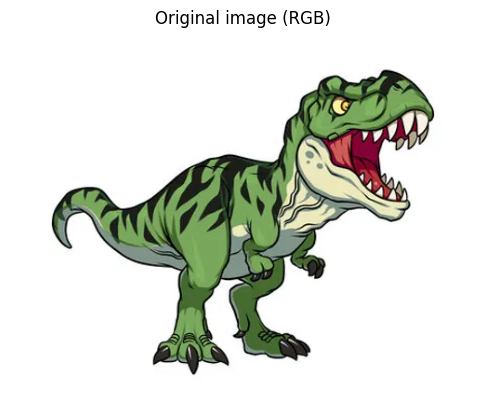

In [2]:

img_np_array = np.frombuffer(img_data, np.uint8)
img_bgr_from_base64 = cv2.imdecode(img_np_array, cv2.IMREAD_COLOR)

img_rgb = cv2.cvtColor(img_bgr_from_base64, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(6,6))
plt.imshow(img_rgb)
plt.title("Original image (RGB)")
plt.axis("off")
plt.show()


2. Converting into grayscale (using numpy)

In [3]:
# firstly we seperate the R, G, B matrices :-

R = img_rgb[:, :, 0]
G = img_rgb[:, :, 1]
B = img_rgb[:, :, 2]

# Defining the weights :-
R_wt = 0.299
G_wt = 0.587
B_wt = 0.114

img_gray = (R_wt * R) + (G_wt * G) + (B_wt * B)
img_gray_npmethod = np.astype(img_gray, np.uint8)


3. Using cv2cvt

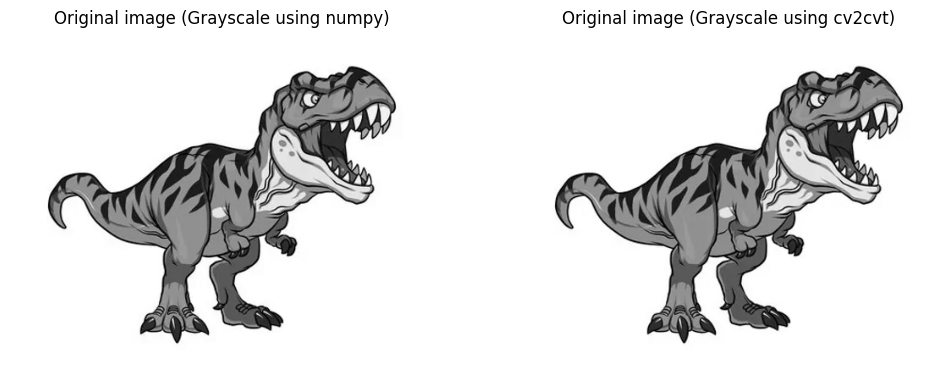

In [4]:
img_gray_cv2cvt = cv2.cvtColor(img_bgr_from_base64, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img_gray_npmethod, cmap='gray')
plt.title("Original image (Grayscale using numpy)")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img_gray_cv2cvt, cmap='gray')
plt.title("Original image (Grayscale using cv2cvt)")
plt.axis("off")
plt.show()

4. Printing the array shapes of both the RGB and grayscale images

In [5]:
shape_rgb = img_rgb.shape
shape_gray = img_gray_npmethod.shape
#shape_gray1 = img_gray_cv2cvt.shape

print("Shape of RGB image:", shape_rgb)
print("Shape of grayscale image:", shape_gray)
#print("Shape of grayscale image:", shape_gray1)

Shape of RGB image: (400, 500, 3)
Shape of grayscale image: (400, 500)


5. Print a few pixel values of both

In [6]:
centre_H = img_rgb.shape[0] // 2
centre_W = img_rgb.shape[1] // 2

print(img_rgb[centre_H:centre_H+2, centre_W:centre_W+2])
print("--------")
print(img_gray_npmethod[centre_H:centre_H+2, centre_W:centre_W+2])
print("--------")
print(img_gray_cv2cvt[centre_H:centre_H+2, centre_W:centre_W+2])


[[[120 167  90]
  [120 167  92]]

 [[120 167  90]
  [120 167  92]]]
--------
[[144 144]
 [144 144]]
--------
[[144 144]
 [144 144]]


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [59]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

B1. Computing FFT of the grayscale image

In [7]:
gray_img = np.astype(img_gray_npmethod, np.float32)
f = np.fft.fft2(gray_img)

fshift = np.fft.fftshift(f)

B2. Magnitude and Phase

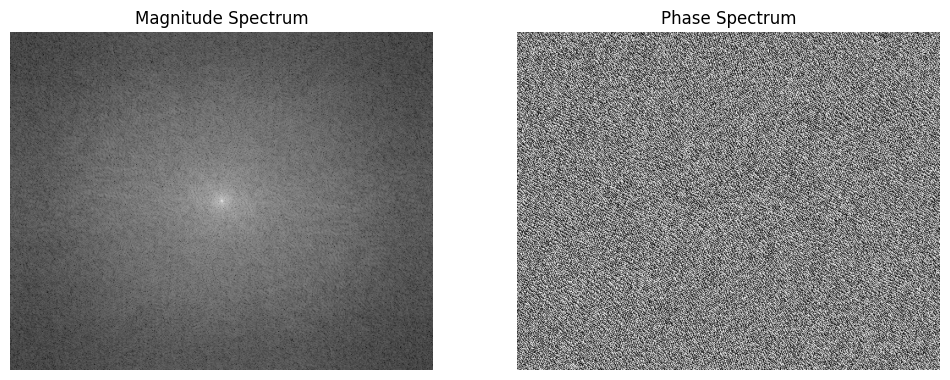

In [8]:
magnitude = 20*np.log(np.abs(fshift) + 1)

phase = np.angle(fshift)

# disply of the magnitude and phase spectrum :-

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(magnitude, cmap='gray')
plt.title("Magnitude Spectrum")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(phase, cmap='gray')
plt.title("Phase Spectrum")
plt.axis("off")
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [62]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

C1. LPF Mask

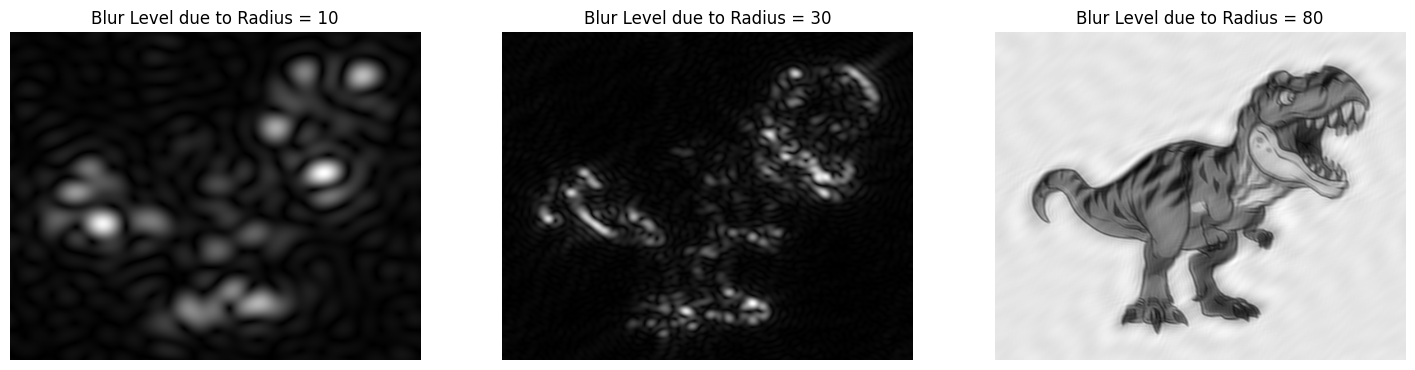

' From the results it can be shown that the blurness increases as the radius of the mask decreases, this is because the job of\n    a low pass filter is to block higher frequencies and let the lower freaquencies to pass so, as the lower frequencies are present\n    towards the centre of the frequency domain(due to he shift we did sfter performing FFT), if the radius of the circle is small\n    then it will allow more lesser high frequencies to pass and increase the blurness.'

In [9]:
rows, cols = img_gray_npmethod.shape
centre_row, centre_col = rows//2, cols//2

# We have different radii
R1 = 10
R2 = 30
R3 = 80

mask_lpf1 = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lpf1, (centre_row, centre_col), R1, 1, -1)
mask_lpf2 = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lpf2, (centre_row, centre_col), R2, 1, -1)
mask_lpf3 = np.zeros((rows, cols), np.uint8)
cv2.circle(mask_lpf3, (centre_row, centre_col), R3, 1, -1)

# Applying the masks
f_lpf1 = fshift * mask_lpf1
f_lpf2 = fshift * mask_lpf2
f_lpf3 = fshift * mask_lpf3

# Reconstructing
ishift_lpf1 = np.fft.ifftshift(f_lpf1)
img_back_lpf1 = np.fft.ifft2(ishift_lpf1)
img_back_lpf1 = np.abs(img_back_lpf1)

ishift_lpf2 = np.fft.ifftshift(f_lpf2)
img_back_lpf2 = np.fft.ifft2(ishift_lpf2)
img_back_lpf2 = np.abs(img_back_lpf2)

ishift_lpf3 = np.fft.ifftshift(f_lpf3)
img_back_lpf3 = np.fft.ifft2(ishift_lpf3)
img_back_lpf3 = np.abs(img_back_lpf3)

# Plotting the Results:-
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.imshow(img_back_lpf1, cmap='gray')
plt.title("Blur Level due to Radius = 10")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(img_back_lpf2, cmap='gray')
plt.title("Blur Level due to Radius = 30")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(img_back_lpf3, cmap='gray')
plt.title("Blur Level due to Radius = 80")
plt.axis("off")
plt.show()

''' From the results it can be shown that the blurness increases as the radius of the mask decreases, this is because the job of
    a low pass filter is to block higher frequencies and let the lower freaquencies to pass so, as the lower frequencies are present
    towards the centre of the frequency domain(due to he shift we did sfter performing FFT), if the radius of the circle is small
    then it will allow more lesser high frequencies to pass and increase the blurness.'''

C2. HPF Mask

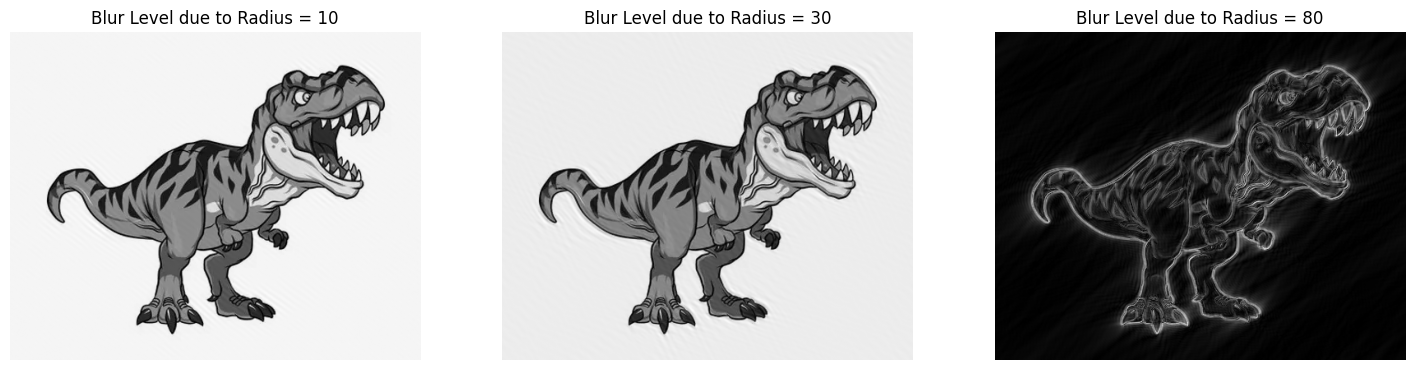

In [10]:
# Constructing HPF Masks

mask_hpf1 = 1 - mask_lpf1
mask_hpf2 = 1 - mask_lpf2
mask_hpf3 = 1 - mask_lpf3

#Appling the masks
f_hpf1 = fshift * mask_hpf1
f_hpf2 = fshift * mask_hpf2
f_hpf3 = fshift * mask_hpf3

# Reconstructing
ishift_hpf1 = np.fft.ifftshift(f_hpf1)
img_back_hpf1 = np.fft.ifft2(ishift_hpf1)
img_back_hpf1 = np.abs(img_back_hpf1)

ishift_hpf2 = np.fft.ifftshift(f_hpf2)
img_back_hpf2 = np.fft.ifft2(ishift_hpf2)
img_back_hpf2 = np.abs(img_back_hpf2)

ishift_hpf3 = np.fft.ifftshift(f_hpf3)
img_back_hpf3 = np.fft.ifft2(ishift_hpf3)
img_back_hpf3 = np.abs(img_back_hpf3)

# Plotting the Results:-
plt.figure(figsize=(18,6))
plt.subplot(1, 3, 1)
plt.imshow(img_back_hpf1, cmap='gray')
plt.title("Blur Level due to Radius = 10")
plt.axis("off")
plt.subplot(1, 3, 2)
plt.imshow(img_back_hpf2, cmap='gray')
plt.title("Blur Level due to Radius = 30")
plt.axis("off")
plt.subplot(1, 3, 3)
plt.imshow(img_back_hpf3, cmap='gray')
plt.title("Blur Level due to Radius = 80")
plt.axis("off")
plt.show()

C3. Square LPF

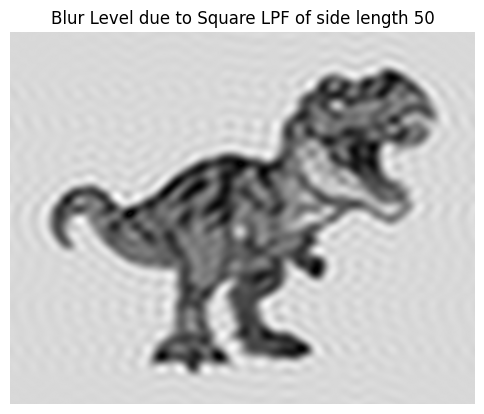

In [11]:
rows, cols = img_gray_npmethod.shape
centre_row, centre_col = rows//2, cols//2

# We have side length
L = 50
x1 = centre_col - L // 2
y1 = centre_row - L // 2
x2 = centre_col + L // 2
y2 = centre_row + L // 2

mask_lpf_sq = np.zeros((rows, cols), np.uint8)
cv2.rectangle(mask_lpf_sq, (x1, y1), (x2, y2), 1, -1)

# Applying the masks
f_lpf_sq = fshift * mask_lpf_sq

# Reconstructing
ishift_lpf_sq = np.fft.ifftshift(f_lpf_sq)
img_back_lpf_sq = np.fft.ifft2(ishift_lpf_sq)
img_back_lpf_sq = np.abs(img_back_lpf_sq)

# Plotting the Results:-
plt.figure(figsize=(6,6))
plt.imshow(img_back_lpf_sq, cmap='gray')
plt.title("Blur Level due to Square LPF of side length 50")
plt.axis("off")
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [66]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

D1. Phase-only reconstruction

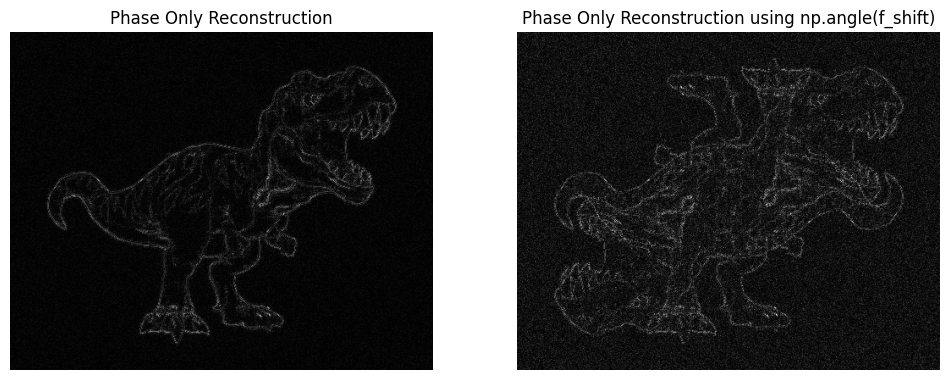

' The output is different in both cases as in phase only reconstruction we have complete complex number array as input with magnitude unity and phase as it is so, the output\n    has the whole framework of the image intacted, we can clearly see the outlines, edges and shapes(since phase preserves the edges and features of the image) and since the magnitude\n    is unity so all textures and colors of the image is normalised(all frequencies are now equally strong) This removes all the subtle shading and texture.\n\n    On the other hand in the case of np.angle(fshift) ,the input was just an array of real numbers(angles) not a correct input in IFFT, the output image is distorted and scrambled\n    due to the input being corrupted.'

In [12]:
phase_only = fshift / np.abs(fshift)

ishift_phase_only = np.fft.ifftshift(phase_only)
img_back_phase_only = np.fft.ifft2(ishift_phase_only)
img_back_phase_only = np.abs(img_back_phase_only)

phase_only2 = np.angle(fshift)
ishift_phase_only2 = np.fft.ifftshift(phase_only2)
img_back_phase_only2 = np.fft.ifft2(ishift_phase_only2)
img_back_phase_only2 = np.abs(img_back_phase_only2)

# Plotting the Results:-

plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img_back_phase_only, cmap='gray')
plt.title("Phase Only Reconstruction")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img_back_phase_only2, cmap='gray')
plt.title("Phase Only Reconstruction using np.angle(f_shift)")
plt.axis("off")
plt.show()

''' The main difference between the two is that fshift / np.abs(fshift) gives an array of complex numbers which have both phase and magnitude(magnitude is equal to unity)
    and using this for reconstructing the image is correct method as the IFFT operation requires a complete complex number(both phase and magnitude information).
    On the other hand np.angle(fshift) gives only the angle or direction of the complex number, It determines the spatial alignment of the sine waves, defining where edges and features are located.'''


''' The output is different in both cases as in phase only reconstruction we have complete complex number array as input with magnitude unity and phase as it is so, the output
    has the whole framework of the image intacted, we can clearly see the outlines, edges and shapes(since phase preserves the edges and features of the image) and since the magnitude
    is unity so all textures and colors of the image is normalised(all frequencies are now equally strong) This removes all the subtle shading and texture.

    On the other hand in the case of np.angle(fshift) ,the input was just an array of real numbers(angles) not a correct input in IFFT, the output image is distorted and scrambled
    due to the input being corrupted.'''



D2. Magnitude-only reconstruction

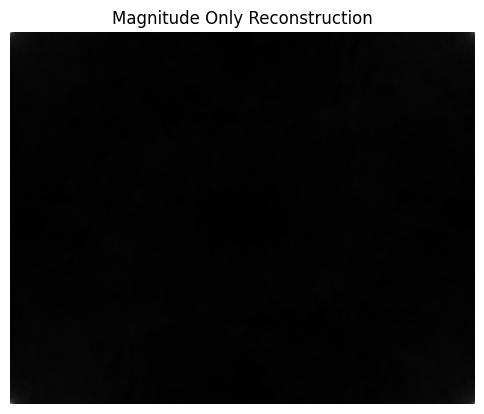

' The raw output of FFT has an extremely large dynamic range. The central component (average brightness) is often billions,\n    while high-frequency details (edges) are near zero. If plotted directly, the center would be a blinding white point, and the crucial details would be invisible.\n    The logarithm compresses this range, making the smaller high-frequency components visible and preventing the large central component from dominating the display.\n    Therefore, the visualized spectrum looks different (more detailed) because the logarithm makes the subtle structure visible.'

In [13]:
mag_only = np.abs(fshift)

ishift_mag_only = np.fft.ifftshift(mag_only)
img_back_mag_only = np.fft.ifft2(ishift_mag_only)
img_back_mag_only = np.abs(img_back_mag_only)

#Plotting the result

plt.figure(figsize=(6,6))
plt.imshow(img_back_mag_only, cmap='gray')
plt.title("Magnitude Only Reconstruction")
plt.axis("off")
plt.show()

''' The raw output of FFT has an extremely large dynamic range. The central component (average brightness) is often billions,
    while high-frequency details (edges) are near zero. If plotted directly, the center would be a blinding white point, and the crucial details would be invisible.
    The logarithm compresses this range, making the smaller high-frequency components visible and preventing the large central component from dominating the display.
    Therefore, the visualized spectrum looks different (more detailed) because the logarithm makes the subtle structure visible.'''


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

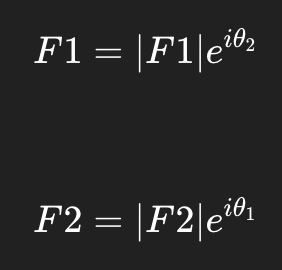

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [69]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

 Loading another image

In [14]:
import base64
with open("thumb_2.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())

/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAKoAqgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACi

(np.float64(-0.5), np.float64(679.5), np.float64(679.5), np.float64(-0.5))

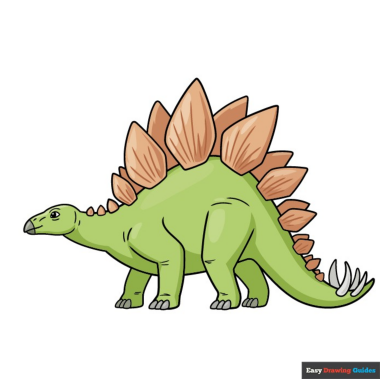

In [15]:
from PIL import Image
import io
import base64
import cv2
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image_2 =  """/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAMCAgMCAgMDAwMEAwMEBQgFBQQEBQoHBwYIDAoMDAsKCwsNDhIQDQ4RDgsLEBYQERMUFRUVDA8XGBYUGBIUFRT/2wBDAQMEBAUEBQkFBQkUDQsNFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBT/wAARCAKoAqgDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD9U6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiuJ+Knxr8CfBDR7fVPHfinTvDFlcyeVA99LtaZxjIRBlnxkE4BwDzit7wh4x0Px/4csdf8N6vZ67ol8nmW1/YTLLDKMkHDKcZBBBHUEEHBFAGxRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFebftB/H3wt+zZ8MdS8beLLkx2dt+6trSIjz764IJSCIHqzYJ9AAzHgGu08U+KNJ8EeG9T8Qa7fw6Zo2mW73d5eTnCQxICzMfoB0HJ7V+Pusa/r3/AAUz/aKl8RarBc6b8GPCkzQWFjIShlUkHYSD/rpcK0hB+RNqg52lsa1WNGDqTeiNaVKVaapwWrGeA/h34q/b7+I9/wDF74xG5i8IsXg0PQYZWjjMOWAjiIIZYk7uMGR8nPBroP2XfijrH/BPn9peT4XeK9Qe5+FHi+dZLG/uDhLSVzsjuPRecRSjjgK/RRn7AsLC20qxt7Kyt4rSzt41iht4ECJGijCqqjgAAAACvDv2zfgenxr+Dl+lpb+Z4j0UNqGmMo+Z2UfvIR/10UYA/vBD2r5ahmk5Ym9T4Xpbt/XU+orZXBYflp/Etb9/66H6V0V8nf8ABNH9o5/2gv2bdNi1S6+0eKvCrLo2pM75kmVVBt5z3+ePALHq8chr6xr68+SCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiivlb/god+1pH+y98GJU0i4A8e+JFksdEjXBaDgCW6I9Iwwx1y7IMEZwAfLH/BQv48a3+038YrH9mv4a3YbSrO6D+JtRiO6JpoyC0bkf8s4OrDPzS4XGUGfc/hh8NtE+EfgjTPC3h+38nT7GPbvbHmTOeXlcjqzHJJ/AYAAryj9g/wDZmk+Fngp9d8Qws3i/X1W51B5xmW3iPzJbknncc7n/ANo4P3Qa+k9c09bG5UxjEbjIHoe4/lXxeZYl4iVofBH8X3/yPssuw6w8bz+N/gu3+Zm0hdQwXI3EEgZ5I7/zFLWJ4mu20z7DfLnbFNskA7ow5/kK8M91K7sfLv7N+uf8Mf8A/BRW78JvJ9l8E/EhBHboTtjjkldmtsDplJxJAv8Asy571+uFfkv/AMFEfh5ca18MdI8faMzxaz4SvEnW4tyRIsEjKCykc5WQRMD2G41+jf7NHxht/j58CPBfjyEp5ur6ej3ccfSK6TMdwg9llSQD1AB7199l9f29CMnutH8j4HH0PYV3FbPVHptFFFekecFFFFABRRRQAUUVHcXEVpbyzzypDBEpeSWRgqooGSSTwAB3oAkorlvB/wAVvBPxCvL208K+MNA8S3Vl/wAfUGj6nBdvb84/eLGxK8+uK6mgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKhvb2306znu7qaO2tYI2llmlYKkaKMszE8AAAkmvyV8S+JfF3/BR/4s+J71/E+reGPgZoFy1hpllpcpifUZFOVlYEFS5+SQlw2wMiqMlmGNatChBzm9EbUqU681CC1Z+uFFflj8Efjz4w/YS+NemfDz4leKLvxR8HPErFdI1zUpTJNpMm7HzFiSqBmAkX7uGEi4IdD+pcUqTRpJG6yRuAyupyGB6EGnTqRqwU4O6ZNSnKlNwmrND6KKK1MzN8S+I9N8HeHdT13WbyPT9I0y2kvLu7mOEhijUs7k+gAJr8gPh3Lqf7ef7Vmt/GPxNaSf8ACC+H5xa6Hptx8yfIcwQ7eh27vOkxwXdRyCQPav8Agqt8eNT8V6x4b/Zv8DSmfXPEM8E+uCIn5IywaCBj2BI85/RUQnhjXqnwF+E+lfCXwbonhTSEzaabDulnKgNcSnl5W92Y59hgDgCvGzLE+ygqUPil+R7GW4ZVZurP4Y/iz1PTLMWNokf8R5Y+9Z/ihQbaFu4fH5j/AOtW1XCeL9WZfGml6fk+W9jPLjtu3xgfpmvl6lowsfS0k51LjayvFNt9q0C8XHKpvH/ATn+latMliWaJ42GVdSpHsa4D0k7O5xcOk2XxF+HureGtVTzLO8tZLCcDr5boVyM9CAeD2IBrzv8A4I//ABAvfCmo/E/4F68+zU9Avn1S0iPcBxb3IX/ZDLAw7HzCfr3Hg+6bS/ED2khwshMTZ/vDp/UfjXzr491c/sx/8FEPhx8R4pGt9D8VulnqmDtTDBbWcnsQqvBNj+8ufevoMmrctR0n1/Nf8A8PPKF4Kqun5P8A4J+wFFFFfYHxgUUVR1rW9O8N6Td6pq1/baZplpGZbi8vJVihhQdWZ2ICgepoAvVznjz4jeFvhd4fm1zxd4g07w5pMWd13qVwsKE4ztXJ+ZjjhRknsK+HPjJ/wU8uvFmvXPgf9m7wrP4+8Q8xy+I7mFl0617b1Vtu4Zzh5CiZAxvBryfRf2Pte+LHiRPGX7Q3jO+8f+IOfL0qG4aOxtlOTsBULhc4O2IRqCD94GuLEYyjhl7717dTtw+DrYl+4tO/Q9S+Iv8AwVTuvGmsXHhj9nb4e6h4+1ZTsOu6pA8NhFzgP5YKsUP96VocHsa8p1T9nL4yftHzLffHv4rX8mnsd6+F/DzrHbR9CMgKIgynIz5bk4+/X014d8M6L4J0aPTdE0yy0TS4ASttZwrDEvcnCgDJ6k1R1TxxZWWUt83co/uHCD8f8K+ZxGb1amlP3V+J9Nhsnpx1n7z/AAPmDwl8L9A/Zl/by+A9v8PxNpUGuCey1K2e7kmNwjBkZn3MfvbgQMBd0QIGRX661+Tnh3ULr4hf8FPvg3Z3KL9n0zTbi7wIshCsF5ID19UjAJ6E1+sdfSYGUpYeEpu7Z83j4xhiZxirJBRRRXecAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB8Yf8FTvjbe/Dz4BW/gbw+Wk8WfEO6/sS1giP702x2/aCo77t8cP/bf2rD+CfwxtPg38LfD/AIStSjnT7YC5nQECa4b5ppOecM5YgHoMDtXkfxJ1dv2j/wDgpTqkhZrrwr8KrEWcI2ZiN8OGB54cTSSEHv8AZVr3/wAT3/8AZ+iXMinDsPLX6nj+WT+FfJZxX5pqiumr/r+tz63JsPaLqvd6L0/4f8jxD48+BNK+OGhanouqACF/+PO5C5e2kUEJKv5nI4yGI710n/BNv9qzVdL1aX9nX4oXBh8VaIpj8O387cX1qi5FvuP3mVBujP8AFGCOCg3V68a/aN+Dd1490uz8S+GZpdP8d+HmF3pl3auY5ZCh3iMMCMNuAZG7N6Ak1y5bjfq8/Zzfuv8ABnp5rl31in7Skvej+K/zP2Arhvjf8XNG+BPwp8S+O9ecLp+jWjT+Vuw08p+WKFf9p5GRB7t6V43+wd+1/bftUfDEpqxjsfiHoG2117TsCNnYcC5ROyOQcjHysGXptz8qf8FQfibqHx1+Nvgf9m3wndHbHcx3+uyxnISZkLIrjIyIYC8xXv5id1r7WUlGLk9kfAxi5NRW7OK/Ye8F6x8TvF/i34/+NcXfiDxHeTrYMycIGb99JGDnC9IUA+6qMOhr7v8ADto1sLkyDD7thHpgZ/rWB8NPBWneEPD2maVptv8AZ9L0q3jtLSLrhUUKCT3OBye5JNaHgzVze3/iSyfiWx1Fl2nrsdVdT+Zb8q+Eq1XiK3tZddvQ+4p0lQo+yj039Tp68n+IFwYvi34Xj7SWU6/oT/7LXrFeL/FOXb8W/CLAk4R4yPTOf/iqyrfCdGEV6nyf5HV0UUVwnWeZ+KYm07xLNJH8pLLMp9+v8815F/wUI8Dp46/Z3XxBbxhrrQLmG/Vh97yZP3Ui/T50Y/8AXOvcviJbYms7gD7ytGT9DkfzNR22jW3j34ca34Zvebe9tZ7CXjOI5UK5/wDHj+VbYer7GrGp2ZWKpe3w7j3Vj6N/ZB+LB+N37NPw+8XzTfaL+80uOG/kzktdw5hnJ9MyRu2PQivYa/OL/gjF48nTwF8R/hlqTFNQ8N6yL1IXblUmUxyIo9FktyT7y+9dv+11/wAFArrw54mf4S/Au0Txj8UbkmC5voAJbTSD/Fkn5HkUHnJ2R/xkkFK/SHJJczeh+ZKLb5UtT2f9qr9tb4e/soaKDr90dW8U3MZew8M6e4N1P2DOeRFHn+NuuDtDEEV8J6n4M+M37dOtweIPjNqNz4I+Hccvm2HgfTiYXcD7rSKeQeeXky/3gqoCDXXfAz9k+08CaxP4++ImqN44+Jl4/wBqudY1CRpo7WTHJjL8sw4HmMMgABQgyD6l4g8cPIWg04lE6GfHJ/3fT618tjM2b9zD/f8A5f5n1WByfmtOv93+f+Re8CeC/CXww0qLw34W02z0a0iXzDbWw+ZsAAvIxyztjHzMSTjrUuseN7Wx3R2oF3MOMg/IPx7/AIfnXn3mvljvbLfeOev1ptfNSk5O73PrYYeMdOhf1TXL3V3zcTEpnIjXhB+H+NUKKKg6UktEef8A7Idj/wAJR/wU/wBbnUB18PeGZJc7QcZit4zzn1ucfmMd6/VuvzF/4Jj2J8Rfte/tBeJjlxp8UelbwDgbrggDOP8Apz/TvX6S+KPFmieCdEudY8Q6vY6HpNsu6a+1G4SCGMdeXYgDpX6Vho8tCEfJfkflGLlz4ipLu3+Zq0V8E/G3/gr58M/Bd1Jo/wAOdJv/AIm68zeVFJbhrWx3ngASMpkkOccJHhuzd6+e/EHiv9sP9rzcmr6qvwk8G3Gc2VpvsHaM4+UqpNw5x1EjKh56dKurWp0VepKxlTo1KztTjc/RD42ftlfB79n5JovGHjawg1WNSf7GsWN3fMRnCmGPJTJBAL7Vz3FfFvjP/grl4t+JGoz6J8BvhPe6tdchdS1uNp2RTxuNvAdqf7zykdMjtWP8Mf8Agnp8NPBJS78QC68b6qDuaXUm8u23c5IhQ85z0dnr6U0bRNO8O6dFp+lWFrplhCMR2tnCsMSD2VQAPwrwq2cwjpSjf10/r8D3KOTzlrVlb01/r8T5C1H4Zftb/tAyNdfEP4sz+DrCY/NpWm3RjCL6GC1KRMMf3nJ9ay/2VdF8W/s6/wDBQTwL8PdM8d6t4i0vWrWZtVilDJDcKILliGiLuPkMCuGzkc84zn7auZ1treWZvuxoXP0AzXyP+zck3i7/AIKsWUzxM3/CP6PPLvLMwAexI3YHCjN3jB4yc9SKnL8bXxWIcZvS17f1qaY/A0MNhueC1ulf7/l0P1vooor6U+ZCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiimSypDG8kjrHGgLM7HAUDqSaAH0V8wXX/BS39nK08Yt4ck+ItublZ/s7XqWVw9kHzj/AI+BHsK5/jB2992Oa+l9O1G01ewtr6wuob2yuY1mgubeQSRyowyrKwyGBBBBHBoAsVieOPFln4C8F6/4m1A4sNF0+41K4Ocfu4Y2kfntwprbr5U/4KfeO28C/sYeOfKl8q71n7No8JzjImmXzR+MKy0AfJv/AAT30W9v/h14p+IOsYl1zxnrlxezXXeZEYjJ/wC2z3H517z8RLkrBZ24PDM0jD6cD+ZrL/Z38KL4E+BPgbRzCLaS30iCS4j/ALs0iCSX/wAfd6XxveLe3djKmdj2yyDPuT/hX5xi6nta0592fpWApezpwj2RzdFFFcZ7J88/FG18R/s0fFKx+Pnw3Kw3lrIE17SyD5N5C5Acuo/hfCh8chgsg+YE10v7BXg/VPHOt+Nfjn4r/wBK17xRfTpaStk4VpS1w6g5wpcLGv8AdETDoa479sDXtQ8Rf8Ir8LNAPmaz4ovI/NjBxiIOAgb0UyfNnsIjX3V8LPAlj4E8N+HvDGnptsNJtI7eMldpcIuC592IJJ7kmvoJYir9ShSk9ZP/AMlX/B/A+Slh6X1+dWC0itf8T/4H4notlbi0s4ouhUc49e9eeeHbv+y/jh4osGO2PUrOC7QH+8iqp/8AQmP4V6XXj/xEdtA+MvhLVVyqXUDWrY/iIJ/rIv5CuGfupPsdVBc7lF9U/wDM9grwn4qTeZ468IXQ/iv2TI6kFowPwr2y/uhBp8syn+D5T7np/OvC/i3+5/4Ry5/55agnt79e33ayrvZG+CXv3PQaKKK5TY5zx5B5uhh8cxSq2frkf1rB8AXnk6rJbk/LOnA/2l5H6ZrY+J1w1r4I1CZeqNC3/kZK4zQ7wWuqWdwrfKJFJI/ung/oaXU7Ka5qbR8eePLL4l/Db9tTxv4V+FWqnQNU+IdqYjdhhGRbThbi5kDkEoVeGb50+cANt+YivsX4Efs/eE/2b/CDW+nhbrVJUDalrlygE90/XHfagP3YweO+5iWPh37bB/4Vp8bvgx8U0YwQWd9/ZuozqORAJA+38Y5LoV754j8Rya7cYUlLRD+7T19z717OLxFSeHpK/utfitNfwPAwOEprEVXbVP8AB66fiP8AEXiebWpTGhMVop+WMfxe5/wrDoorxT6dJRVkFFFVtT1Sz0WwnvtQu4LGygXfLc3MgjjjX1ZjgAfWhK+iG2lqyzWV4m8V6N4M0qTUtc1O20qxj6zXUgQE+gz1PoBkmvAvEv7Umr+OPEB8KfBnw5P4t1psq2oSREW8Q6FgCV4/23KqD/eFdZ4B/YL1DxjqcHiX42+KbrxLqZG4aNaTFYIs87GkGOPVYggB6Ma9FYRU1zYmXL5fafy6fM8ieYc7ccNHmffaK+fX5Hi37J37VXxP+GMnxE0n4R+C4/EXizxhqMV3Nq8sLXC2cSmXZ+7AVV+aZzvlfaP7vWvYbX9jj4nfH7WbbxL+0D8SNR1OcfOmj2s4laAHqitjyYOeqxIQfUV9h+B/AGjeENMi0bwvotlo2nx8iCyhWJAe7Ngck9yck+9eg6dosNiAxAkmHJdu30FenUzKtW92iuVfieBDLqNH3qz5n+H9f1Y8h+F/7Nngv4Qacz+FvDFlpMqoS95Kpku5BjnMr5fB54yBycAV2FbviHVA7G1hbKg/O3r7VhV4dZ3lq7vue3RVoaKy7BRRRWJsYfjO7+y6DMAcNKRGPx5P6A18/f8ABNWwk8Xft0fG7xVNHuXSbCXSlZiDtY3MUaEcd0tG/Akc9a9d+KOtQ2ESmd9lvaQvczNngKBnP4BT+dcp/wAEWvDtzc/D34p+O73L3Wv69FaPKw++0ERlYj23Xh/L24+kyWF5zn2SX9fceDncuWlTh3bf3afqfo9RRRX1h8gFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfEH/AAVY+Oeo+A/gzpXw58MTSjxb8Qrv+zI47ZsSi0BUTAYOQZGeOL3V5PSvt+vyp8b6uv7SP/BTTX78lbvw38MbMadb5bKfaYyVbj+8LiWcg/8ATBfQCsK9VUaUqj6I3oUnWqxprqdN4S/Ys+GmmfCSy8Iax4bsNSvjbj7ZrIiC3jXBHzyJNjeoDfdXOAAAQec8J8IPjV44/wCCbfjiHwp4xa88WfAjV7vbZakAZJtJZuSVA6Hu0XR9pdMNuU/ZX2IJozTN99mDfhnA/nXKeMfBui/EDw3faB4g0+LVNIvU8ue2mBww6ggjlSDghgQQQCCDXxmHx9XD1Oabunuv8j7DEYGjiKfLBWa0T/zPrjwv4o0jxt4e0/XdA1K21fRtQiE9rfWcgkimQ9GVh1/oeK+Cf+CwN63iHwz8GfhykjIfFHisPhCoJ8tVh6n0N4PbpntXivw2+JPjH/gmX8SV07UWvfFXwB8QXeQR882mSt1ZR0WUAcrwsqrkYYfL3H7ZvjTQ/jb+2f8Asz22hana61oA01/Ednd20m5JFMkkisMdObEDB5BUggYIr6914SoOtB3Vmz5JUJxrqjNa3SPdPEtyLHQLtlwPk8tR9eP615lcXT3KQK//ACxj8tT7bif613XxAm2aRDGOrzD8gD/9avP6/OGfqNFe7cKKK89/aA8ZnwF8HvFGrRyGK6Fobe3YHkSykRqR7gtu/CrpwdSagt3oXUqKlCVSWyVzz/8AZS04/HT9q/xh8R5d02j+HE/s/SiR8u9w0SEf8AEzkesoPHAr9BNW1tdA8ReH7SRVFnfCW0EhwNkoCtGP+BAOPrtr5s/YA+HS+A/gF4XeSMpe67KdZuM9xJgRY9vJSI/ifWvfPjTpM2o+BLm5tSVvdMkTUIGXqpjPJH0Usfwr1cRNOpLk2jZL0R83h43UPabzu36y/wAjuq8j/aKjNto+harGMzWF8rgjsCM/zVa9F8I+II/FXhnTtWiwBdQh2UdFfoy/gwI/CuT+Ndj/AGr4RvrYDc6QNMo75UhuP++TWFV3ptm+HThXSfQ05NXF3pFtCh3LjcW9R/DXmnxrjLeEIZF6w3kcn6MP61u/D/Uf7U8GaTPnLCARMT1ynyn/ANBqj8WYPO8Bake6GNx/38X+hNcMm5bno04qFRLzOtikEsaOv3WAYZ96dWb4an+1eHNKm/56WsT/AJoDWlSM2rOxzPxKiM3gbV1BxiIN+TA/0rzPSpPN0y1bOSYlz9cV6t44CnwdrW44H2ST89pxXkXh1i2jWpP90j9TUs7aHwMwf27PC48a/ss6jfBfNudJktdUj45yGEch/BJZD+FV/gj4jPiz4ReEdUZi0s2nQpKxOcyIuxz/AN9Ka9Z8TaH/AMJp8DfE2h7fMe90m8s1H+00bhcfQkflXyz+w3rjap8ERZs+7+zdSntlUn7qsFl/LMrfrXo/Hg3/AHZfg1/wDy6f7vHW/mi/vT/yZ9CUUV89/GD4/azfeKF+HPwqsX1/xpcs0E9xAu9LEg4Yc/LuXqzMdiY5zzjlo0J15csP+AvU9PEYinhoc9T5Lq/JHZfGb9ojwx8GrUw3kh1PXnXMGkWrjzTn7pc/wKfU5PoDXCeDf2bfiX+1LfweIfitf3PhDwfuElp4ctQY55V7HY2fL/35AX64UAg17B+zr+xjo/wuvF8V+MLhfGHj6ZvOe+usyQ2shOSYg3LPn/lo3PHAXnP1To+nC4bzpVzGp4U/xH/Cu9VaeH9zDay/mf6Lp67nh1PaYlc2J0j0iv1fX02OH8AfDDw18KNAi0fwvolvomn4DFYU+aUgY3u5yzt/tMSa6q0tXvLhIk6t39B61L4j1GGPUYIXkAdz5Ua92bBYgfgCfwrf8P2K29qJWHzy8k46L2riUXUqau50OSp000rdi7Y2cVjCEjA46k9WPvWdrmsfZlNvC+ZehYHOwe3vUmtax9iTyoyGuGHU87BXlPjTxXcWlzBoukAT67e/dJ5EC95G/DJ/DPsdqtRRXJEyoUXUlzSOniuYp5JY45Fd4mCyBedpxnB98EHHuKlqjomkx6JpkNpGzSFBl5XOWkc8s7HuScmr1cR2u19AoorP8QX/APZuj3M4OHC7U/3jwP50Ald2Pmr9rrxeNJ+EXjvUFAbz7U6fGPUTMsGR/wABct+FfW//AATR8An4f/sY/D+KWMpd6tDNrMxIA3faJWeI/wDfnyvy/Cvzu/bTkvPE8Hw/+H+mKW1HxJrSLEFPBYFYkUjuC9wD/wAAr9nfCfhuz8G+FtG0DT02WGlWUNjbrjGI4kCKPyUV9pk9Plw/M+r/AOAfJZ3U5sTyL7KS/U1aKKK9w+eCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOV+Kvj21+Fvwy8V+MbwB7bQdLudSeMnHmeVEzhB7sQAPc1+ZX/BOTwndy/DPXfGmpEy6v4w1mW4kumHM0cbFdx/7atcH8a+kP+CtvxFPgf9j7VNMicJc+KNTtNIXB+YIGNxIQPQrblT/v+4qD9njwMPh/8MfCPh8xGKTS9KhjmX/puUBlP4uzmvCzepalGn/M/wAF/SPcymF6kqr+yvxf9M9NvIh/Z8sajAEZwB7DiuVrsZF3xsvqCK46vk6vQ+ooPRnOeMNB0jxbpF54c8S2MOo6LqiGF4p1+Rv9knswPKsMEEcYIBr4JPwlX9ib9pbwr4t197/VfhqHntdP1dAZG07zo5F8uZR/d812+UfMCzKCwKj9Er6yi1C0kt5hmNxg+o9CK47VdL07xXpd/wCDPF9lFqen3kZiKzjKToenPUMMAhhyCOCCAa2w+JlQvB6xlo1/l5hiMLHEJTjpOOq/rsN8a6pbatpmj3ljcxXljdIZ4biBw8cqEKVZWHBBByCPWuRr5zml8Q/sX+L7Dwn4jvJtY+EmpTuNF1aQAvprs25o5MD1OSOh5dcHetfRFvcRXdvFPBKk0Eqh45I2DK6kZBBHBBHesa9F0mmneL2f9de6O/B11VhytWkt12/4HZklfM37dN/NdeDvCnhm1Yfa9Y1ddiH+MIpXGfTdKn6V9M180/tBKNa/aY+BOkPgxJq0U7KW6hrqHcOORkRYz/hW+Xr/AGiMu139yZlmjthZLvZfe0ff/gnRoNDh0jS7VdtrYwJbxDGMIibV6ewFdzcQx3MEkMqh4pFKOrdCCMEGuYOsWfhfRIdSvExbtcLFNcAD9yGO0M3+zkgH/ezXVAhgCCCDyCKdJaannVt7rbY8f+EOqjwdrHiPwbfOw+w3DT2rMMlomx/Qof8AgRrqdUnGpzTNIuY3G3af7vTFcf8AGe0/4RXxfoPi+EFYWb7Fehe6nODjudu7/vla6lHWRQykMpGQQcgiuWba9x9D0LKVqy6/n1PP/hA72VprOjStmTT7xl567Tx/NSfxrpfHNsbrwdrMYGT9lkYD/dGf6VzFq39gfGG5gPyw6vaiRR23gf8A2D/99V3eo232zT7m3wD5sTR4PuCKyN5v31LvqYXw3uPtXgfSH9Idn/fLFf6VpaDrkeuw3jxgA213Latg5BKNgH8Rg/jXM/Bq58/wTFHknyJ5I8Htzu/9mqt8LbjGr+LbMMSsd+0i575Zxn/x0UhyjrPyN34jz+T4O1Fe8qFP6/0ryjwyc6Jbf8C/9CNeg/Fi6K6QIAesckhH0XA/ma8/8NDGiW30b/0I0mdNFWpnqvw/YnRZQe07Af8AfK18OfsOxnS4PiHou0othq6qFDllBw6YGf8ArmOe/FfcfgMCHQZJHYKpmZiScAAAD+lfD37EMv8Aa8fxF15eIdR1gMi44H336/SUV6VH/da3/bv5nj1f9+o2/vfkd1+1Z8Vrn4W/DCU6ZKYdc1aT7DZyLndECMySD3C8A9mZT2r1z9lL9nPT/gN4Dt3uIEn8Y6nEs2rX7Dc4c/N5CnsiE44+8QWPYD5w/aFgHiz9pP4I+GJF863/ALRjuZ4OoaNriPfkY/uwt+vTv+hFha/bLpI+dvViPSqnenhqdOP27t/fZGcmquLqTltCyXlpd/MighM8yRr1Y4rqWKWNoSBhY14HrWbpdsDqV1JtAWNmVRjoSe34fzrM+KHiIeGfBt9dhgJduyL/AHzwv64Nc0Fyxchy/eTjBHA6PqL+LPiJqN5uL2Okxm3iOeGmY/Ow/Jh9MV65eeIIbaAR2h8x8bc4ICj+teXfDDQzonhC0DjE91/pMpPXLYx/46Frq3dY1LMQqgZJJwAKxjNwvbqdVaEZyS6IyPGXiqLwxo8+o3LeZKfliRjzI56D+p9hWF8OvDVxbRza9qxMmsaiN7bxgxIeQvtnjjtgDtWNpiN8TfGLalKCdA0t9luh6TSdc4/In22j1r06s9zeX7uPKt+v+QUUUUzAK4z4h3+FtrNT1zK4/Qf1rs+leMfEDxZa6Zb63r96zLp+n28tzIVGSIokLHA7nCnj1NFm9EbUkr8z2R4z8CfDg+O3/BTLQ02JcaP4Asvt0zISyl4V3IT2DLc3EYP/AFzr9gK/OP8A4I3/AA8urrwl8Rvi5rMO7VfFWrG0hnYY3RxkyzOo/uvLNg+8Ptz+jlfpNCl7GlGn2R+aYiq69WVV9XcKKKK3OcKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/Nb/gqNef8LA/aL/Z3+GKlpIZL19UvoFH3onnjQH8EguPzNfTGj2UlnHL5q7WYjvngf/rr5N+MVw3jz/grhBC/72Pwd4fhj2k5ChrYyDg9PmvgeO/PXNfYdfLZpLmrRXZfmfTZanGg33f5BXHzLtlcejEV02malBq9lHdW5JjfIwwwVYEhlI7EEEH3Fc3df8fMv++f514FXVJnu0U02mRVj+JtDXWbE7Bi6i+aJu+fT8a2KzNe1pNBt7e4lXML3EcMjf3Axxu/AkVznZG99Dh9W0fRfix4T1DwX4vtFu7W8jMR3jDAjoyk/dkU8hvUfn8o+GNW139k/wCIcPwz8cXL3fgu/dj4c8RzAKiLn/Vuc8AFgCM/ISD9xgR9ieONFMMi6nbgryBLt4wezf59q5rxx4H8P/tB/D+98H+J4x5si7re7UDzYJQPlmjPZh3HcEg8EiuuhWUU6VXWD/DzXn+ZnXot2xFDSS/Hyfl+W5Rr5j/aRkh8IftCfBbxhdEJYxalFDcynOI0juI2JPOPuyOR/umtn4P+ONf+FPjiX4N/Eh9uqWg/4keryE+XqEGSEUMepIHy/wC6UOGUA9Z+038LH+K3wqv7Gzi83WLFhf2Cj7zyIDmMf76FlA6ZKk9K3ox+qYlKb919e6elyMRJY7BydNe8tbdU072PtiDTLfxJ4YvtJuhmCdWib1AYcEe4PI+lcv8ABzxLdRi/8H6w2NX0VvLRmPMsAOFI9QOOfRlryr9hn9oCL4x/DCxF7PnxHpKppuqxO2XZ1GI5z3xIozn+8HHavS/jDod1oV9YeOtGTN/phC3cY6SwdOfpkg+xz/DUThKk7S3jozGlKNZcq2lqvX+tGdN8UtFTxH4Xn0x8BpgTGSejjlT+eK8/+FevNqvhpbS4JF9pzfZpUb7wA+6T+Ax9VNdlD4mh8W2VrqVvxbyxgouclfUH3B4P0rzfUyPAnxKhv+E0vWh5c3YJLkfN+eDn/aauOpJSldHbRg1TdN77k/xWB0q58P6+ikmxuwsm3qUPOD/3yR/wKvQUdZEV1IZWGQR0IrD8c6R/bnhPUrRV3SNEXjHfcvzD9Rj8arfDbV/7Z8G6dKxzJEnkP9U4H5jB/GoNHrBPsYnwmP2SbxLpvT7LqDHb6Zyv/slYfw5vDa/EbWLckAXSlsD1zuz+p/OtzwqBYfFPxTZjgTxpcj3+6T+slcHYXZ0rx3BcL1aMNj1wen/jtI6VHmcvNI6n4q3m+a8QdIrcR/nz/wCzVzmhJs0i1HH3AePfmpPH2oC9g1C4GcTSDbnrjcMfoKs6NaPNFY2yj52VIwPfAFI1iuWCH/HPxsvws/Zm8T6yX8q6OnSQWxHXz5z5cRH0Mgb6Ka8W/ZB8HP4Q+BujtMuy41Z31N1x2kwIz75jSM/jUH/BQfXJ/FOp/Dn4Q6RNtutWvFvLlQ3CRgmKEtjnbzMx7fuweSOPZ9N0+30nTrWxtYxFa20SwxRjoqKAFH4ACvSn+6wkY9Zu/wAlov1PGw69tjJ1OkFb5vV/hY+etZi/tz/goP8ADKzOCtrpxk2s5xlI7uXPHQ8D64GeK/QzR/LtLW5vJiEjRSS57KBkn/PpX58+DEbUv+CjNqRGoGn6Q5LMckg2hGR75lA/Ovu/4k3n9g/DDWHB2MbXyffMhCH/ANCNa4hWVLygv1OOk+edWPebX5In+GOuTeJvCq6rMCrXdzPIqkY2r5jBR+AAH4VxXxqnPiDxP4a8LRklJX+1XKg4+QZH8lf9K7r4Zab/AGV4A0G3wAfsqSkDsX+c/q1ec+H5v+Eo+KHifXCQ9vasLG3PUYHBI/74z/wOuKbtBI7qSXtpzWyv/kjuVUKoVQAAMADtXB/E7W7iYWvhnTDnUdTO18HGyLvn64P4A12mpahDpVhcXlw2yCBDI59gK4b4Z6dPrF7f+LNQXFzeuUtlP8EQ44/IAey+9c50wVrzfT8zsdA0W38N6Pb2FvxFAuCx6sepY/U5NXLW6hvbdJ4JBLC4yrr0Yeo9q4LxHqs3jbxEPDGmyFbCE7tSuoz2B/1YP6fX2Bz38EKW0McUShIo1CKq9AAMAUEyVtXux9FFZ1lr9lqV/NaWk32mSAfvXiGUjPZS3TPXgehoIs2Q+KtT/szRpmBxLL+7T6nv+AzXxZ+2x4zfQvhNHoFoS+peI7tLSOGMnzWiQh5CoHX5hEhHcS19R+NdW/tDVDAhzDbZQe7fxH+n4V83fC/wv/w01/wUS8L6EV+1+F/ACf2neqG3RmSAq5JHqbhreJh3EZ69K9PLaPtsTG+0df8AL8TkzKr9Wwcu8tPv/wCAfp7+zL8JY/gX8AvA3gZURJ9J0yNLsp0a6f8AeXDD6yvIfxr06iivvT88CiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD8qfhbOPEf/AAUn/aB1pj+8tHOmjIwcLLDH64/5dx/9avtavh39mDzn/bD/AGqLltzrH4ruULk5x/p95tH5Kfyr7h618bj5XxU12t+R9bg42wsH3v8AmeZ2GuP4J+JOr6JcKTY6v/xMbI54EpH7xfxKsfwHrW2xLMSeSeTWL8ddCmu9AtNZssrqGkzeejL12dW/LaG/4CfWpvDeuw+JNEtNQhwBMmWUH7jfxL+BrxZ3TsfQRSlBVFvs/kadc98QdNOreDdVt1Xc/k+Yo90Ib/2Wp/GGq3GhaFLqNunmG2dJJIv78e4Bx7cEn8K0rO7g1SxhuYWEtvPGHU9ipFZlq8bSMfwjqSeKfB9lPN+8M0PlzA92Hyt+ozXCX9rNoeqyRBiskL5Rx1x1BrY+GDNomr+IPDcjf8es/nwA9SjcZ/LYf+BVpfEHTQ0UF8g5U+W+PTsf5/nSOiL5JuPRnnPx2+DGm/tN/Dg2u9NP8XaWTNpmoAkGGb0JHPlvgA+hAPJUZ8t/Zz+LN/450fUPDvieGSy8b+G5PseqQTqFeQglRJgcZypDY7jPRhXunh3VTpGqwzE4iY7JB/sn/Dr+FeAftYaTH8Hv2iPh98TtMXyLfxDKdG1wKPllHyKrn1Ow5/7YL716FB+3g8PLfVx9e3z/ADPPrr6pWWIjs9Jem1/l+Rwvj19S/ZM+PFj8U9Agll8Ia5N5Gu2EA+VWYgvgdixHmIf76sCQDg/pf4W8SaT8QPCVlq2nXEOp6TqVssiSJhkljdf5EHoa+X/FvhXTfG/hvUNC1e3Fzp19EYpYz1x2YHswIBB7EA14x+yx8WtY/Zi+Jlz8GPGd+V8O6hKZfD2rSHEal2O1cn7qyHIx/DJkcht1dNOf1mlf7cV96/zX5HJiaP1arp8En90u3o/zPpzw/I3w48ZT+Hbl2/si+cvYyuchGzjbn36H32nvXU+PPDQ8U+G7m1UA3Kfvbc+jjoPx5H40eOfCkfi3Q5LYYS7j/eW0ucbXHbPoeh/+tVH4d+LJNdsZLC/Bj1mwPlXCP95scbv6H3+orxz2G20qi3W5P8OvEp8S+G4XmJ+22/7i4Dddw7n6jB+uaw/h6P8AhH/F3iPw8QUiEn2u3U9Nhx/Rk/I1DfJ/wgHxFivVymka0dk392OXPX8zn6M3pVnxzH/YHjTw94hUERPJ9iuSOBhs4J/At/3yKRVldpbMrXFx/Z3xjllzgXFmyH6rGH/9lFcJrA8jXtLm/vEx/wBP/Zq6/wAcxSL4wFwmQ0bYPH8LQ7T/ADrk/FCbbSCcdYZlb8P84pHTTWifkJ4pUzwWluPvSzqB+v8AjXceD4Yk1J7y4dIbWyiaaSSQ4VQB1J7Y5P4Vyt3atcajZPj93Dvc/XAA/n+leWftj/FNvhx8ER4Y012PiXxpIbVIoSTIlmCBI2B/fyIwO4kbH3a2oUnXqRpx6nPjK8cPQlUl0OC+Ct3L8ev2jvHHxbuUY6TZyHT9GEg6DbsUjngiEZYes5PrX07Xxf8ACP8AaKufhZ8PtO8PWPws1y4Wyj33V0rMPNlY/PIf3JwCxwMngbRniurT9vDTNOuFi13wPrWklhuUCRXYr64cJ7162KwmIrVG4R91aLVbL5/M8TA5hg6NJRlU956vR7v5fI6X4Owtff8ABRjxNvf5bXRgVXHUG2thj83Jr7L/AGhbpl8F2tlGf3l7fRxbc4yAGP8AMLXwr+yZ4+034mftxeI/E+lR3EOn32hkxpdoFlXYlrGwYKSOqHoTX2/8Z5BeeLvBGnAg5umuJF9gyY/k1ZYxOHLGW6jFfgVgnGdRzjqnKT/E77xJqaeFPBt9eRkILO0PlA/3guEH54FecfCbS/7O8F2sjDEt2zXDk9Tk4H/joH51c+OetGXwPZabbMGuNSuo4TGDzgc4P/Agta+638P6KC7bbayt+TjoqL/gK8+o7vQ7aUXGlru3+Rw3xLupvEWs6Z4Ss2INw4munX+FByM/gC34LWl458QjwlotrpGkxn+0blRb2kUfWNeF3f0Hv9DWT8P5F8jWvGurHyzcs2wtzsiU9B68gKP92ub026u/E+uza1Mp+1XR8m1j/wCeUfQY98ZH4se9Yncoa26L8z0H4caJBoWlPBCFllyDc3Q582XuAf7q5wPqfeunv7+30y0luruZYLeIbnkc4AFZk97p/grw+sl3MIoIVwT/ABSN1wB3JOa4LSra9+LeqG81Lfa+H7ZsxWaN/rG9z/M/gOuaZjy87cnsWX1LWPildPb6c0uk+G1JWW6IxJP7D/D889K6y6Sy8D+Gxb2EQhAGyJepZz1Ynue/6VuwQQ2NssUKJBBGuFRQFVR/SvNPE+tHWdSZlbNvH8kY9R6/j/hSKj+8dkrJHD/ELxlbfD/wVrfiS8KNFp1s84SR9olfGEjz6u5VR7sK4P8A4Jt/tCfBz9nLwD4x8cfEzx3bW3jnxdqJJs4raa7uhbxFiGdYUby2klklOG25CoehFcH+1nq91448S+DfhJpEjLd63cpeX7pn93bqWC57EDbLIR1HlKe9ej+Gv2Y/hj4WQC38I2N4+MNJqYN2WPriQso/AAV9Dg69PL6PPUTcp/kv6Z4WPw1XM6/s6bSjDR37v/LQ908R/wDBZv4K6ZN5Gj6D4w8QSltqvDYwQxt9C8wbnjjbXPyf8FeNR1CNpNB/Z68W6shjDozXLIGz0OUt3wPfmr3g/SPCvhe0HkWFtav2gt7VY41/BRg/WumfxrYx/dWd8HoqKB+prd5038MPx/4BxLImnZzb+X/BOFT/AIKu/EeS3adP2U/FLQL1lXUrkqPx/s/FTW3/AAVx123SJtZ/Zy8W6cGYhjFdySAfTdapk+3FdY3jiEEbbaU9M5cD/Goj48cfdswB/tS5/wDZan+2pfyov+wb/af4CeC/+CxPwh1nWrbTPFPh/wAU+CJJtoa7v7RJraLPdzG5kx7iM9+lfc+katZa/pVlqem3UV7p17AlzbXMDBo5onUMjqR1BBBB9DX5DftsfEwa/wCCNM+HGnaLHrHi7xVeQ2+n26oss0f71PmQEcM7bYx0zubB+Wv1L+Bfw+l+E/wY8DeDLicXVzoOi2mnTTKcq8kcSq5X/ZLA49sV72ExDxNP2jjY+exmGWFq+yUr/p5Hc0UUV2nCFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH5Ofs0JNa/tjftUW8m6Mv4ouZvLJ+8DfXhVsfRv/Hq+27CXzrOFs5O0An3HFfGnw+h/4Q7/AIKdfHbQXUR/b0GpgH+Iu1tNxk9xck/4V9nW9utsrKn3C2Qvp7V8bj4tYub72/I+vwUk8JBdr/mVdbhE+myqyhhxlSMgjv8ApXiHhl28AeNrnQJiRpmot59kx6Kx/h/Tb+C+te8XaeZazL6of5V5X8QfCh8UaJiD5NRtT51rIODuHVc9s4H4gelePVWqZ7WFkrOL2Z0N7ZxahZz2s67oZkaNx6gjBrhfhVfS2B1PwzeNm502VjHn+KMnqPbJz/wIVteAPFg8VaIrzfJqFufKuYyMEMP4se/88jtXPfEKJ/CvibS/FdupMQYW14qj7ynofyyPqq1gdkU7um/6Y7xn/wAUv4/0PXxlba6/0O5PYdgT+Bz/AMArutXsRqWm3FsRkuhC/wC92/XFYvjvRE8VeELqKHEsmwXFuV53MBkY+oyPxo+HniD/AISPwpZ3DtuuIx5E3rvXjP4jB/GmJ6xUux56QVJB4Iryv/goVatrH7Muj6ip2zWOsWtxvU4IPlyxnB+rg/gPSvavFdl9h125UDCufMX8ef55ry/9riy/tf8AY88WgcvZTW0qjjtdRE/+Ou1dWCfLiab80Y5ilPCTfk/yOw028XUdOtbpcFZ4klG3phgD/WvO/j78FrL40eDWsm22+t2e6bTb0jmOTHKE9dj4AP0U/wAIrofhLfHU/hX4Ouy25ptHs3Yltx3GFM5Pc5zXUXNzFZ28k88qQQRKXeWRgqooGSSTwAPWsVKVCreD1TOyUIYmjy1FdSRw/wCxp+0de+NrS5+HPjppLP4haADFi6+/fQIANxOfmkX+L+8MMM5bHsnj7QrrSNSh8WaMmbu2/wCPuEdJo+5P4cH2we1fnx+0n8RvC/iT4j+HdV+GN1fX3xFsLlQL7RIS8c4UfKoI5lcEAAqCpUsCTwB9x/syftD6d+0F4HNzIiWHifTsW+saUTgxSdN6qefLfBxnoQynO3J9HF4Z8ixEY2T3XZ/5PoeFhMUoVXhnJSa2fdf5rqd9fW1h8SvBw8th5Vym+NzyYZB6+4OQfxrMt7O48ZeALzSL9dmrWubaQP181MFGz6MNpz3ya3ND8NDw5qV39iYJpd1+9+zH/ljL3Kf7LDt2wMe2wlrFHcSTqgWWRVV2H8QGcZ/M15R6rlbRfI8s1S4k1G103UJQRJc2yiXP/PVPlcfgRWXcWi30L27qXWQbdo6/hXpviO58OeGNHnvteu7DS9LSRpnuNQmWGJHbk/MxAGTk9eSTXzP4y/b08D6JqI0X4aeHL7x/4hlJjhXT7Zo4XPoG2mSQ8dFTB/vVtSw9Wt8Cv+X3k1MdRw8b1HY9nj0iHSNPudZ8QTx6RotlGZ7i4unCBUUZJOeg9z+FfL3wgF/+05+0Tr3xaaznPhfQR/ZPh+Ar0wpAJHbCyNIQejTjBO3jbtP2ePjZ+1VfWt/8Y9b/AOEM8Hq4lTwzpeElcdvkywU+jSl2HPyjNfZHgrwBoHw78MWPh7w9p0em6TZJsht4yTjnJJJOSSSSSeSTSxFSnhqUqVOXNOSs2tkuuvVvY+FzbNfrq9nT0icXD4S1OYAmARg/33A/SrH/AAg186YaS3weqsx/wr0Ga28sblOV96gr5X2aW58tax8OWFpbfBj/AIKHWn9o+XY2firSVhglGBCZWQIoXgYLSW4XHXc/vX1xr9hPq3xN0O9kUtHb2szlu2R8oH5uDXGftIfs4aJ+0P4VitLuU6Zr1gWk0zVoly0DnqrD+JGIXI4PAIIxz4f8G/2n/EvwW8UwfCz47RvY3UIWHTfFEhLxXEedqGWQ/fU4wJuo/wCWgB3MPrqUljaMfZv34JJrq0tmu/mfZZNmFOlH2FTTs/U+mPFVi2seP/DFsRmK1WW8fj0K7f8Ax4L+dQ/Fa9mubLT9AtD/AKVqs6ocdowRk/TOPwBrs4YLae4W/iKytJCESVTkFCdwwfQ5B/KvPtX1IW3iPXvE0wDw6RELGzR+jTkfN+RbH0PtXMfbQd2vIyPH96k0+n+ENPYiyskQ3LDvgcKcfmfcj0rS8OzWOgW0+s37CK0tB5cSjqzkcKo7nH+PauR0uNrO0nvr1ybi4Jnmd+vPP+frVeNrjxG8U92TFptuS0MBPDHux+vr6YHapOvk93lNG6ur/wCIGsR3l8hW23bbSyHIAJ4z6k+vf6V6Rc+IdG+Hml29pcz7rjAP2eAbpHJ77ew9M46V5fD4ouVuWj0WINcAbRdOPliz3X39z+Xo+x0ZLeVrm4ka7vHO55pTuOfXmi4pU+ayex2OseNrjWrURRQtZQOPmRiC5HoSOn0FcvqOoW2kafdX17OltZ2sTzzzyHCxxqCzMT2AAJ/Ck1PU7PRbCe+1C7gsbKBd8tzcyCOONfVmOAB9a+VfiR8Wta/aXvZPh98MbWf+wpmC6t4hnjaOMxhs7RnlUOATnDv90KBnd1YfDyryvtFbvojkxGIhhY2Wsnsurf8AXU1v2XNOn+JvxC8Z/F7VIWBvrhrDS0lUZjiAUHpxlUWKPcOuH9TX07WB4D8GWHw88H6V4d0xSLPT4BErMAGkbqztjjczFmPuTW/SxNVVqrlHbZei2KwlB0KKjL4nq/V7hRRRXKdoVi+M/F+m+AvC2pa/q8wg0+wiMsjd2PRVX1ZmIUDuSK2q+fj4V1L9t/8AaP0v4S6BPJF4F0CUX3ibVIfuYQ4dQ3rz5SD++zNgqmR3YPDPFVVDp19DzcfjI4Oi59enqe2f8Ezv2f8AUfir4z1H9pX4g2u6e4kktvClhLkpAgyj3Cg9lG6NPU+a5GdrV+mFZ/h7w/p3hTQtO0XR7OLTtK0+3jtbS0gXakMSKFRFHoAAK0K/Q4xUIqMVZI/MJSlOTlJ3bCiiiqJCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK+eP2pv26fhv+yNf6Jp3i+PWNT1XVomuIdP0K3immjhB2+bJ5ksaqpYFRySSp44JoA9f+KniW68GfDDxf4gsUSS+0nR7y/gSQZVpIoHdQR6ZUV+Mnwm8Q/tGfETw7F8TfD/x518eIZriUHS9Ru5XtPkdvlKFnh28kiMxbBu7V+o3wg/a8+DX7VukXmh+GPFcEmo31rJBNoWor9lvtjqVbbG/+swDyYywHc1+aX7FDz6F4c8aeDL8kan4e12WKeNhjZkbMY/34Za8zMK1ShQ9pSeqa+49bLKFLE4j2VZaNP7zA8F/Fr4gar+3j4U8U/FHRYtD8Q6xANGup7WAxwXrC3MUUqncyElhCG2HbkcAdK/S3xRa6lqOh+dolybbU4sT2+4/JIccxuOhDAkexwe1fAX7Y2hXq+BNH8ZaT8ureEtTh1CKTGSqFlBOPZxEx9lNfdPwo8c2XxD8CaJr1g4a11GzivIhnJCuobafdSSpHYjFfOYir9ajCu9L3T9V/wABn0FOh9SnKitUrNX7P/goi8GfEmz8XWF1DcRHTtZtAUurCbhgw4JXPJGePUd+xLqxPir8Pn1O7g17Rn+xa7D0lU4WXA4De+MjPpweOmV4L8fJrsjabqUZ0/XIeJLdxtDkd1z/AC/mK8mbd7M9eEIuPPT+7sY3i+xn8C+JI/FOnxlrGdgmowJ0OT97Hv8A+hfU12d9a2XjHw3JEriWzvYcpIvOM8g/UHH4itG7tYb62lt7iNZYJVKOjDhgeorzXRrub4X+I/7GvpHfQL1i1ncv/wAsmJ6E/wA/wPGTWR0J8603Rp/CvWZxa3fh6/8Alv8ASnMYB6tHnA+uOn0K1l2F4Ph34+1GxkVv7M1IC5hC/wAJyc4Ht8w+gH0q18QrOXwzr1h4vsoyyxsIb1F/jQ8A/lx9dtXPiRpS+JPC1vrGnYluLMC6hdf4oyAWH5YOPagtWbv0l+YePEiuksb+B1kjkUpvX8x/M15X+0Bare/sqfEmKRmCraiUbT3V42H6qM109lqzXmlKiNm3lIkCnna3Tj9RWF8d4Sn7KnxHc/x2MmPoNlb4d/voPzX5mWKjy4acX2Z85eHP2rPC/wAN/gz4M0uzSTxF4n/s2GBdLsmyI5ANoErjO0kj7oBbkcDOaZY/Bf4p/tG3EWpfEzV5vCXhdiHi8PWXySsvBGYzkIefvS7nBBG0CvSv2UvgX4a8L+BPDfiCw0n7T4l1awhu5L65xJKnmRhisfGI1wx6ckfeJr6r0LwnFYFZbgLPcdhjKofb1PvWeLzONGrOGDjZ3d5PV/JbL13PzPFZriMRFUr2ilbQ8v8AhF+zt4b+HVisWgaNDpMTqBLeON91cDr8zt8xGecfdGeBXi/7SPws1z9nj4kWfxz+G9rJNaI2PEulRZ2yRnG+VgP4HA+c4+Vwr85JH2/HaE8ucewqwYkMZQqChGCpGQR715uFxVWjWdaT5r6O/VdjzKU50pqpF6o+QdW/4KTfCqx0OG7s7fXNSv5UydPjtFjaJsfdd3YLjPdS30rnV+O37SXxyPl/Dv4cJ4I0mTIGr60uXUf3laYKrD2WJ+e/Br640T4T+CPDOqvqekeDtA0rUnYu15ZaXBDMW6kl1UHPJ7966uvTljqEP4NLX+87/grI9qrm+JqKydvQ+L/Dv/BPm/8AGmpQ618Z/iHqvjHUQM/YbKdxAnTKiWT5tuc8Isfb6V9S/D/4U+D/AIV6d9h8J+HbDQoCMObWECST/fkOWc8Dlia6uiuCvjK+I0qS07bL7loePKcpu8ncKKKQnAyelcZAy4YLC2ec8VQqa4m804H3R+tQ1zyd2Zt3CuH+LvwZ8K/G/wAKyaF4p08XMPLW91Hhbi0c/wAcT4O08DI5Bxggjiu4oohOVOSnB2aEnY+D9N8V/E/9gzVYdI8TxXHjv4RSSiO11OBT5tiDxtXJPlnn/VMdrY+Rh81fR1t4s8MfFPwJpus+EdUi1jRPtTz3DxZ3rO3zYmU/MjZcnaw7r2xn1jU9Ls9b064sNQtIL6xuUMU1tcxiSOVD1VlPBB9DXx38Q/2OfFHwn8QXHjX4BazLpVwQWu/C9xNuhuVGTsTflXU54jl6HkMDgD6Sli6ON0rvkqd/sv17Pz2Pp8uzmeGahV1j+R6rq1slyoa5bbZRDe693Pb8Kz/s914gceYGs9PX7qDhnFeV/Dj9qrSPEOqP4c8daefAXjCGQRS2V+rRW8knJ+Vn5jPH3ZD3UKzE16B8SPjL4R+FFiZ/EWrxW87JvhsIT5l1PwcbIxzglSNxwuerCrlhqsJqm46vbz9D9CpY2hUpe2jNcv5HYWtrFZwrFCgRB2FecfFr9oXwh8IbaWPUb4X+tAfutGsmD3DMQMbx0jHzA5bGRnaGPFeVXPjD4y/tFWk//CE6aPh/4SdGMWrajIY7m84yuxgCyq2VO6NcAhv3jdK4z9lmw8KeFviHqHhrx7oBsfiXDclre71Z/NEjH5gEySok/iVxneDlW6Z7KWFppSdSXM47xi1f59vO1zxpZxDEVVh8NJJv7T2+S7+tjptO+G3j79qO+tta+IU0vhbwQj+fZeHrUlJZR0VmBHXB++4zydqqGr6Y8L+FNH8FaNBpOh6fBpmnQ/cggXAz3JPUk9yck1rUVyVsRKtaO0Vslt/w/mexh8LCg3K/NJ7t7/8AAXkFY/izxhovgXRZtW17UYNL0+Lhppz1PZVA5YnsACT6VjfFb4paN8IvCNzrurvuC/Jb2iMBJcynoi5/MnsATXnvwk/Z08RfHzxDb/ED4vQObJwJNH8HhmEUMZ5V5lzxkYO08t/FgfLVUaClH2tV2j+L8l/WhniMU6cvZUlef4Jd3/luzKb9rW48XXUlr8OPh7r/AIzdH8s3SwtFArYzklVcgdPvbavQr+1B4uB+z+FvDfhC3bOyS9nWSQD3Akfp7oPp0r7Y0PwPaaRZQWsMMNlaQqEjtLSMRxoo6AADAHsBW5BpFpb42wqSO7fMf1rpU4R/h0l87t/5fgedJ1JfxKrf+GyX+f4nwmn7Pf7RniGGSPVfirpNgJAR5el2uSBxxuWGMjvznPHU5qH4ffsJ/E34ZpdJ4U+OOv8Ag+K92tdDw9DdWonKg7N4juUD43Ngnpk+tffoUKMAAD0FBIAJJwB3raOKr0/4bUfSKOWeHoVf4icvWTf6nxFbfslfGLTZ/Pg/aZ8cWs2D+8jN4jYPXkXtSRfAT9obTTJLZ/tReL55cbVS7vr1lIyOfmuGAPHXHt3r7MudatLbIMu9h/CnNYOpawt8pVbZFB/jYZb8D2pPMcVH/l5+C/yKjl2Fl/y6/F/5ny/D4f8A2xfDRVtF+PtvqGzbgasvmZCjuJLeUE56569zWpbfG39unwoMvf8AhLxkUH3Zbe2j8zj/AGRB6+3I9OvvVeZ/tEfGO1+B/wALtT8QyFH1Fh9m023c/wCtuWB2cdwuC59lNa0szxc5KCs2/ImrlWDhBzd0l5nt37CP7Zus/tRR+NNA8Y+G7Xwz448IXEcGoQ6ezG2m3NIhKhmYoyvE6lS7dVIJ5x9Y18e/8Exv2dtR+CvwMuPEniZHHjPx3Oms6h5w/exwkE28b992JJJCDyDMR1Br7Cr7JXtqfEu19AooopiCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvyz+Moh8f/8ABWPUbW9WO7g8L+HIo1hmXcq7rRXxgjB5vSe/Wv1Mr8q7C4e+/wCCrXxulnIkkTRERWKjgLHpqL+SgCuHHNxw02ux24JJ4mCfc3/jV+wh4C8f3A1LS7dvA/iXieHUtEQRxmTqGeEYUkHnK7Wzzur5ZsfCnxE/Y0+JGteJPG2n3ni/wvrh233iPT5Wm3StIGE8xb5vMJZgRIRuLkh2I5/VHWbZbvSxKoyyKHU+3f8AT+VclcW8V3BJBPGk0MqlHjkUMrqRggg8EEdq+SWLqU06VT3oPo/0Z9asNCpJVqfuzXVfqj5t0fxH4V+NXgq7Gm30GsaNqED21wkZw6B1IKup5RsHoRnvXHfsWfFWb4PeKdQ+B3jC4FtfWNy83h+7mO2K9gkJYxKTxkkl1Hcs69VANv4v/seah4N1mfx78Drj+wddj/eXXhlWC2V8uclI1OAuefkPy9NuwgVwMbeHv2u/CNxp2pW8nhP4i+H3IdSpW4sJwcFlBwzRllwVOCpHYhWNwjTjCXK703a/eL6Nrt6bmlSc6048ytVV7dpLqk+j62ex+i+rXMVxpqurA7mGB3Brzzxh4Fs/FcayhjZ6lFzDeRcMpHQH1H6jtXy78J/2tNe+FWuW/gD46xm0ufuaf4vQFra7QcAysAPYeYBkZG9VOWr7Bsb621Ozgu7O4iu7SdBJFPA4eORCMhlYcEEdxXDiKU6bXNs9mtn6G+GqxafI7Nbp7r1RwOj+O7/wveppHi6MxN0h1JRlJB/tH+v5jvXX69odh4w0V7WcrLBKN8U0ZB2ns6n/ADmrWq6RZ63Zva31ulzA3VXHQ+oPY+4rgx4X8Q+AZ2m8PTHVdKLbn02dvmUd9p9fcfka5D0FaTutGHhfU59LuZfBniZRIroY7S4f7s8Z4C5/l+XUCun8G6Jc+HbC40udvPtYZSbWVjktE3O0+4OfzFVJI9K+JWjtDcQzWt3CcmOVSk9rJ6j2/Q49RxseHxqMFobXUyJriA7Vuk4E69mI7N6j/GmKTun/AF8zzrV/CknhrU54oELadO/m2+ATsJ+9H+B6eoPsa8a/aw+I8uq6HZ/AbwTANb8ceIwkd8kD4Wwh3LK3mN0BYA5B6JuJxlc7Pxy/af1XXPEknwt+C9sfEfjm53RXWqQYa20tejNv+6XXPLH5VOB8zfKPSP2bv2YtL+BmmXV/e3TeIPGurZl1bXbnLSSsx3MiE8hN3Jzyx5boAvVeODSrVPi3jH9X2X5ny+a5slB4enrLqzt/hV8PU+HvgPw/4fSQXEmm6fb2Ul1jHmmONUJHsdpOK7aOJYhwOfU9acBgYHSlr5zduT3Z8LYKKKKYwooooAKKQnAyelV5LsAEJyfU0m0txXsTvIsYyx/D1qnNOZSQOF9KjZi5yxyaSsZSbIbuFFFFZkhRRRQAUUUUAedfGD9n/wAEfHLTBa+KtHS4uY12walbnyru3H+xIB0/2WyvtXi/hj9hz4ffCPUTqkNnc+JpN+YZ9cZJhbnPGEVFTPT5ipORxivq2mTQpcRNHIoeNhgqehrrji8RCk6MKjUX0uVzO1rnk9eR/tCfs/6d8adBWeBk03xbp6FtN1QZU5ByIpCOShPQ9UJ3D+JW9w17RJNHusctbuSY3P8AI+9ZdcNGtUwtRVabtJEJuLuj5x/Z3+Omo6rqFx8PPH8cmm+O9KJiBusKbxVA79C+CDkcOuGBPNe1+LPFWl+CPDt/rms3S2em2UfmTSt9cAAd2JIAA5JIFeY/tK/AN/iXp0HiTw032Dx3owE1lcRMImuQpDCNn7MCMoxOATgkAkjyb4Xr4s/bd1rRLPxDAdN8CeHFSXWJLYlV1G7Gdqg9iy4yB9wFjnLIK+1oqjjo/WYvlS+Ndn5eT6H6Fluczq0fYtXqbLz9fQ9B+Avwx1H9o/xyPi348sseHYHMfhjQJ+U2q3Ezr0IyM8/ebJ4VUB+0dY8X6J4B00y3U/nXLDiKH5nkPoO2BXG67r1l4K0y1sLG1Tzgiw2en267VVR8qgKOijgAD6CqXhvwdNNd/wBsa+RdalJhkiblYR2GOmf0H61jVrupK6Vktl2R79LCqELzd29W+rf+R1XhbxhreuXp1HUof7N0zafs9hEoLuT/ABSMwzj0xjPp69HP4nkYEQwqn+0xzXL6trVlodqbi9nWCPtnksfQDqa5A+JNe8XuY9Dtf7PsCSDf3A5I9v8A62fqKw55dzf2MZO9rI7rVfFkemus99qEduRkoJGA9uF7/hSw6sdXt0nWaWWJ+VMgZcj1AOOK4ddB0Hwcft2s3n2/UG+bfcnezH1VOfzOfqKaPFOv+KW26DYfY7QnH227x+YHT8t1Tdmvs10O6ZgoJJAA5JPalByMjkVzGl+CI0mW61a7l1i8ByPPJ8tD/sr0/P8AIVravrMelx7Rh5yPlT09z7UE21siXU9Ui0yHc/zOfuoOpr5r+E/g64/bk/bHtrW7X7V8L/hvKLvUAV3QXt0H+WH0Id024OQY4pCD89Vv2nfixqfh/R7Pwx4b86+8e+LJl0/TLa1J85N7BC646Nlgicj5myM7DX6E/sZ/s0WH7K/wN0jwlH5c+uz/AOna3fR8/aL11G8A90QARr0yEBxljX0+UYX/AJiJr0/V/p958tnWKSthoPzf6L9fuPc6KKK+pPkQooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK/Lbxgsmh/8FbPiCZGZV1nw9bmMbcBlWzs/XqM27cjuPY1+pNfmL+2rZr4A/wCClnwe8UEGO08QaONOkY9HnJuLfHHtNb9e/wCnHjI8+HmvJnXhJcmIhLzR9M+P/EcvgvQ7XUY4RNpsU6RXqAfMsDAruX3DFeO4NZNvPHdQRzQuskUih0dTkMDyCK6fXrGDxB4UubecboZ4MOM9sc/j1rxbwFqc/hbWZ/COqOSUJexnbgSIedo/Uj3yOwr4Ktuj77DxUqb7o6jxXd3elw29/atxE22WM/dZT6/iP1r5Z/am+FVy08Pxw+HSG28XaGBJrNjEM/brZQAzMO5VMg+qD1QV9O+PtcXQtLge4g86wnmEFwy/ejVgcOPoQK47T76XQ9RDqRIoO11BysiH+YI5H4UqNZ0Z8y+a7rsbTw6xFLlej6Pz/wCAeV+H9R8I/tI/C+0vLvT4NT0m+XE1nccvbTDhl3DBR1JOGGDggjg15xZ/Db4sfs53Ul78JPEJ1/w5uMknhTW2Dr7hMkD3yrRscAfNSWWmL+zR+0q/h+3byfh54/BvNIBP7u1u8gGIZ6EMfLwOokhyeDXs3xB+I2g/DDw7LrPiC9W0tUysaDmSd8EiONf4mOD/ADJA5rubnQmoUfehLVJ6/wBNbaHNGNLFUnOv7s4aNrRr/gPfXQx/Av7f/hG6vP7H+Imj6l8OfEEeFkivoHltyemQwXeuSP4kAH949a+kPDXi7Q/GenDUNA1iw1uxJx9p0+5SePPpuUkZ9q/P/wAH/C/xr+3N4qt9f8QiXwp8MLCU/ZYVH725Gfm8vI+ZiBgyH5VzhQxDV7drX/BPPwRDefb/AAX4i8R+BdQC7Q+n3pkTH/Avn/8AH8e1Z4l4KlJQlLll1S95Lyvv+Z8086VGo4P34rrs/wCvuPoTx/8AEjwz8LtAk1rxTrNro2nodokuH+aRsZ2oo+Z2/wBlQTwa+UtQ+InxS/bRu5dG+HltdeAPhkxMN54lvVK3N6mcMse0+gI2I3rvcA7a7HwV+wD4Xt/EEOs+OPEetfEm9t8eVHrExFuMHjcu5mYcD5S+04OVI4r6q0/TrbS7WK2tYY7eCJBHHFEgVEUDAVQOAB6CuKWLo0P9396XdrRei6v1+44cXnFSuuSj7q/E4D4I/ALwj8A/DS6T4Zsds0gBu9Rnw1zdOP4nfA49FGFHOAMnPpFFFePOcqknObu2fPhRRRUAFFFRSXCR8ZyfQUm7biJahkuVQEL8zfpVaSdpCcnC+lR1k59iXLsPklaQ/MePTtTKKKzICiiikAUUUUAFFFFABRRRQAUUUUAVtR0+LU7R7eYZVuhHVT6ivNtQsJdNu5IJRhlPB7MOxFepVkeJNFXVrMlAPtMYyh9f9molG4M+Q/2rPEurtZeEfAGjXB02fxxqQ0ubUz92CAtGjr1HLeavGeVVx1Ne7eG/DPh74CfDiy0PRLby7O0Xy4kbBlupj96RyMZZjyT+AAAArzz4+/CuT4q+AbjTLSZrDX7GZb/SroOyNDdx528ggjILLn+HcGwSorH+BfxLT4teFo7nU4TaeKdGkNlq2nSDY1vcrkF9hwV3bSRkcEMvVSa+kwklPAqNP7LfN6vZ/dp8vM+14blRcpQl8f6f1/Wh7T4P8M3AuW1zWCZdUn5RG6Qqe2Oxx+Q/Gm6949C3J07Q4hqN+eC4/wBVH9T3x+Q9e1chezX+tu0EMjwWOdryseZPXHtUMl1baGPsmnwfaLs9QOT/AMCP9P5UXPvuS7uzpbbw9p9nIdV8UanFfXn3ijPmNPYL3+mMe1Sv4o1jxS5tvDlr9ksh8pv51wAP9kdP5n6Vh6Volu8y3mtNJfT9VtVO2NfYnv8AQcfWusPiB4oF3y2ukWa8BjgHHoo7/gKYmref5C6L8PLGxlN1qDtq183LS3PzLn2Bz+ZzXVABVAAAAHAHauJT4jaXC/k2UN5qc3QyhMZ+pJGB+FF/4gutRXB/cRkf6tT+hPegzcZSeptav4kS33Q2pDy9DJ1Vf8a868d+N9O8B+GdT8R63OyWVnGZZCMF5D0VFBIyzEhQMjkjpWtcXEVpbyzzypDBEpeSSRgqooGSSTwAB3rxb4S/C+9/4KGfHSO0xc23wR8G3Al1C7BZBqtx2jTGOXGQD1SMs2VaQLXfgsJLF1OX7K3OHHYyGAo832nt/XZHsf8AwTc/Z81T4n+Nb39pX4g2jJNdl7fwjpk53LawcobgDA4A3IhwMkySYyytX6S1W03TbTRtOtdPsLaGysbWJILe2t0CRxRqAqoqjgKAAAB0AqzX6BGKhFRitEfmk5SnJyk7thRRRVEhRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8D/wDBXb4bajefCzwX8VdDiL6t8P8AWUuJGUHKW8zR/OccnbNFb/QOxr1D9sf9v3w1+yB4g8N6FfeHb7xTrGsW73jW1lOsP2a3DhA7FgdxYiTAH/PM5IyKz/hb+37+z9+1jpN14Kv9SOjXWuW72E/h/wAVRLbfakkXY0aShmiYtnAUOHORhc0nZqzGm07oyPhr8TLT4mfDnRvEGkTB9M1W2S4VcgtEx+/GSP4lYMpHqpqn498H/wDCUaektq3karaHzLWYHBz12k+h/Q496+XfEnhrxr/wTL+I82mapBe+KvgPrt2XsdVij3Pp8jfwN2WUKOUJAkC7lwQyj2Xw545WDTIfE3hbVI/FvgS8YurW8m9rXuVOeUK5xtOMdCAea+BxuEnhp6/D0Z+gZfio4qN4u01ujqvD2uwfEHQL3Q9WX7PqsaGK4hYYbI6SKPY447EehFcLZvcadcS6LqPy39ifLUnP7yP+Ej1wP02+hrr9Z0y28ZxxeJfCt4ses24BIU4MmB9xx2OOOeCOOmCMjVdvxJsGuLeE2PizSx+9tSMGQA8gZ984z0Jweua809uDS9Pyf+R43+1l4Km8afAfU7+z3rrPhKdNcspouJERTtnAbqAFIk47xCvM/gX8DPEH7UHiCw+InxLvY73SGBbTdFhJ8jarbSzqCQkeV+595z94gDDfRnjLxv4f8B/BvxVrfjKRbOyurObS/sT/AOtuZnRlMKIepOe4wBkngE1V/YG8O614f/Zx0VdbtGtHnnnnso5EKyfZXfchYHn5mMjD1VlPeu2piKtHANwdnzWT62a1S+5HwvEMvZ1LQl8W69NmfQGlaVa6Jp1vY2UCW9rAgjjijUKqqBgAAcDgVeiiMrYHTufSmqpdgo6mtCNBGgUf/rr5OMeZ6nxiVwRBGuB0p1FFdBoFFFMklWMfMefTvQIfUckyR9Tz6Cq8t0z8L8o9e9QVk59iXLsSyXDycZwPQVFRRWTd9yQooopCCiiigAooooAKKUAsQB1NX49JYj53C+wGauMXLYdrmfRWp/ZMePvtmsLxHZ6ktjcQ6Rd2ltqO39zPeW7XESn/AGo1kQn8GFN03HcdizRXhOseG/2ivtvnab4y8CyRA8W82kXEKMCD1+eRuD0+btz6Vlt4x/aX8JDfqfgLwd42hjxuHh3VJLORxjk/6RxnjsvfgV1LCcy92pF/O352Hy+Z9FUV89aR+2j4ZsNTh0n4g+Htf+GOqSkKn9vWbfZZD/sTqMEf7RCj3r3jR9a0/wAQ6dDqGlX1tqVhOu6K6tJVliceoZSQaxq4erQt7SNr/c/R7MTTW5dooornJOO8ZaJ5b/b4V+VuJQOx7N+P+etfJfxw8O3/AMH/ABzb/GDwxavPZ7Ra+KdMhA/0i3JAE6j+8vGSD1VSePMJ+4pYknieORQ6MMMp7ivMvEmgpay3FjcxJc2kyFSkqhkkjYYKsDwRjIIrfDYiWEq+0Suno13Xb+uprSqzoVFUg7NHI6TrVn4w8P2Wp6NfJPp19EJYrqLqyEds9D2IPIIIxnpE93YaAfIt4TNcnqqDLH6mvB9KvW/ZL8eyaBqksv8AwqzXpmm0u+k3SLpVyeWgduWCntnPZuvmGuj1f9sb4UaPDNJb61Nqcy7sw2NhMGcj0Z1VTn13Y96+m+rTqWlQTlF6ppfn2a6n6xhM1w9eiqk5qL6pvqepY1nVBnK6fEe38f8An8qnt/DFqjb7hnu5e7Stx+VeHaZ+1xe+PZRB8OfhV4u8bXKuFlit7Y5Tj/pis3OSOCB16122j+Av2wfiXI39i/CnTfBenSgBbrxBcJHNEemSryBj6/6k9PeumGV4qf2berFUznB09pX9EenxRJCu2NFjX0UYFZfiHxhoPhGGOXXNa07Ro5DhGv7pIA564G4jJ4PSmaL/AME0/j343EMvxD+PUGgRKMvb+F4JH3KeqsV+zLnAHJDAc9e/lOq/D79gv4Ba/NZeJ/FPif4va7BITdJZTtLbCTPIEkHlI3PJHmvyDn0r0aeSS/5eT+48qrxBH/l1T+9/8P8AmZV9f+If20/iTb/B74U3OzQGAn8R+KAhMMNsGAYDplM4GAcyMQoIQMW/Wf4K/Brwx8AvhvpHgrwlZCz0nT48F2AMtzKfvzSsB8zseSfoBgAAfCfw3/4KefspfBe0bRfA3w68R+GtOnKtPNpeh2cSysAQGlb7T5khAJGWDHmvUdB/4K8/s86vKqXepeINEUtjzL/R3ZQOOf3JkOOfTPB9q+jw+HhhoKnTPlsTiamLqOpUev5H2pRXiPgP9tn4E/EqSKLQvil4dkuJseXb3919hmc+gjuAjE+wGa9rhmjuIklidZInUMrochgeQQe4rpOQfRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUV5r8cv2jfh7+zn4bGs+PfEdto8UgP2azH7y7u2H8MUK5Z+wJxtGRuIHNfF3if9t/48/HWyur34SeDdO+FfgKNDJ/wnXj91jLR9pEVgY1H0WYcfeHSsp1YU1ebsB+jE00dvE8srrHEilmdzgKByST2FePeNP2x/gf8PmdNc+KfheCdDte2ttQS6mQ4z80cJdh+Ir8x77Svhf8AEK9a9+Nv7THif4nSRSAzWmjwXZ0qA8nG5I5E2ZB5Ty/w7/QHwV+C/wCytrejPqPgXw1oHi22jfZNLeK9+8b9g6XJJQnsNozXmYjM6eHjzOLt3tZfiQ5JHukn/BUT9mOKRkPxNBKkgldC1Nh+BFtg/hXa+Df25fgH49u0tdI+Kvh37RIQqRX9ybFnJ6BROEyTnoOa8vfwB8OktVtoPh14ZFuqhFjOk24VVHAAUJjFeb+L/wBk/wCDvjONkufh3omngrgNpEBsmU+uYSvNeT/rHh09Yv5f0jP2qP0HgnjuoI5oZElhkUOkiMGVlIyCCOoIqSvymsfgd8Xf2Wrptb+AHjy9vdMiPmTeB/EUgmtLgckhMkJk8DpG3X952r67/ZJ/bp8N/tIyXHhjWbB/A/xP00Fb/wAL6gxVpCv3ngLAFx3KEbl75HzH38LjqGNjzUZX8uqNYyUtj6eoorH8X+L9F8A+GNS8ReItSt9H0TTYWuLu+un2xxIOpJ/IADkkgAEkCu8o2KK/Mrxn/wAFSPibq19c+OPh18LY7v4L6Hcql/qOsBlvNQi37HeLa4EYGeyybTgucZUfoh8NviDo/wAVvAOgeMPD85udG1qzjvbZ24YK652sOzKcqw7EEdqmMoyvZ7FOMo25la50M08dum+WRIkyF3OwAyTgDJ9SQPxqSvzO/aP8Q3v7c3x/1j4dWmp3en/Bz4fzGDVZ9PlCPqurYZcK2CCsRBAyDjax53rjr/2SP2gfFfwP+Klh8BPiprEuv6RqZaPwZ4ruyTM5XGLGdiTk4I2EnIJVeQyhOdYmk63sL+8bvDVVR9vb3Ty/xCf+Fz/8FafFUlxIZbHwXpQgtAy5CFIIo3X0yJbqdh7jPauj/aE/ZP8ABHxRtru9uNHis9U536jp6CK4U9N5IGHHHKuCMZxg81zXw7u18Kf8FTfjhYal/o897bPNCG43K32WVcfVHDfQGvqW7ZZriZh8yM7EZHUE18xmdSdPE80XZpH02VwjPD8s43TPlD9m39onWfgz4qg/Z6/aDMHjP4ZeI1+xaHr+rJ50MaEgJDMXzmLOxdrEmFipBMZVhzv7YXwB0j9gjxA3jH4RfFW28OPqLq7/AA71SZrmadC2P3agNviXLYMwUqAcSliBU37fPhbRLX4R6pJqTwwTwzwz6S74DmYuA0aDILZQyZA6AbiPlql+z/8AsL6Xr1npvj/4q6lfeL9f1aGLUW0+9kcohdQwFw7EvM4BXIJA4IIYV2/2pRjhPaYpeVrbniZjSjl+I/dS0eq7ryOR+G37Znh3XGs7nX7Wb4c67MCI9StI5JNKuyDg8YLxc8EYdRjkivffFX7Qfw/8HeGofFvijWtNOqwDNjJ4fvobmbUlx0REY5XsS4CjPUZr2PX/AIdeFvFPhlfDureHtNv9DRQkeny2yGGIAYGxcYQjsVwR2rzDwX+xX8IPA2vtrFl4VS8uxL5sC6lO9zFbnORsRyV44wWBIwMGvlPruCm3JwlHyTTT+b2/E1p8Q1403GaTfR9f+CeVfCn4TeJv2oPHVr8V/i3ZfZfDVvl/DfhGUny1TIKyyoRypwDzzIQCQECqfsYAAAAYAooHJ9K8jFYqeKnd6JbLol/W76nzNWtOvNzm7tlu1i2rvPU/yqxSDGBjp2xTXlWP7xxUKyQth9Nd1jGWOKrSXZPCDHuagJLHJOT71DmuhLkTyXZPCDHuagJLHJOT70lFZNt7k3uFFFFSIKKKKACiiigAooooAKKKKAOQ+JHxd8H/AAj0oah4t1+00aFwfLjlYtNNjqI41Bd/+Ag4ryNP2wNb8XqG+Hnwi8Y+LbVvuX96q6bZyjsUlfcCMHuAeeletr8H/Bh8WT+J5/D1nf8AiGZt39pagpupo/QRtKW8pR2VNoGTgV2Fd0KmHpx+Byfm7L7lr+PyLTSPnhPiF+0lqKSPF8KvDelZX5Y7/X1mYH3MZweQD2+tD+P/ANpCxEbSfCvwzqYCkvHZ68ImJA4wZDgZP1+o619EMjKMlSB7ikqvrUP+fMf/ACb/AOSuHN5Hivhn45+OJL6K18W/BfxHoG9yhudMu7fVIUwfvMUZWx9Fb2zXtKsGUMM4IzyMGlorlqTjN3jFR9L/AKt/mS3cpaxoun+IdOm0/VbG21KwnXbLa3cSyxOPQqwINfPuvfspXngHVLnxL8EfEM3gjVnJlm0C4Zp9Hvz12tG2TGT03DO0cKF619H0VdHEVKF1B6Pdbp+q2Gm0eL/B79odvGGvv4J8baJL4J+I9tF5kmk3JzDeIBzLayZIkXgnAJIAPLBSR7RXNeOPh1oPxDs7WHWbPzJ7KZbqyvoWMdzZzKQVlhkHzIwIHTg9CCOK6ONSkaqztIQAC7Yy3ucAD8qVaVObUqat3XT5eXk9u7B2ew6svxDo41exKqB58fzRn39Px/wrUornepJ4rr/hzSvE9i1hrWl2eq2ZYM1rf26zR7h0O1gRkVFo3hTRPDtqbbSdHsNMtiCphs7VIUweowoAruvGWji3mF7EuI5TiQDs3r+P+etczWLlOK5L6C12Pmn4S/EKf/gnt+1hBdlpF+EvjUiG9hB3LbJv+8B/et3fI6kxSEcsTj9ffHHxM8LfDfwReeMPEmu2WleGrWEXEmozSgxFCPl2EZ3lsgKq5LEgAEmvzb+N/wAKbP4yfDzUPD9wVhuyPPsblv8AlhcKDsY8H5Tkq3GdrNjnFfKfwj0zxX+0nfWPgb4m+MtRm0H4dwrZ2nhV5CjKEdkwcYHyf6svy4XaoKjBr9QynNo18I5Vn70N/Ps/n18z1cJCeKmqUPiZ9B/G/wDax+JP7dmtXvhP4ci88CfByKQwX2sSZS61Mdw5B+6R0hU4wcyMchRqfDz4A+CPhvo8dlYaJa3lwAPNv7+FZriZvUsRwP8AZXA9q7nR9GsfD2mW2naZaQ2FhbJsht7dAiIvoAKuE4GT0rysXmFXEuy0j2/zP0nA5XRwkbtc0u/+RU/sew/58rb/AL9L/hWVqXw88K6ypXUPDOj3ykliLmwikyc5z8ymuQ8S/tM/DLwpcSW974ts5Z0JBjsVe6wfQmJWAP1NZFr+2D8JrnAbxO0DFtoWXT7kfjkRkAfU1zRoYm3NGEvuZ1SxOEvyznH70T+JP2TPhf4lVy3htNNnbpNpszwbfogOz/x2uZ0P4C/Ev4JSm7+Dfxd1vw+I23rpV9MTbSHr86qDE/P96IjmvRNI/aC+G+uMq2vjTRwzYwtzciAnPQYk28+1dHqfjzw/pHhm+8Qz6vaNo9nCZ5rqGVZFC44xtJyT0AHJJAFdMMTjaDSu/R6/mctTCZfiE3aPqnb8h/ws/wCCofj/AOGXibTfCH7QHgOWeW9cQ2niDw1EDJcHIXJhDFJTllz5TKVyP3ZJr9NEbeitgrkZweor8rP2CPgrqv7U/wAc3+P3jCwktvA/hyYweFtPuQMXFyhO2QDuIj85boZSoBIjYD9Va+4ouo4J1fi6n53WVNVJKk7x6XCiiitjEKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKwfHHjvw98NPDF94j8U6zZ6Dodkm+e+vZRHGg7Dnqx6BRkk8AE18IeKP8AgoJ8Sf2h9WvPDf7M3glv7PjcxT+PfE0fl20PbdFEwxnoRv3sQeYhWc6kaceabsgPvPxf428PfD/Q59Z8T65p/h/SYB+8vdTuUt4l9tzkDPoOpr4t+Kn/AAVG0DVLy58I/AXw3qnxT8bTqY7a6gs3j023cnHmOWw7qvUnCpj+MDmvNdK/YWtvFusxeJfj58Q9Y+KHiPqbN7qSOzgzzsQA7toP93Yv+zXtF74v+F/7NvhIeTBongnQwdq/KlsJWA6KqjdI2OcDJ6mvnq+d0oy5KK5n/XTf8jJ1EjzT4TfsfiTXpfij8eNS/wCFifEu9InkS+IlsdO5ykUUeNrFeg42L0RRjceU8d6lFr2t2vir4oeG9X8YXl7eSQ+CPhLp0XnIY0Xi4uYAMPIVw7mQFYVYLgnivojRfH9r8SPD2n65ps0kuk3sfnWzSW0luXQ5AbZKquAcZBIGQQRwQa/Or9sL4r+L/ht+0zqPivw/4wl8NeIfD8Ntpui2aW8pkltLi0drm4jZozDtDyNGcnduwRzHkeLgq9XMMa4TdrLXvo9l21+e5nGTnKx7F8Kv27PHfxTt9cfwz8FjqHhbQFR73T/DeoI97ZW7Z2uLbYGmAKtnYoVeMlcjPv3wk8WeBfidoq+M/B0Fi5vB5Fzcx2qRXUbjDNDNgbgwJBKkkcgjIIJ+AP8Agnj8cdU+CfxU8XeK7Hwnr3xB8S6ro76XZaZpyfu5Z5biKZprmc58tV8nltrffPQZNfbvwF+GHiHwzrHjPxx4yksLbxd41vEv77SNFjEWn6ftDBI41Xhnw3zycliM5Y5ZqzvCYPD0+am7T7XbuvO+wVYxS8z2CiiiviTlOW+KXii+8EfDfxN4i020S+vdJ0+e+jtpCQsvlIXKnHPIU9Oa8o+LHwP0X9pHwr4d+IHhS/k8M+N47WDU9C8RWrGKUZUSRJKV+bAyMEfMh5GeVPt3iXTI9b8Oarp0oQxXdpLbuHOFIdCpyfTmvKv2NbyS+/Zj8AySnLLZPEOv3UmkRf0UV6NCcqFL6xSdpRkl8mn/AJFp2V0WNM/bo/aR+GOhWln40+AK+Obu2hEcmr+HdWCG7IAHmGKKKYqxwSQFUZPCgcV4b+0X+17rP7b/AIp+G/wgufBmu/DXRL3WvP1u1vZWaW9jjAZFHyIQFAlJBBG4xt/BX2jXkn7QnwLm+MVloOo6NrbeG/GPhu6N7o+qiMSLG5xuR1PVG2Jnr90cEZB+kocRVJvkrxSv1V9Oztr1OqlXSnF1FpfU6bUfDelWVhpXgy106GHw3JZyWMmmxriI25TYUx6bc/nXy1+yp/wUH0D9jz4V+OPhT4jstf1nVdI1nUU8P3enwQzW8QPyhZfMmQqvnKznap/1jd+K7g6T+1mB9k/tP4eNJtMQ1Xy5vMAP8eNmOOuNmOOhruPgj+y94Z+GHgqCw12w03xb4kmuZL/UNa1CySWSa4c5JVpAzAABQOeSC3BY1WHzGllylJyU2+if4/1qe7meYYfERgqS1Rj/ALCGjRaf+zZ4f1DzDPfazcXeo3twzbmlma4dMk9SdsaA57g1jft1aE7fDCfX7Bza61octvq+n3aOUeCeGVf3gI7hGbA9celLpn7PPxa+GNvLofw1+J2naX4PS4lnstN1XSI5pbRZHLtGJMHcNzMR061qWn7LGteMNQtrr4r/ABK1Xx9awSLMNDhtY9P06RlIKiWJM+YoKg4+XJAznvzyxeHjX+sqqt72s777bW8tzoWb4ZYX2PK2+W34f5nzP4m8N/tJaT48t/2j/GNpa6vrVm0LXdrbeQs8tmU8sgxW67NgjO0nJdQQxHykj1q//wCCgh8cmPR/hN8Pdc8UeI50wBexBIbZiOGYRsxZQc5JMY4zur7CRFiRURQiKMBVGAB6Cmw28VsGEMSRBmLsEUDLHqTjvXJPOfbvmr0lKS21aXzXX70eFQzKvh4OFN7nyp8MP2UfEvjTxtbfET466sviLX4GD2Hh6Jg1lYgHKhgPlODzsX5SRli5Jr6voorxsRiqmKlzVHtslsvRHnVKkqsnKbuwooorkMwooooAUMwBAJAPbNJRRQAUUUUAFFFZ2jeIbDxA2oCwuFuRY3T2U7JyFmQAuufVS2D6EEdqdm9QNGiiikAUUUUAFFFFABRRRQAV5fcfF43H7Rdj8NrBFlWDQp9Y1OXGTGTJEkKZ7cMxP++leoV8X/se6jL8Tf2nvjZ8QGPmQK66bbSE7swtKRGAfZLWPpxyK9DDUYzp1as9or8W7IuKumz7ZsrT7S5J4RevvWvHCkIwihR7Uy0hEECr36n61NUwgorzGlYQjIrH1GFYbjCjAYbselbNZWrf65P93+tKqvdB7FGiiiuIzCiiigApgmQzGLcPMChtvt0z+lPrldc1Q6b4otZN2IxEFkHsWOf6H8KTdgOqooBBAIOQaKYEV3ax3ttJBKMxuMGvMb+yk068lt5PvIcZ9R2Nep1zvjHSPtdp9rjGZYB82O6f/W6/nUTV0JnDV8oftM+H774OfE/QvjN4egeS3aVLPXLaMttkBXaGbsA6DZk4AdIzyzV9X1518fvE3g/w58L9ZTxq5bSL6FrX7LEFaedyMqIVbjeCAwJ4UqGJGK7csrzoYmPKuZS0a7p7/wCZrRqSpVFOG6NDUfiZ4a0jwLH4wvNUhg0CW3S5jumP31YZVVXqWPTaOc8V4jpml+Pf2zLthbPdeBPhKrlWuCv+laqAcEAdCOMf3FJOfMIwMz9l79kfWfHGhaHrPxOnvf8AhFbDM+jeF55CFk3neZJF/hQkk7eGbvheG+1dU8RaN4Qs44JHjt1iQLFZ26jIUDACqOAMdOgr62bpYKTVJ80u/Rend+fQ/U4Ovj4p1Fyx7dX69l5depxfgr9mP4X+A7KCDTvBmlXEsQx9r1G3W7uGJ6kvICRnJ4GBzgACugvfg34B1FFS78D+G7pFOQs2k27gH1GUqsmv+J/Ex/4lVimlWh6XV2MsR6gEf0P1rqtIs7jTrAJe3zX0/LPM4Cj6ADoK4HWqSfM5O/qd31enBcqivQ8z1v8AZL+EOvxslz4D0yIHHNkHtTx7xMprzbxN/wAE6/hjrALaZc61oMnYQXSzR/iJFZj+DCvofUPHGh6aSs2oxM4/hizIfp8ucfjWhpOrQ6za/aIEmWInCmWMpu9xntWsMXXh8M395jUwVCavOmvuPmjw38D/ANof4G2cNv8ACv463Z021H+j6PrCt9ljXOdixP50Q/75UfSu60v9v39pv4Lbf+Fn/CjT/G2iQYEuq6ATDMV7yM0RkQDvgxJ9RxXsN7qNvYJumkCnso5J/CvD/wBoT9pCL4UeG1+xwi68QagfI0vTUy0s8p4DMoOdgJGdvJJCg5PHq4fM8VKahZSb/roeRiMpwsYOpdxS+78T7b/Zc/bD+H37Wmg3t54PuLq11PTgn9oaNqUQjubbfna3BKuhKsAyk9OQpOK9xr4z/wCCcn7J/iD4I+HfEHxA+IE0jfEXxwUub2ydQv2CHczrGwHAkYvuYDhcKoA2nP2ZX2CvbU+Ldr6BRRRTEFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXG/F/4teG/gb8OtZ8a+LL0WOi6XF5khA3SSuThIo1/id2IUD1PJAyR2VfmH+2l4jn/am/bJ0L4LxTMfA/gaNNS1uJCdl1eOqttbBwQqOiAdRun/BN2A8G+KPxO8WftNeL9E+LHxm0m/h+Csd95en+GbC4ZUsIGGI7qVQoMqk4DuCrndlcJhT9MfEj4c+K/iI3hzwl4R16LwB8Jra0juLubw2/k3eoMzNi3iKYCRBAGLZwfMHytg46D4iJpWoaV/wjC2cUumRwtbzQFR5bIylWj29MYJB+tef/ALJviG58N3Pib4TancSXEvheRbnR5pmy82lzEmNc9zE2UJ6cqBwK+QzhVFFYqk/h0s9Vr1S7/wBdDCpf4ker+NLrV/h/8NHh8H6LP4i1m0torHTLGWYvvfiNHmkdgSqj5nZmyQp5ya4H4cfsw6fY6rF4u+It4fiD4/kAeS+1IB7Sybg7LWAjaiqRw23PGRtzivaNS1Oz0axmvb+7gsbOFd0lxcyCONB6sxIAH1rifhv8cfCvxY1nXdP8N3M96NJlEbXoizaXQwMvBMCVkUE7TyCD2wQT8TTqVlSl7NadX19L9vz6nMm7aHf1yfxN0XxHrfhlovClxotrraSB4312ya5t2XByuFYFSePm+boRjnI6yiuWMnCSkiT5/k8E/tC69bjT5/GngjwXYkFDP4Z0iaeYAk5KrO20E56gjHb1PrXw88GS+A/DUWmXGv6t4mut7SzalrVyZppHbGcdkUY4RQAPckk9NRW9TESqR5bJLySX/BG3cKKKK5STlPix4iTwj8L/ABdrb4I0/Sbq5AP8RWJiB+JAH41wvwLhX4Rfsp+GrnUYmC6V4eOqXMI4YZja4deTwRuI9M16D4/sNH13w5caNrlst/p9/tims2YgSpuBIOOdvHPr071zH7RXhrxB4w+Dev8AhrwpEh1XWEi01WdwiRQSSKs7tkjgRGTgc+gPSu2jOEoxoPS8k2/Lb9WWn0Ov8DeKYvHPgnw/4kgge1h1jTrfUEgkILRrLGsgUkcEgNitys7w3oVt4W8O6Xo1kCtnp1rFZwg9QkaBF/QCtGuWfLzPl2JCiiioEFFFFABRRRQAUUUUAFFFFABRUtvbtcybV47kntWtDYwwj7u9vVua1jTcikrmJRVnUCpum2gYHBx61WrNqzsIKKKKQjN8S6q2heHNV1JEEj2dpLcBG6MUQtj9K8A/4J/a2+v/ALPFvdXEnn37atfNdzsQXlmeXzC7e5Djr7V9GXVtFe201vOgkhlQxuh/iUjBH5V8U/sI6vP8KPiV8RvgprchivbO9e+0/wAzjzwoCOw/34xBIB/d3HtXrYeCqYOsl8ScX8ldP7rmiV4s+26KKK8kzCiiigAooooAKKKKAOR+L3iseBfhX4u8QCQxSadpVzcxMDg+YsbFAPcttA+teA/8EzPCP9k/A6fVXTEms6vNMr/3oolWMD8GSX863/8AgoB4qPhr9mfXIEk8qbV7q205GHU5kEjj8UicfQmvSf2TPC3/AAiHwF8AaaY/KkXR4rqRD1WSYea4+u6Q17lNezy9/wB+aXyir/mzVaR9T2eiiiuYYVk6q2bkD0WtasO9k8y6kPYHA/CsKz92xMtiCiiiuMzCiiigArzzxXP52uXHOQmEH5f45r0J2CKWY4UDJNeVXc5urqaY9ZHL/mc1nN6CZ6H4buze6NbuTllGxvw4/litOuX8CT7ra6hz91w4/EY/pXUVcdUMKCAQQRkGiimB5v4h0o6TqDxqD5L/ADRn29Pwr5h/act7bQfiX8KvGOuW0d/4VsL6WxvY7oK0Ns8yjy5mUg8AqXJ/6ZL3Ir7Q8SaT/aunMEGZ4sunHJ9R+P8AhXi3xH8C2XxK8Eax4Z1D5LfUIDGJNuTFIOUkAyMlWCtjviujBVlhcTGpL4dU/Rqz+65rRqOjVjUXR3NvUfEOtyxfZrWYRhx81ywXKD0HfP8An6ZWn3Ok+Grhp7pF1LUCdxeZvMk3ew7H3PPvXlX7NfjW+1zwrf8Ag3xGZE8V+Epv7MvgWIaWMEiGUNgZBVdu7JJ27j94V6z5drpEYMVs2SD/AKmIsx+pH9a96rTdKbg+n9X+Z+0YetTxNGNWG0jWPjDxBrkywaZp8dmHOBLc8sPw7fiDU6/D281Yh9d1u4uz1MMB2oD7Z4/QVX0fxithCyR6Lds/8UjbV3fma3F8ZK8Qb7G6OR9x3HH5ZrMtqS+FFnT/AAjpGiBWtNNjeVeQ74d8+uWPH4Uaxd38MRIaC1T135Y/Tisu58U3kwIjCQj1UZP614p8b/2gLH4YpBptpDJ4k8baiVj0/RLfdJK7McKzhQSBk8KPmc8L3K6U6c60lCmrtmFWcaMXVrOyRd+OHxw0v4PaB9rvCdR1u8ylhpiNmS4k9T3CAkZP4DJIFevfsMfsN6uniO3+OPxvhN749uitxoug3KfJoydY5HQ9JgD8qf8ALPqcyH5LX7FX7A+qaN4ltvjL8cmGsfEaYibTdDn2vBowzlHYDKmUfwqPljznl+V++K+5wOBjhI3esnuz4DMMwnjZ2WkFsv1YUUUV6h5AUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX48/s6+NbTT/Hfx1+I2v3sFpdah4ovo5rq5dUjh2uzJlmIAUGYjHoAK/YavhH4x/8Ejvhz8SvEPjHxFpXifxB4e1PW5ptQt9PSSKTTba+fJMhiMe5kLFiVDgjcQCAAKiS5lYD5a1j9q6y1e/nsvAPhzUvHV2pZXvVBtrJHx/FM47deQAexOa4GQfGDWvjJ4N1u41jSvh3qPiFH8OQ3umW7XMkUTAziOQSZVvnUDKsMH0wa73X/hn8f/gRMujeIvg1e+JdNs8Rwax4GgN1atEpyXEMaExg7RwwjxjO0ZrjNd1rxz4g1XwpJpXwc+JL3Wka1BqgiHh6bdMqKwZAArclWPOOOxXArzq1ObhKEYp3T7P030Iaex9B6L+xF4f1LUbbVPiN4q8RfEzUYhu8rWb1hZq/qsQOQP8AZ3Eexr6G0nSLHQdNt9P0yzt9PsLddkNraxLHFGvoqqAAPpXyj/wtb46XbM9h+zT4+ktgcBryK4tpCcc/Ibc8e+ac3xR/aEYYP7NHjUj0M8//AMjV8HVy3NsRb2kG0tleNvuvZHK4VHuj63or5EHxq+KOmJv179nj4macEJE0lvpNxPGpz8u1zEgbPHp1745zpP249A8P3q2uu6N408LHoW1bTvLUH0wJC2eD/D2NcMsqx8N6L+Vn+TJ5JrofZlFfJsP7d/w1aMFvGksZ/uvplySPyiNV7/8Abu+GqRll8X3dycE7ILC5UnHbmNRz9aw+o4zb2Mv/AAFk8sux9bT3MVqm+aRIl9XOKwNT8aW1upW0H2iT+8eEH9TXyVp/7Ymn+Obq6tfBXgvxV4vv4iqlkt0itwWztMkpdvLBw3LKOhq5Npnxo+KB8nULjT/hXoMmRNDp0wvtVdehUTD92gIJIdCGUgcHpSlgq1N/v2qa83r9yu/wDla30Ow8WfF+41f4n6X4M8PvHqmtGRbrWrk/PFplmhBZXxwJJPuKv8O4MRjGfe9M15dT14Rq37pICqk8b2ypJ/T9K8b+HXwy8P8Aws0P+zNAs/JVzvuLqZt9xdSd5JZOrMcn2GTgAcV2NldvY3cVxH9+NgwB7+1cdadLmUaK0XV7vz8vJEtroeqUVBY3keoWsc8RyjjP0PcVPSAKKKKACiiigAooooAKKKbJIsMbSOwVFBZmPQAd6AHV8/8A7Tfx11vwZrPhj4d+A1il+IPiqYR280qB00+3LbTcMpGD0fGcgBHJ6AHa/Y88V6n44/Z38Ma9rFy95qeoTahPPNIclib+44+gGAPYCvKv2TrVfjT+0T8S/jDff6TaWl9/YWhMeUSJQAzL2B8oRdP+ez+vPs0MNGjVqyrK6p3Xk5XsvlfX0RolZu/Q+0dHsG0zTbe3eZ7iWONVeeTG6RgMFjjjJ9qnup/s8DP36D61NWTqk2+YIDwo5+tcs3yR0B6IpE5OT1ooorgMwooooAK+Qv22vg9renaro3xt8Bq8finwyUe/jhXJmt0JIlKj720Eq4/ijY54Wvr2muiyoyOodGGCrDII9DXXhcRLC1VUjr3XddUVF8ruecfAL456H8ffANr4g0p1hvFAi1DTi4MlnPjlT6qeSrdx6HIHpNfDHxk+Evij9kXx9cfFv4VRG48JXDbtd8OKD5UUZOW+Uf8ALLkkMBmInupIH1R8Ffjd4Z+O/g+PXvDlyTtIju7GbAntJcZ2SKP0YcEdO+OrF4WMY/WMPrTf3xfZ/p3KlHqtjv6KKK8ozCiiigAooooA+Kf+Clt9Lq2mfDTwbbviXWNWkmABzhkVIkJXv/x8Nj6Gvt7w1Yw6bbRWlugjgt4VhjQDhVUAAfkBXw1+0rt8Zft2fBrw4p82PTkt7+ROoDCeSZgQePuwLn2P4V92aQR5rjvtr3cR7mHw1Pycvvf/AADZ7RRqUUUVygRzSCGJ3PYZ5rAJycnrWlqs+AsQ6nk1m1x1ZXdjOQUUUVgSFFFFAGP4qvfsejygHDy/u1/Hr+ma8W+Jfj/Tvhf4I1XxLqeWt7GLcsKnDTSE4SNfdmIGe2cngGvRvGWoi71EW6HMcAwf949f6D86+Qfi1fyfGX9pbwj8OrTM2ieGnXWtaBGUZ1AZVYHqNrRpkZ5uGB+7XThKEcTW9/4IpuXov89vmOK5nqfXPwrlvntIv7SEQ1BrSNrkQqVQS4G/aCSQMk4BJ+pr0CuK8C/8hC4/65f1FdrXKndXEFFFFMArgvF2lfYL/wA9B+5ny30buP613tUtX05dVsJLc4DHlGPZuxqZK6A+NfjN4J8QeC/iVpvxX8E6RJrV2sBsNf0e1x5t7bYG11GMsy7UGBk/JHwQGo0j9sb4cXs0ltql1qXhi+STymtNYsJFkU+/l7wo/wB4j3r36SNoZGjdSrqSrKexrE8XeDtG8daHdaRrlhDqFlcRtEyyoCybgRuQkZVhnIYcg4Ir1qGYwUI0sTBu2iadnb7mnbpse1gc4xGBj7OFnHszntK+LngfXGRLDxhoV1Ky7hFHqMRkx6ld2R+VdJJqdnDbzXEl3AkEK7pJWkAVB6sc4A+tfL37EH7Nfwu+IPx28a/Bj4s6Tcy+IIFa40TVbS+ltHmERDPGEDFW3xFZlyuQqyZPTHuXxm/ZA/Yd+AWpyWfjL4ha/Z6qh3No1nqYvLle4V44bdmjz23leO9fbLJqdRKdOpo/I+mjxDO2tNP5nn3iz496t4/8VQfDz4Iac/jXxrfZQXtogltbNejSbj8jbcgl2/dLkZLcrX2x+xn/AME/tC/Z4ZPGfjC5Xxp8WLxTJc6zdEyx2LOPmS3387uqmY/MwyBtBKnxn4Nft8fsl/s+6HJpPw58D+J9LsZDmW9tNGEst2R3kmkmMj4OcBjgc4Ar0P8A4e+fBIcto/jhVHVjo0eB/wCRq9vDYSlhY8sN+/U8HF42tjZ81R6dF0R9v0V8+fAz9vL4L/tEeJoPDXhDxRI/iSeN5YtKv7Ga2lkVFLNtZl2MQoJwGJwCcYFfQddxwBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABTJoY7iJ4pUWSJ1KsjjIYHggjuKfRQBzF18LvBl7O89x4R0K4mflpJdNhZm+pK1Z0rwD4Y0KXzdN8OaTp8u5W32tjFE2V5U5VRyO3pW9RQB8S/tTf8ABOqDxx4lufiT8GdXT4d/Es5luIohs07VWJBbzUAIR2IBJ2sjkZdSSXr5R0n9ozVvh54rbwP8cPDVx8PfFkR2i6kjP2G4GcB1bLYU/wB9WaM4J3L0r9iK4n4tfBbwR8dPC8nh7x14csvEWmNkot0n7yBiMF4pBh4mx/EhBry8dluHx8bVY691uRKCnufEVrdwX1tFc200dxbyqHjmicMjqeQQRwQfUVLXL/EL/gm18TvgTd3Gtfs8+MX1zR95lk8FeI5VBbnJWOQ7Y2J4GT5TAD77GvKLD9qtvBviD/hGPi94Q1f4a+I0HzfbbWQ27jpvGRvCsehAdcc76/Psbw/isNeVL34+W/3f5XOSVGS21Ppbw/r8mjTbWy9s5+dPT3Hv/Ou+tLuK+gWaBxJG3cfyrxnQPEmk+KtOS/0bU7TVrJ+FuLKdZUJ7jKkjI9O1bdhqVzpkvmW8pQnqOoP1FfOXcHyyRjseo0VzWneNrebC3cZgb++vzKf6j9a37a9t71d0EySj/ZOcVomnsMmooopgFFFFABRRRQB8rfssa5ceGf2PfEVpG7rqHhJtas2GArRyxtJNjp1/eA9+tdB/wT70ZNE/Zj8M3Sx7Jb+5u7yQFcEkXDxgn1ysS8+mK7rwV8EbTwlqXxMiacXOg+M71797LGGheaLZcgnoQx+YH3xjjJ0/AmpWvh+wg0fYkFpHnymUBQCSWbdj1Yk59Sfw9bFYunJVIw+3JSv8np97NJSWtup6s2oQCPcHyf7vesd3MjszcknJptFebKbnuQ3cKKKKzEFFFFABRRRQAyaGO4ieKVFlidSro4yrA8EEdxXxJ8a/2cPFP7PnjCX4s/A8yQwx7pNW8NxrvQxkgv5cY+/EepTqhG5DwNn29RXbhcVPCybjqno09mvMqMnE8l/Z1/aO8O/tEeFDf6YRY6zagLqOkSuDJbsejA/xRt2b8DggivWq+Mf2k/2a9b+Hfi4fGb4O5sNcspDdanotuCEuhnLuiDG4MM74v4uq/NwfeP2c/wBoLRf2hvAqazYKLLVbbbFqemM25raUjse6NglW7jIPIIHRicNTcPrOG1g911i+z8uzKlFW5o7Hq1FFFeUZhRRRQB8R6K3/AAlv/BTrVZ1w8WgaaQren+hJG3/j9ww7/wCH3Lp8nl3SejfLXw1+ycB4h/bR+OevA71t5LqxSQcqVN4AORxyLcY4/Hrn7cBwcjrXt5m+SrTh/LCK/C/6ms9Gjo6a7BFLE4A5qlDqiFB5gIbvgcGq15fm5GxRtj/U1xOpFK6FdEE8pnlZz3qOiiuJ6mYUUUUgCqOtakulafJOfv8A3UHqx6f59qvV594o1j+078pG2beH5V9GPc1MnZAcF8S/Hln8OPBOteJ9RO+GwgaXYTgzSE4RM+rOVXPvXjf7G3gS9sfCWqePNdJm8Q+L7hrx5XUBhDuYqcY43szvxwQU9K5z9o28uPjZ8ZPC/wAH9LlcafayLqOuzRf8s125wTg4Kxk4zwWmQHkV9R2Njb6XY29naQpbWlvGsMMMS7UjRQAqgdgAAMV6lT/Y8Cqf26ur8orZfN6lv3Y27nYeA4ybi7k7Kir+ZP8AhXZVzPgSMCxuZONzSBT+A/8Ar101eXHYhBRRRVAFFFFAHGeNNJ8mZb2NcJJ8smOzdj+NcvXql7aR39pLbyjKSDB9vQ15jeWkljdSwSjDxnB/xrGas7iZ8jftqeENY8K6roHxX8KX15o+racRY3d9psjRTwBtwimV1wVPzPGWzn5owK9O+DXwb+H+g+GtN1rRNPi1q41CFLz+29TQT3Uxcbt25gdh55VccjnJya9O8X+FrDxt4Y1TQdTj82w1C3e3lAAyAw4Zc9GBwQexANfFHwqufiXdR6x8DNJlGnx6ZqE8d/4jBObKz3YdYxxy7ZZOdx3n7oBZfs8vxE8XgvYc9nT3/wAL/wAn09D6jI8TTp1XGcOZ2073/rr0PoPxf+1d8NfBmqz6bda415ewOY5o7C3eYRsOoLgbSQRggE4NV7H9sH4UXpCnxM1sx6CewuB29RGR+td54B+Hnhz4TeGIdI0O0jsbOIZlnkIMs795JX/iY/kOAAAABq6p4a0TxNbbdS0mw1SCRc7by2SVWBx2YH0H5CnzYVO3LK3e6/K36n3yjjGubmin2s/zv+h5J8MPit4B8T/t3/C3WV8W+H9G8PeHLK9vb7XNQvI7SGSR4ZI1gEkhUM2SmBno7dcEV+uXhrxp4e8aWzXPh7XdM123U4abTLyO4QfUoSK/LjW/2dvhp4ghMV14K0iJSMZsbcWjdQesW09q8n8W+BbL9mv4qfC3xD8JZLzw/wCLdQ8QQafHYQ3skkV7E7Kro4csWUlkQjOMSdM4I+lwGPoNQw0E7+dvX+tD5PMsuxCc8VUat5X9P61P24ooor6A+ZCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK5vx58N/CvxR0OTRvF/h3TPEulv/wAuuqWqTop/vLuB2t6MMEY4NdJRQB8DfEj/AIJH+DjqU2ufCDxnrnws1og7YI5nu7Q852cusqqe+Xcf7J6V4r4h+Fv7XXwI3trPgzTvi9ocRJa98NPm7I7ARoqyH/vw31r9Y6K4sRg8PilatBP8/v3JcVLdH446N+2l4NS+bTPF2m614G1eFR59vqlk7Kj91GwF/wAWRa9k8LeP/DnjJPN8Pa/p2r7QCwsbpJGTP94KcqfY4r9AvHXwu8HfE/TzY+L/AAto/ie0xgRatYxXIX3Xep2nngjBHavlf4jf8ElfgJ40c3Gi6frHgW+B3rLoWoMybux8ucSAD2TbXzdfhnDT1oycfxX+f4mLoRexyVv4h1G2ACXchA7P8386vxeNr+PAdYZPcqQf0NcFrP8AwTN+N/geSSb4c/H46qhUKln4rtpNkYGeAT9oX8Qi9fauS1H4V/tk+AI2kv8A4c+HfHGn2qs88+jX8a3EqqP4FMqsSewWIk9MV4VXhvGQ/hyUvw/PT8TJ0ZLY93tPHRMii5tgEPVo25H4Guqt7mK7hWWGRZI25DKa+Sfgf+0lonxiM+mzWzeHfFdqzrPol3JuchSctGxVd2MfMuAykHIxhj7XpurXOlS77eTAP3kPKt9RXzlalVwtR0q8bNGLTi7M9PorF0jxTa6lhHIt5/7jng/Q1tVKd9gCvnr4p/EGD4S63Ytr1u0Ph27nNpJqycrZTHmMzL2jcZG8fdYAHhsr9C1wPxa8Had4s0Se01SzjvtNvYja3VvIOHU8g5HIPoRgggEEECrg6aknVV49e/y80GnUl8K+Mo/s8Cyzrc2UiK0NzGwZdpGQQR1Ug8Gu3R1lQOjB1PIZTkGvzssNd8T/ALGHiJNH1r7V4k+E1/MRYX4AabTnYlih9+pKcK/Lpg70r6/8C/EO11TSLTVNHvodW0W7XzIpIX3Iwzg4PYgggjsQQRkV0YnCyw1pxfNTltJfk+z7obXL6Hq1FU9N1W21WLfbyZI+8h4ZfqKuVyCCiiigAooooAKKKKAI7iEXEEkTfddSp+hGK/P/AMfrN+yb+0PonxH0dZLfwb4iuDZ69ZRHMauxJc7enIzKo/vRuOAcV+glfK/7W3hWDxJ8F/G9tKq77KJ76J9m4o0L7+M9MqrLn0Y16OX1vZYiMJfBP3WvJ/5blxdnbufUlvcRXdvFPBIs0Mqh0kQ5VlIyCD3BFSV86fsmfE261X4A+CJrmMyxQ2IshuPzgQO0AOe4xHnmverDxDY6iB5c4Rz/AMs5Plb/AOv+FcdaHsqsqT3i2vudiXo7GjRRWb4m1I6N4b1bUFLA2lpLOCoBI2oW4B4PTvWaV3ZCPjX/AIJyA6x4m+MniJxva+1ODbJjPV7mRsN0Od6/kPWvtyvjb/gl/pYh+D/ijUMANca60GcnJEdvEfp/y0P619k16+btPHVLdLL7kkaVPiYUUUV45mFFFFABRRVPVdTj0qzeeQ5I4Re7HsKAMrxdrX2K2+yxN+/lHzEfwr/9evHfih4+s/hh4C1rxNegPHYQF44SSPOlJ2xx5AONzlRntkntXXXd1Je3DzzNukc5Jr5M+NU8n7Q/x70P4W2Exfw1oLf2jr00LD74GGXOeqq4jBHIaZsj5OOnBUFia37zSEdZei/z2HFcz12Oo/ZA8AXlr4e1T4h+IU8zxN4uma7MrphktmbcuOPlDsS+BwV8v0r6FpkEEVrBHDDGsUMahEjQYVVAwAAOgAp9c+LxEsXWlWl16dl0XyQpS5nc6HwZqX2W/a3c4ScYHsw6f1/Su6ryZHaN1ZThlOQR2Nel6NqS6rp8c44f7rj0Ydf8fxrKD6CReooorQYUUUUAFcv400nzYVvo1+aP5ZMd17H8P89K6imyRrLGyOoZGBBU9CKTV1YDwb4h6pqOh+AfEmo6REZtVtNNuZ7SMJvLTLEzINv8XzAcd+leY/s2abonh34NaVrdrdHUL3XF/tDU9RkJea5u3J8xWYnJKMGT6qT1JJ981nTG0q/kgblPvIx7qen+H4V8v2cFv+zf8Vxo92uz4c+KZ2n0uV1Ah0nUD9+AtnCo4xtzwOMYCyNXsZZJSp1MOvievrbdfLdfM+jyHE0sPirVV8WifY9rgs5tUkF1qA8uBeY7bPAHq1ST62ZJTb6fCbqUcFx/q1+pqtfw3Ny4F6XKMx2WdsMk/wC835VbtbG5IUMyWVuORBb9T9W/wrpP1Qs2FrPDve5uDPK/YcIo9AP61yX7LnhM/tI/t1nXGjNx4N+E9uSGYZil1NyypjI4YOGYc/8ALopHWuf/AGgPineeC9GsvDnhiKTUPH/iWQWGjWFsm+UO7BPNx7E4XPViOCA2Pvz9i79mm1/Za+BekeFW8qfxDcn+0NcvY+RNeOBuAbuiALGp7hM4BY19Tk+Fd3iJLyX6v9PvPjc9xidsNB+b/Rfr9x7vRRRX1R8aFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfEH7b/8AwTk0z46XE3j/AOG8kXhL4p2x+0+ZA3kQarIp3Auy48ufP3Zh1OA/Zl+O/hj+05qfhjxNcfD340afJ4S8YWDi3N7exeTHK3TEo+6hPBEg/dsDnK8bv2jrw79qL9j74f8A7V3hj7B4psfset20bDTvENkqreWh7DJHzx55MbcHnG04YebjsvoY+nyVVr0fVESgpqzPmLrWvpnie903C7/PhH8EnOPoe1fI/jHw38aP+Ce2txaT4zsJfG3wtkmENjrlpkxxr2VGOTC+P+WMnynadjYy1e6fDj4q+GPivow1Lw3qkV6igedbn5Z7cnPyyRnleQcHocHBI5r8vx+VYjLneSvHutvn2OGdNwPbdP8AF1je4WRjayHtJ93/AL6/xxWhqNomq6dLDlWEi/K2cgHsfzry+rFrf3Ni2YJ3i9lPB/CvIU+5FzM1zQ7LXtOu9L1ayhvrKdTFPa3KB0cehB9x+Yr5d1v4QeO/2a9auPEfwpkn1/wpNIZb7wpcM0roD1MY6vgAAMv7wYUHeAxr6yuJ3upnmkILucsQMZPrioq68LjKmFvFe9B7xez/AOD5jjJxPL/gn+0x4X+LSwrpl42j+I0XMukXbhZgQMt5Z6SqMHkc4GWVc4r6A0jxor7Yr9drdPOUcH6jt+FfN/xe/Zg8JfFeZ9TCP4e8TA749Y00BXaQfdaVOBJg4OchuAAwFeZx+Lfjj+zxui8R6Wfib4Shzt1O0dmuokGTl2ALjAGWMisOQBJXesLQxWuDnaX8kn+T2fzsy+VS+E/QSGZLiNZI3WRGGQynINPr5Q+GH7YPgHxeUFj4iXQb5uWsNa22xPOANxJjYnPAVi3sK+iNN8cQThVu08kkf6yPlT+HUfrXBVpVaEuWtFxfmS01udPRUcFzDdJvhlSVfVGzVPW/EOleGbF73WNSs9Ks05a4vp0hjH1ZiBWaTbshGhRXKeB/in4X+JRuz4Y1P+2be1O2S8t7eX7MTnG1JyojcjuFYkd66uqlGUHyyVmPYK+fv2iVx8MviSAP+YNqJ/8AIElfQNeAftEf8kz+JP8A2BdR/wDSeSqpfxqfqvzBbo87/Y4/5Ny8J/W7/wDSuavaK8P/AGLmJ/Z58PgkkCa7A9v9Ikr3CqzJWxtb/E/zCfxMuWur3tkAIbmRFHRd2R+R4rA+MPjfUbf4O+OmYRTbdBvz86YJ/wBHf0xWnVDxDo0PiLQNT0m5Aa3v7WW1kBGQVdCp/Q1yUZ8lSMnsmiU7M4X/AIJw2ywfs4I6kkz6vdSNnscIvH4KK+pK+Kv+CfnxP0XwX8DfFOn+KtUttAGg64VnfUZRCIhMihFO7oTJHKMex9697uf2svhBay+WfH+jzSYyFtpGmLew2A5PsOa9/McPWnjavLFvXomzaabkz1qivJrH9pHQvEsyw+EvD/irxezEAS2GjS29uCem6e68mMD33V6hps1zc2EEt5bCzuXXc9usgk8s+m4AAn1xxnoT1ryp0p0vjVvz+7czaa3LNFFFYiGSypBE8kjBEUZZj2Feda9rL6xeF+VgTIjX29T7mtLxbr/2uQ2du37lD87A/fPp9BXNVjOV9EJnBfHH4oW/wh+Guq+IZGQ3ip5FhC/Pm3Lg+WuMjIGCxAOdqNXFfslfC+48FeApfEOsl5vFHilxqV7NMSZAjZaNGz/F87O3AOZCD90V5L8W/Hfh34t/tHWOga/rdjpngTwZvuL37bMqJfXCEeZGqn/WHdtj2gE7VlK9a73X/wBtnw/caj/ZfgPw5rPjzVWwUS0geGN1xliMq0pI9PLA96+m+o4mGEjh6MG5T96T2SX2U29PNm3LJRslufR9FfLkcf7T3xEDXkVxoXw+tSo8u0mVC8gPIJ+Sd1YdCCU+lNvNV/aS+Elv/aeqjR/iLpUYDXEFlH++ijHUrtjickjvtkx1Irz/AOy23yqtDm7c34Xta/zI5PNH1LWx4a1n+yb0Bz/o8uFf29G/CvJ/g58bvDnxr8P/AG/RpjDew4W80ydh59s3uP4kPZxwfYggegV5dSlUw9R06itJdCGmnZnrYIIBByDRXKeENeDKthO2GH+qYnr/ALNdXVp3VxhRRRTAKKKKAMbxRo51Sx3RjNxD8yAfxDuK8k8YeDtH8e+HbvQ9dskv9Nul2yQvkcjkMpHKsDyCORXulcJ4t0X7BdfaYlxbzHnHRW9PxqG5QanB2aF5nxp8UfhD8S/hV8Pb/UPBvxM1fUNJ0aPzo9JvIkM8dso+fFxn5tijITaBtBA5ABm+Bvw38FfEj4JJ8Q/iD+1pr3hBzdTW19oLysk8Ey4YLHH57NMpUq4KRjg4wCpr6l618MfEH4YaB+zj8e9M8Q6roMGr/DrWZXCJPB5qadKxBZQuMHYfmUEcpuAyyk19xkuae35qVeKc91ok35evU9bD4mrVkqVSo0vNuyPV/hB8RPhx8IPH1z4m+B/w48afG7xoQ0cXjTxzcpa2VsxBVnhAQZJHy5kZXxkAgZB+xv2Qf20viR8W/jzrXwy+J/hXQPD9+mhnW9Pl0N5T8qyxxtHIWkkDE7yQRtxsIwcivmf4kfHnR/h82laRomnS+LPEWpRLJp+jaQQd0RGVkZgDsQjoQDwM4wCRwnhO2/aKsvi5L8TfD1v4d8BeIH0v+x0W/mW7C25kEhOAsi7iQBkj8B2+goY+cpc1VKEOl3r/AF8j6HEZZThHkoyc6l9bLT+vmftXRX5N/wDCYftgasBLqPx1sLS4GVEVhpFt5eM8ci2TJ+o/Gvpn/gmZ8ffiR8evAPje48fatbeJrfQ9aGl6d4gt7ZIDeBY90gIjVVIAaJgdoOJOc16tHE0q7apSvY8evha2GSdWNrn2XRRRXScgUV8bftv/APBQ6y/ZX1i08M+HPD6eM/Fqwpf6pbtMyW+l2jMERpmUEh3ZlCg4wGUn7yBvrPwnrw8VeFdG1pYGtV1KyhvBA7BjGJED7SRwSN2M0Aa1FFZ+ieIdK8S2j3WkanZ6rapK8DTWU6TIsinDIWUkBgeCOooA0KKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAKWs6Lp/iPSbvS9VsbfUtNu42huLO7iWWKZCMFXRgQwPoa/Of8AaH/4JQy6VrEnjf8AZ21yXwlr8RaU+Hbm6ZbeXuVgmOSmcY8uTchzgsijFfpLRUyipK0ldAfihov7Uvif4T+JT4M+OvhO/wDC+twfK2oi1Khx0EjRAYZTgnzISynjC45r6N8N+KNI8YaVFqeh6la6rYSfduLSUSLnuDjoR3B5HevvL4o/CDwX8avDUmgeN/Ddh4k0t87Yr2IM0LEY3xOPmjb/AGkIPvX5Hftt/sjWf7E/ibwnrXwh8c6xa6j4r1A2Vp4XmYPMduCWEgIEsYd402SIeXGWbmvkcdw7QrXnQfI/w/4H5eRzzop6rQ+lB3pK+WrT9pvx98InSx+Lvge6NuuFXX9HRTHJ2G4Z8pmJBJw6EAj5K9w8A/GjwT8TgB4b8RWd/cYLGzZjFcgDGT5TgPgZHzYx718HXy/EYdc7jeP8y1X3r9TlcGtTtaKKK84g86+IH7PXw/8AiZJLPrfhy2OoSZJ1C0zb3BYjG5nTG8gAY37hx0r5/wDij8I/EX7LfgyfxT8PfHutxaZazIk+kX4jnhxIwXzMECPO7aP9XnnqO/2LXlv7UWiHX/gD40tVJUx2Yu8j0hkSY/8Aouvcy/HVo1qdCcr020mnqrN9nc0hJ3Sex0sEll448J6VrzXOvrY6hYRXHkeH7uS3nlSVAy7drKQRuzwQfr0rlNFsPhPpN+L6P4H+P9e1Uctc674cu76XPdt925XOf7p9wK6T9j/UV8V/CHwHdD5kt9OWA8Y5gJh/9CjFfR9CrPCzqUXeybWja2fWw0+VtHLfDzxc/i/R3n/4RTWvCdvCwihttbt4bd3XHVY0kcqo4+8F+nBx1NFFcEmpSbSsSFfPX7QT7vhb8SGGQDo+pH/yDJX0KSACScAV8y/tF3y23wT8eTtuAfS7hBt65dSo/Vqqgr4imv7y/MFujlv2OP8Ak3Lwn9bv/wBK5q9oryL9kqwk039njwdDKyszQzzAoSRtkuJXH44YZ98167RmDvjKzX80vzYp/EwooorgJPlnRtI0r4bftkap4Z1/T4L7wT8TrbZLb3al4WuHbeuc9X+0IwAH3fOU8cV9A3H7L+reG7uCD4cfEnxB4E0NSXk05pf7SgGf4IY5+Yu3zb29NvevJP2z/Adz4i+GcHibSy8et+FbgahDLCD5ghJAl2kHjbhJM9hEfWvp/wCBfxOt/jF8J/DniyHast9bD7VEv/LK4T5Jk+gdWx6jB719TVxFSeFp4mD/ALslurrZtPS7j+Ru5NxTR0Xg7Qr7w34ftrDUtevfEt5EDv1G/jiSWTJ9IkVQB0HGfUnrW1RRXhN8zuzMKyPFVzcWukSPb8ZIV3HVVPcfoPxrXpk8KXMLxSDcjqVYexqXqhHk9eYftIfFUfCL4VanqsEgTV7r/QdOHfz3Bw/Qj5FDPzwdoHevV7+zbT7ya3frG2M46jsfyr5R1y0f48ftdpo96yt4X8BQrc+Rwy3FwfLY5+rlAQcgrARxuNdWX0YVKznV+CC5n526fN2Q4JN3fQPgz+xT4Yg8O6ZrHjm3u9W1+6iFxcWE1wyQQMx3BSFwzOAQG3MQTnjFfSmgeGtI8KWH2LRdLstIs9277PY26Qx7u52qAM+9aVFY4rHYjGScqs2126L0QpSctwooorhJPmf49/BbVfBviAfFj4YKLHxDZFptU0uFCY7+MnLuEHUnnevG4fMMOPm9e+Dnxf0b4z+D4Nb0pvInXEd5p7uGltJe6tjqp6q2Bkdgcgd1Xwn8W31j9kf4/jxN4biDeGvEG65bTS2yCYZ/fwcfdKswdGAwokUYIDA/R4Zf2rT+rTf72K9191/K/wBO3obR/eLle592qxRgykqwOQR1Fd94a8QLqkIhmYC6Qc5/jHqK8c+HnxD0T4o+FbTxBoF0Lmyn+VkbiSCQAbopF/hcZGR3BBBIIJ6iCeS2mSWJykinIYdq8FqVKbhNWa3Rls9T1eisjw/r8esQ7Xwl0o+ZPX3Fa9ap3GFFFFABUN5aRX1s8Ey7o3GD7e496mooA8v1PTZdKu3glHTlW7MOxryj9pGPwy/wX8TP4sjMmlx2+5DGMyrcEgQmM9n3lRnpgnd8u6vpXXNGj1m1KHCzLzG/ofQ+1eHfF34aW/xM8D6z4T1J3sxdoAsyjJhlVgyPjuAygkdxkZGc1WHcaWIhObaSa1W+4LRpnkX7JnwWf4ceDV13WY2fxPrUMbSGYZe1tgB5UAJ5HAUsOOdq4+QGveK8U+Gnxx/sqe78GfE26tPDnjDRkw95dzLDa6nCOFuInbaMkDJXjuQBhlSTx3+1z8N/BMciRax/wkV8uMW2jL5wOc8+bkR445wxPsa+vrUsRiKzly3b7bW6WfY/XsJicHSwsXCaUbdd/P5m/wDtDfEVPhn8J9c1NJjFqVxEbHT9jYc3EoKqy8dUG6THohr7m/YU+CUvwC/Ze8FeGb63+za3NbnU9URhh1urg+YyN/tRqUi/7Z96/NT4FeNfh38Tvi7ovxO+Pnjjw/4Y8M+HpRNoHgqKc38s02dwkuViViqqVUkOFLFFBVVBDfsp4X8UaR428Pafrugalbavo2oRCe1vrOQSRTIejKw6/wBDxX1uXYR4WlaXxPf/ACPjM0xqxta8PhWi/wAzUrz/AOPvxi0v4A/B7xT4+1dfNtdFtDMlvu2m4mYhIYQexeRkXPbdntXoFfB//BQXUn+K/wAb/gt8C4x5ulXV03izxDDtyHtINywo/wDsOy3CHP8AFs9K9R6Hjnyp8Sfh5qemfsR/Er4meNi178SPiHPYapqN1Mvz28L38Dw26g/cUJglRjBKr0jXH68/DmwbS/h74XsmcSNbaXawlwMBisSjP6V8H/t7Wkt5+yV4+igTe6x2chUcYVL6BicH0VWP4V9w/Bu5jvPhB4GuIW3wy6FYyIw7qbdCD+VJAcn+15o2pa/+y58VbHSLiS21F/Dd88TRNhm2ws5QH/bClP8AgVflj+wh8TtT/ZO8VfDXxPc3U0nwo+KavpOpiaTMenanDcPCJDjhcYR8nrHM45MeR+yPjW3ju/BuvQTIJIZbCdHRujKY2BB/CvyE+Bnwp/4Xf/wS98YaWYRc6noOsXuq6ThfnSWCOOVlXHUujzJz/wA9PYU3oB+ytFeC/sL/ABlb46fst+BPEl1cm61eKzGm6m7klzdW58p3c/3nCrJ/20H0rB/bO/a61D9mqPwjo3hbwqPGvjfxNNObPSmmMapbW6B55WIBOcEADj+I5+XBYH0xRXm/7O3xu0r9ov4N+GviBo8LWlvq0BMtm7h2tZ0YpLETgZ2urAHAyMHAzXpFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX5H+PfF6/tSft4+KfFKsLnwh8OYhould0luFZ1aTByGBk+0OGGDhYa/QD9tT42n9n/APZp8beLbe4+z6utobHSiDhvtk58uJl9ShYyfSM18C/srfD0/Dv4L6LBPGU1LUx/al5uyG3ygFVIPIKxiNSPVTXzmfYv6rg3GPxT0X6/h+ZjVlyxPWpoY7iJ4pUWWJ1KsjjKsD1BHcV4l48/Y5+G/jaRri302TwzfE7vO0RxChwOB5RBjA7/ACqp969vor8uoYmthpc1Gbi/I4VJx2Pl5fhZ8ffhUd3hPxzbeONMiw/9na2MSyHGNgMhbaoGDxMnTp6qf2tvF/gFhF8SfhbqelRQnZcappuWtyxxgIHGwjntMa+oKpa3rFn4e0e+1TUZ1trCyhe4nmfoiKCWP5CvSWYRru2IoRm31Xuv8NPwL577o8f8N/tk/CvxEsAk16XR7iY4FvqVpIhQ/wC06hox9d2K3/Hvjvwp48+F/jLTtD8VaJqNzcaLdxKlvqEUhUvBIF3BSSO56djSfsJfsa+E/wBrS18e/F34q+GTdaLr181p4f06OeW0EUcZw84aFk3EYSMHoTHKSDmvTPjJ/wAEgvgxZeDPEuu+HtT8U6HfWGn3N5b2y30U9tvSNnUMJIi5XK44cHmvsFw3QTjUhJxejto7fkdHsVujzz/gnbcpe/s86ew5NpdXNoeBwfOaU/pKv+cV9Q18e/8ABMK8EnwS8R2uDmLxDLJknjDW1uMf+On86+wq+SzOPJjaqXd/jqYz+JhRRRXlmZX1GXyNPuZM42Rsf0r5G/bDuGt/2dPFhWQxs/2VAQ2CQbqHI/EZ49M19V+Kp/I0O5wcF8IPxIz+ma+K/wBvTVZdP+CVtbxkBb7V4IJBkjKCOWT/ANCjXrXdl8efHUY/3k/udyo6yRZ+GP7Rnwx8BfCXwZp2peK7SG7h0m2Sa3ghlneOXygXVhEjYIbIOe9M1z9u34Z6VKEtBrOsg5/eWVmEUdOvmuh59gelfZHwI/4Jq/AO2+GHgzU9d+Hseq+I7nR7OfULjUNQu3D3DQo0p8rzfLHz7uAuOcdK+gvC/wCzD8IPBTI+h/DDwjpsy9J4dFt/N/7+FN3c9+5r7x8O4SU3Um5Ntt7rr8jq9jG92fknZ/tqa/41uprXwJ8J9a8SPkpE8LSTPu64aKGJ+2DgNXV6R4W/bT+KkQi0b4Yx+D4nYN9sv7eOyeNc91vJST6HEZPsK/YqCCO2hSKGNIokG1URQqqPQAdKkrvpZNgKXw0k/W7/ADuWqcF0Pyi0z/gmH+0Z8T9x+IvxisdCsbqPy57LTpp7r5T1V4EEMJ4J6Mc+tcT+xjqOq/AH45/ED9n/AMVy4urS8lmsJGBVZZIwNzIpJ+WaDy5l9lOeTX7J1+Yv/BW34Pan4J8UeCf2iPCSGHUNJnh0/VnjXgFXLWsz46gkvExPUGJa3xWBp18NLDwSV9raa9ByimrH0PRXMfDH4gad8U/AGh+K9LP+h6pbLOEzkxP0eMn1Vgyn3Wunr8hlFwk4yVmjgCiiipEcj450/BgvFHX92+PzH9f0r4W8TeM9O+BX7aeqaxrrmLR/EukwoZkXItw3lpvYdxvtmyRyA3Q4r9C9Ysv7Q0y4gxlmXK/Ucj9a/O39v7wnbpdeCfFU9oZLRJn06/eJgsjpkSRoDj0Fxg9ia9nKFCeKdCp8NSLj+v6GlOzlZ9T6/t7iK7t4p4JUnglUPHLGwZXUjIII4II5zUlfOq2PiX9iLxvpnhDxfqDa98IfEKi58LeMNp8pI3AZVc87OGG5D93IdflJr6IjkSaNJI3V43AZWU5BB6EGuDMcvq5fV9nPVPZ9/wDg9yJwcHZjqKKK8sgK8l/ai+F3/C1PhFqlnbwmXV9OH9o2AUEs0kYO6MAdS6F1A6bip7V61RW9CtLD1Y1obxdxp2dz8+vhLq/iL9nzwv4c+KOkCfXfhtr0x0nWbdTlrK/iAMkTjhVkKkSxMeGR9pOQ2PvHwt4o0vxr4fsdb0W8j1DS72PzILiLowzggg8ggggqcEEEEAivNv2VrPQPAf7T/wAQPgF4usob34bfFOxN7YafcBfKS5AZ1VB/yzI2zopHzZigI5ANeefEn4ceL/8Agmz8YF0+8kvPEXwa8QTl7S/8vJQ46HGAlwgA3AYEqDIAIHl/omZ5bDNKMcZhvjav6rt6/wDDHZOCmuaJ9SQTyWsyyxOUkU5DDtXoGga/HrEO1sJcqPmT19xXluha7p/ibR7TVdKu4r/TruMSwXELZV1Pf+hB5BBB5rTtrmSznSaFykiHIYV+b6wbTRxbHq1FZWha9FrEHaO5UfPHn9R7fyrVrdO5QUUUUAFY/iDw/HrEO9MJdIPlf+97Gtiihq4HgXjr4WeGfHTww+KfD9nqktoxEZuosvHnqAw5wfTODgHsK+fv2mP2SdM8SeHF1nwHo1tpmt6dFh9NsIVijvYhyQFGB5oySD1bocnbj7p1vQINYiyf3dwo+WUfyPqK4K+0+fTbgwzoUYdD2Yeorow+NxGCnGdOTsul9PuGpOL0PjP4W/EH4Gy/DqeXWfDeieG9bt1+yXthNZCe6eQjGYdwaRwSOn8J4bsT7d+x1+1x8T/2fv2eNG8Fw/AnU/FEWly3cy3d5raaURHJK021YZYnduXboBnPAPNcl+zx4e0Qat4jvdasoT8V7e/mXXZZ1zKhZ2KPACBtheMqVZQNwPJOBXs2v6nFouhajqNxKIILS2kuJJWIARVUsWJPHAGa+5+vvDVJKir81t3dfLy7PqrH6RSwEcdh6dWtJJJfZVvv/wArH3j8EPi7o/x5+FHhvx9oKTQ6Xrdt58cNxjzIWVmSSNsEjKujqSOPlr4n0a7/AOE9/wCCinx019nM0XhfStO8O2mefLEkaySAdv8AWxS/mfU175/wTd0OTw9+xJ8LbWRHRpLK4uwJOuJrueYH6ESAj2Ir55/Z4RZP2jf2o7lxvuG8ZGIytyxVDNsXJ7DJwO2a+wex8Sdv+1Ro41z9m/4lWzJvC6Fd3AXrzFGZQRn3Qf0r3/8AY08RDxV+yh8JNQDmRv8AhGbG3kcnJZ4YVick+u6M1w2saVBrelXunXKg295DJbyAjgq4IYY78dexrmf+CVPiOe+/ZSg8MXzf8TPwbrmo6Fcxs2WVhMZ8c84Hn7R/u47UogfTXxX16Lwt8LfGOtTlRBp2jXl5IWOBtjgdzn8BXxH/AMEuNDXSv2RNMuJkxHq2q3tz+85Vx5gg4yOmYsd+c163/wAFOvifF8M/2OfGaicQ3/iLytAtFz/rDO375f8Avwk5/Cp/2fPh+/wk/Z2+H3hO4j8m9s9PtluoyMbbhz5sw/CRnpsDyT/gk5M3hJvj38MA7NB4R8YOYlfJKrIZYOvTn7Fnj3PeoPiBeD4jf8FN9V3qZLT4feDYbWMg5WO7uWEmfYmK5cf8AFWf2FraLS/21v2rkRisX2yynYu3ALNO7H6ZY/hXLfsiX5+JXjX43fFvc72njDxVJDp8jZ+exttywMvfG2Xb/wBs+gxSb0A9E/4JgzN4Xj+Ofw4jTZp/hfxrPLYgHhLecEIg9ABBnHq5rzf/AIKYft0+O/hX49tPAPwm1V9Kv9CtE1bxLqUFtFcNCsjIkELeYrBF/eRsxxkmaIZHIOz+yr8SdI+E3xK/bO+IWvTeRoOj3mmPICwDu8MV0uxR03OzIi+pYCvlfxJ4f1O+/Ym+MHxu8brv8Y/FbWbRbVnJHl2iX0cwCA8hWaF8L02RREcUwP2N+EfjJ/iL8KPBfiuRUWTXdFstUZYwQoM8CSHAPOPm711lef8A7PWgyeFvgF8NNFmDCXTvDOmWbh+u6O1jQ59+Kp6B+0v8LPFXxOu/h3pHjnR9Q8Z2u8S6TBPufcgy6K2NruoB3IpLLtbIG04oD0yiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/Nn/gql4hb4lfF34L/BCBy1pdXDeIdXh8wqHhXfGmCOQwjjvPxZeRWwAFAAAAHQCvKPG2rP8Sv+CkXxX1ptk+n+F9Ph0W2JbcYZQkStjt99brPTG7Hqa9Xr8x4mrueKjS6RX4v/AIFjirO8rBRRRXyBzhXgP7R6av8AFnxl4F+BfhaQDWfGF8j3rgZ8i0Rt29hj7o2SSnBzi3PrXvN5eQafaT3VzKsFtAjSyyucKiKMlifQAE1nf8Et/h5N8UfiH8Q/2h9btGVb25bRPDiTr80UChfNcDJGQghj3Dv5w7mvquHcH9YxPtpLSGvz6f5m9GN5X7H6B/D3wJpHww8DaD4S0G3Fro+i2cVjax99iKBlj3Y4yT3JJ71U+Lf/ACSnxn/2Bb3/ANEPXWVyfxb/AOSU+M/+wLe/+iHr9TO4/Kz/AIJe/wDJJPFf/Yc/9t4q+zK+M/8Agl7/AMkk8V/9hz/23ir7Mr8jzb/fqvqcFT4mFFFFeQZnNeOp9lhbxZ5eTd+AH/1xXw9+21a3Hi/xL8KvBFs/Ot6q0bRrw29nhhjIPT/lrJ2NfZ/jmffqMMQOfLjyfqT/APWFfLPhXSl+K/8AwU9+GeiIrSQeGlivLjeCUje3jlvVbHuTCufXHpx7uQ0/aZhGX8qb/C36mtJXmfsZbW8dpbxQQoI4YlCIg6KoGAKkoor9WO4KKKKACuX+J/w50X4u/D3X/BviK3+1aNrVo9pcIPvKCOHU9mVgGU9ioNdRRQB+Nn7HviDWf2evjX4x/Z58av5V1bXssmmSMMK8oXcdmT9yaEJKg9j3avuCvGv+CtP7Od/eaPoXx68Gxvb+JvCLxJqklsP3jWqybobjA6tDIeT/AHHyeI66D4A/GPT/AI6fC/SfFNlsiuJV8m/tVOfs10oHmJ9OQy56qynvX53xBgfZVViYLSW/r/wfzOSrGz5kei0UUV8gc4V8r/to+AU8TfCDxdbrEjT6cg1e2d/+WflfO5Hv5RlX/gVfVFcV8QdPjnaJpY1kimjaGRGGQw9D9QTWtKq6FWFaO8WmNOzuW/2StE8Kftt/8E9/DPhPxraLqK6dA+gzS/8ALayuLX5LeaJ+qyCFoWz33MpypIPyh4VbxZ+yb8Wf+FHfE2ZrqwlIPhTxEwxHdW5JWOPJJwCRtCkko3ycqUx6F/wSQ8VS/DP4y/F34KahcOVST+1NOEw2GTyX8qRwOmZIpLd8eiZr7Y/bA/ZY0H9rD4TXfhrURFZ67ah7jRNXZctZXOOMkAny3wFdR1GD1VSP13FYWjmOH5J7PVPt2aO+UVNWPmOivFPgB8Rte/tLWvhf8QoJrD4jeE3NtdJcnLXcSkAShv4yMrluQ6sjgncce11+PYrC1MHWlRqrVfj5nnyi4uzCiiiuQk8D/a50fUdK8OeHfiT4fYw+JPA+qQ6lbTDJwnmJngdcOsTH0VX9TX6Xiw8Eftlfs56e+r6empeFPGGkxXXkMQZLZ3QHKtg7ZYnyAw6MlfHniPQrXxR4f1PRr5S9lqFtJaTqpwSjqVbB7HBPNdj/AMEhPHd9qHwF8SfD/VpCdT8D69PZeUWz5UEpMgX/AL/C5r9K4ZxLqUJUH9l6ej/4N/vO2jK6sfHfifwl40/4Jw/FM+FfFIn174Ua3cNLpmtxRHA6ZYAfdkUY8yLuAGXPf6Z0nVrPXdNttR065ivbG5jEsNxCwZJEIyCCK+5Pi/8ACDwr8dfAGp+DvGOmJqei36YKniSGQfdlibqkik5DD3ByCQfyB8d+BfHn/BNj4kJo+um58WfCPWZWaw1OBMYbqQFJxHOo+9Hna4GQePl0znJVi74jDq0+q7/8H8wqUubVbn1RBPJazLLE5SRTkMO1d7oHiOLVkWKQiO7A5Xs3uP8ACvLPDfiXS/GGh2esaNexajpl2gkhuITlWH8wQeCDgggggEVpqxRgykqwOQQcEV+ae9TbjJHFsetUVy+g+Llm2298wSTosx4DfX0+tdQCCAQcg1smnsUFFFFMAqvfWEGowGG4jDoenqD6g9qsUUAeHfFf9n6DxVNb6vp91caV4ksUK2GvaeALq25zsdfuzRE5zG2QQzfdJzXjXj7wp8ZfG3gnUvCDL4YtGuYmhn8QRXcyfaYeRsEHlkxu4ADncygM23tj7WrN1Pw/Z6plpI9kp/5ax8N+Pr+Nd1HG1sOko2dtr629P8tjto43EYeEqdKdk90fPv7IX/BRu5+CqaN8G/j5pB8NJpFtFp+l+IoYNsSW6Dy4lnRBgoAu0Tx5BCjcOGeuo+FN9Y6b+3B+0PYaff2+o2HiCPSvEenXdpOs0FzA0JZpI3X5WXdcBcjPTqcZM3xX/Z10T4o6MdO1zT4dWhQMYJ1/d3Nsxxlo36joMjODtGQRxXyVpHwf+Jn7FvxKHjjwZpx8b6KIZLOewkjdbkWzurFGReSQQpDpuGVLFAOK+9wGeUcWlTre5P8AB+j/AEf4hCqpaPc/Twcnj+uex59OvSvGf2NdTHws/bV+Nnw5mzFYeLbaDxlpauxwz5K3OAe7PK3HpDXM/Bb9vD4YfF5ILO61JfB3iFyEOm67IsaFz2in4R8k4AJVj/drkf24vEmo/BTxP8MfjX4OubNfF+jXc+lQW8+HN9BcQOANoOZFQluB3mz6V9GtDY639qXVP+Gsf27PAfwh08i88H/Dv/ieeJGA3RPcfI3lNzhsDyYvUGeX+6a+vfEEm640+AA5aYNnOOhA/rXgP7Cv7PF/8Fvhve+IfFvmz/EfxlP/AGtr1xdHM0bMWZIWP94b2Z/9uRhkgCvRPjF8RLb4c+EfFvjC4aMw+H9LuLxFkHEkiIfLT6tKVUdOtUB8AaB8ZZ/AVp+2J4l0VpJPEXjbxTD4O8NR27/PJLNNeiRwexWHDKQeGKjjINfaPwT+G9v8HfhJ4X8IQtGf7JslS5lQ7Uec/PNJ6jdIztj3r4F/4Jy/CTVfiV4pHjLX3luPCvhW/nvLCGX5luNWmSMPIe5KIkTZ/veWR/FX2H+1x8ZI/hb8LrvTbAzXXjXxPHJo+g6fZjdcSXEq7PMQdcJvBzjltg6mkwPhr4Tz63+1h498QfCnw+J7Tw74r8b3Xi/xLqaDpp6EeSp9MGSXCkYLyQ/3ePqb/goquiXqfAv4IWE1ro2i3+sQz3KmURQafp9uogDuxI2xqkszZz0hJ7CvXf2N/wBmS1/ZW+EsdtdRxzePNfEc2rXCsp8t8fJArdNkW4jP8TFj0Ix8NfF7wfrP7cf7RfiHxNZ6gll8PNFlGhWGqMfMaeGDOTCv8XmO7ybjgASdyMHGtXpYaDq1ZWihNpK7Pdf2pv8AgoV4j+O+uTfCH9nGOaLTpVaDUPFkSmEvCBtYQEgeRCAcGU4diQEAyN/z7+zB8G1+H/8AwUF+EvhTSdSk1jVLJkv9XmI2pFMIJppVTjOzygmM8ktzjOB7pJZ+B/2VPhXe3lpaJZWFpGNzEg3Wo3HIRWfGWdiT22qCSAqrx3H/AASY+Bes6xqPiz9oXxjCf7T8SNLZ6MsgI/cmQNcTKDnCFkSJPRY3HQivHy/HVcyrSqQXLSjou7f/AAF08zKE3N36H6U0UUV9EbBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXzx+3N+1DZ/stfA7UdZikV/Fmqh9P0C0BBZ7ll/1pH9yIHeeME7V43CgD8+v2e7mXxD8cf2h/ExljmttU8WzmJ42JBxc3T8E/w7ZUxz0/DPv1eTfswfC+7+FXwos7HVAw1vUJn1LUEZ9xjlkCgISR1VFQN1+bdgkc16zX4xm1eOIxtSpB3V7fcrfoebUd5NoKbJIkSF3YIg5LMcAVxPxY8I6/410JdN0i60uK3kObmHUlu18zBBXbJbTxMuPTnPHTFefeCv2Z7aDUGk8X6T4Y1a1QZjjgS/nfd6lrm5kGPbbWFKjQlT56lSz7JX/VCSVrtlj9sDxpP4e+DU+m6YXk1PxLcR6TbCDDMyyZMnB6hkVk4/56D61+m37N/wit/gP8C/BXgS3VA+j6dHFdPH92S6bMlw49mleRvxr8x7rw/Y+Nv27P2evh+dPjh0fSnOsRwW8YCYj3yiPYMAIv2FfbDHtX7A1+l5Bh1RwUZLeV3+i/BHbSVohXnX7R2rr4f/AGevifqbSGIWfhjU5w64yCtrIRjPfI4r0Wvkz/gp/wDF3Tvhf+yP4r0+a6jTWPFKLoun2pb55d7L57AdcLDvJPTJUfxCvozY+Rv+CZWn/ZvgNrNyyqGufEE7Bh1KrBbqAfxDfnX1zXy/+y9qkfwP/Zv8G2N7oHiTVtV1OCXVWttG0W4uvlldnTLhfLQ+X5fys4PtirnjT4//ABP+1Gfwl8M/EAsNuRFrXhwl+nXfHfbsE9vKyB2NflOMoTxWMqTjZJt2bdttDhknKTPpSivnv4R/tL+LfFevW2g+M/hB4s8LXc0ghXVYNNuJtP3E8F3aNTEvTk7gO5Hb369uRZ2c05GRGhbHrgV5VahUw8uWovxT/Ihprc878Q3H2rWrtwcgPsH4cf0ryf8A4JZ6R/ws79rX40fE8yC8sdPgOn2c56Fbic+Sy+uIbTH0f3Fanxp8a/8ACAfCvxT4g87ybi1spPs8m3di4f5Icj/ro6V65/wR9+GZ8F/spnxFPAEu/FmrXF8rkYY28WLeNT7bopmHs+ehr63hejf2td+SX5v9Degt2fctFFFffHUFFFFABRRRQBT1jSLLxBpN7pepWsV7p17A9tc20y7kmidSrow7ggkEe9fjePD+qf8ABOr9ry78FahJNN8LfF8iyaddzElUiZyIpCf+ekLHypO5Uh8cpX7OV+cf/Bbe10h/gj8P7mYL/b8fiJo7Q9/szW0hn/8AH0tv0rnxFCGJpSpVFoxNJqzPaaK8H1H4e+Jv+EG0nxVpPjHxrYeIv7LtHudJ0maC9hnlMaB9lve/Ipzk/fQcHjNUPh741+OlrDLb6p4En8ReZKvlX+uX1jo/lL/FuS3M5bn/AGRwO+ePyP6rzRcoTjp0bs/x0/E4OXzPoesDxrB5ujhwOYpA34Hj+oratWme2ha5jjiuCgMkcTl0VschWIUsAehIGfQdKpeI4/N0S8U9k3fkc/0rz5LRog+IvFHiIfs7/t4fCv4mB1tdJ1iZLPUpS+cqR9luGIPACwTQsPdc9a/aKvxl/bu8Mx6x8FU1P5Fn0jUIZg5XLFHzEyA9sl0b/gFfql+zX4xuviF+z18NfEl/I02oap4dsLm7lccvO1uhkb8X3Gv1TIq7r4GF946fdt+FjupO8EfDv/BWnwZpPw78R/Cz41aUTpXieLWE0i+uIE4u7by3cGQDliqrInqVk2nhVxuUn/BX27h1ex+BngyRUdtb8VGTa67srGI4mHUcf6UOO/qO6185xVy89K29n+lv1Ma/QKKKK+FOUKwP+Cb848M/tmftA+G4PMS31C0ttXdTnBfzA5JyfW8fHHQnGOh3653/AIJ1Rrrf7b3x61mFnkhtNNt9PZsggNvjUg89jbsB9D0r7Lhe/wBZqduX9UdFD4mfphXNfEb4ceG/i14M1Pwp4t0mDWtB1KLyri0nBwR1DKRyrKcEMpBBAIIIrpaK/SztPxi+N37PnxI/4Jy+LrrxD4ZW58afBnUJ90nmk5s2ZsKk+3Ply4CqJgux/lBGcKPZPht8T/DvxY8ORaz4dvluoDgSwPhZrZ/7kiZ+U8H2PUEjBr9L9V0qy13TLvTtRtIL/T7uJoLi1uYxJFNGwIZHU8MpBIIPBBr8vv2nP+CcPiz4I+KLr4p/s4SzvAgaS+8GqTJIqE5dbcH/AF8R6+S3zqVBQsdoX5rNclp49e0p+7U79H6/5mM6anqtzva29F8UXGl7Y5Mz2390nlfof6V84/A/9qrQvifJFoetoPDPjND5UunXOUjnlB2sIWbvn/lm3zDJA3YLV7nX5jiMPWwlR060bP8Ar7zhacXZnqGn6pbapFvt5A395Dwy/UVbryiCeS2lWSJ2jdejKcGum0zxu6YS+j8wf89Yxg/iOn5YrNTXULnY0VWstTttRTdbzLJxkqDyPqKs1oMKKKKACkZFdSrAMp6gjIpaKAPAv2lvgF8I/EXg/W/F3jLRPsMmmWj3EuqaQwt7tgo4Xj5ZGJwo3qeSOlcp/wAE5f2N0Gk6D8XPHH2m8KBp/CeiXr+ZHZQsSVumU8b2zuQAADIfliu32X9oT4az/F/4M+KfCVrMILzULYG3djhfOjdZY1Y9lLRqCfQmuU/Zy/bx8F+EvB2jfDv4sLcfDfxp4bs4dMmi1G2f7LcLEgjSRJFDBdyqpO7C8/KWFfoPDtXnpThKbbT2vsvI66Lutz7C1/VvsMHkxn9/IDyD9wev19K/P3/gpn8Tb1vCmi/B7wxb3Wq+INbZNX1iz0+JppYrSI5hidVBPzSfvD6eUvYgn1j4s/t8/DLw7C1r8O5Zfip491A7dN0nS4pJIFlOdrSOFA2jrtXc3AHyg7hhfs4/BbXPCl7rvxB+Id4NW+KHilzLqNxkMtnFkFbaMjjACrnbwNqqOEBPs5hmFPAU+Z6yey/roaTmoI+XtM/bh8X/AAD+Gvh/wroXwZHhKwtYmt7W419rlxcygZkk+5Fucs+5sH+PsCK+sv2VvgZ4n17xQfj78boUHje6t1h0HQ9hSPR7bacERsSUkfcxCkkqHYt8zHb4t8EPEfw8t/2vvibr3x71q107xRod+I/Cttr7lLGC13SbZYiw2FhH5JXdj75cAtyvsvx4/bq0S7vh4Y+C0a/EzxzMgEb2qltL09e80suQr9VAAIXP3mGNrdtKrejGrUaV1d9vvLT0uyD9tH47ahP5Xwj8FTCbx/4uiMF1JG/y6LprD95NIR91nTcAOu0s2MtHu53S7Pwx8BPhhBby3Sab4e0O2AkuZ/vOc/MxAHzO7knCjJZsAcgVw2kafon7OXhrWvHXxB19ta8Zay3narrMx3z3kxGVtrZTj5RjAHA+XLbVUBOc+C3wF+IX/BR/xtBrmuC58H/BXSrrIKn5rtlOGSDIxJMRlTIRtjBIAJyrfI1o1M/rKFPShB7935fp23fY5neq7LYj+Bvwg8Tf8FI/jLFqup21zofwU8M3G2fL7XuWxu8lSOs8g27ivESEcliC/wCymiaJYeGtGsNI0qzh0/TLCBLW1tLdAkcMSKFRFUcAAAAD2rK+Hvw78OfCnwhp3hbwnpFvoeg6enl29nbLhV5ySSeWYkkliSSSSSTXR19nQo08PTVKmrJHSkkrIKKKK3GFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAUdc13TvDGj3uravfW+maXZRNPc3l3KsUUMajLM7MQAAO5r8Vfj/8AtIr8ev2qv+FoalpGp6n8GvBs40/SL6KFltov3gQXZVgN5aZlkKrhwoiBB2bT9B/tffEq9/aq+PGofCuxuZYvhT4FuEHiDyH2jV9UBz9nLDB2REFSB0ZXJ5MZHkc2j2fxi+I7+G4beGP4b+CWSG5sIE2W9/qAHywFV+UxQADKcfMcEEEY5K9qkZU3s1r8/wBRPXQ2h+1l4Ntpkn1Oy13RdAuVdrDX7/TXS0vtgyfKxl+QcrlRnB6Hg6vhr4/2et63pFjqXhbxD4Yt9akaLTL7WbZIorhwu4RthyY3YA7Qw+bHB7Vy/he0X42/Ey98TXy+b4Q8K3TWGhWbD91c3icTXhHRgpwkZyRwSNrA51f2i4E/sbwbO+VuLTxdpc0BzjbJ523p34ZuK+UqZFgoxkle9u+z/rc53Siez0UUV+cHGeUfDnP/AA9R+DWf+gDe4/8AATU6/WWvyd+FkZ1L/gqf8Kja4nGn+H7w3WxgfJza6gBu9P8AWx8f7Yr9Yq/Zsp/3Cj6Ho0/hRj+L/FukeAvC+q+I9fv4tM0XS7Z7u7u5zhYo0GWPqfYDknAGSa/EHxV8dtJ/bq/bI0vUfHusroXgSzuPs2gaHdBtssQfMcLEAorzMA0jMeeEU8Jj6V/aE+LOt/t7fELVvh/4W1KbRfgZ4bvBFqur2uPM1+7jOdkbcgxKwyvUdJGySir5z+0z8NvBnw6+Ctj4D8F+Hre18VeINStLfRY7RR9rlnSVGaZ5SdxAQMpcnA8wdByO+snUhKEXZtbroW1dWPp/x38YvAvwmFpB4o8S6boLTACC2mkAkK9ARGuW2jpuxgetXPEvxT8IeD/C0PiTWfEmm2OhToskF89wpjuFYZXysZ8zI5AXORXg9t8F/AvwN+Gms+OfiRJF428V3Fs9zrmraqi3JkJ4EEKvkKCSEUDBORnAwByv7JP7ItvfeE9N8cfEKKW+j8t5PDvh3U3a5g0q0ZzIrbGJG5i27GOM5I3HK/HR4chaN6jv10/L/gnP7Fdz6W+Gfxo8E/GKxuLrwd4httajtyBNGgeOWLPQtFIFdQexIwcHHSus1O2+2afcQjq8ZA+uOK+Y7qxg8Jftx+C30mGKxj1/w5d29/HbgIs3lbnRmUdSCqDJ7KB2r6lr5vM8FHA1/ZRd01df18jGceR2PjT9tG9W0/Z58QxMQGuZrSFQe5FxG/8AJDX6GfsOaH/wj37IPwjtdmzzPDtrd4wB/rk87PHr5mfx55r81/8Agonf/wBl/DK3sElRGu9dRTGcbnjWOVjj6N5eSPUetfq/8BNAk8KfAv4c6JNEYJdN8OadZvExyUaO1jQrz6bcV9nw3DlwV+8n+i/Q6KK907uiiivqjcKKKKACiiigAr8dP+Cj/wAXvC3xi/bW8D+CdV1+0i8CeEvKg1K7EvmwCeVhLcruXIGUSCIn+Fg27GDj6B/a1/aL8XfHb4oar8CPhNqkmhaHpJCeM/GFq5EkechrKBhjB6q2DliGX5VR93ifxg+E3wx+AP7OXifT7HQ4he6pZnTLW4ZPOvr28cYh+c8nDjeVXAAU4HasqnvRcU7XBn0x49+KvhD4X6bDf+KvENjoltMcQm5l+eX/AHEGWbGRnAOKk/4Wf4S/4QqPxg3iPTU8LyR+YuqvcqsBGcY3E9c/Lt654xnivnv4T/s2aV8OfAsXj34vXcfiLxXBpyO76vi4g0m0ii4iRTlcqijLAck8dSTxf7Lv7MujfGGbV/H3iS1ubP4ZyavcX3hvwlcz/wCjDecNPJF90A4QBenykHcME/FrhuPKr1Neumny/r5HN7HzPp74a/tAfD34v315ZeEfE9rrF7aAtLbBJIpdoOC6rIqllzgblBHI55Fdlr3/ACBrz/rk38q+YPjdommeCPj98C9d0Cxg0yeXWZdHk+zRpCZbaVFQKwUchQWwMYG49OK+m/EzhNCuyf7oH5kCvn82wEcBVUYO6avqZVIcjPkr9s26jt/2dvEsbsA08lpHGCerfaY2x+Sn8q+4/wBlXxfovwV/YK+HXiXxjqMWj6JpvhqC+ubuUMQkcnzoAMZZiHUBQCSSAM5FfnL+3Rqk2u6Z4K+H+kxyXeu67qySQ20DZZ8AxRoVHJ3yTDbxyYz3Fey/tHbvif8AGbw58CIWB+GXwe0nT01K1AwmpagbZRArDI+RIx0xjiUH7ykfX8PQdLAc0vtNv9P0N6KtA8p/ap+Mni39pzx5pvxo0vSLTwb4C8D2jSaGPFTkyak28uJvKUfKZD5KqAeoTazHpJrH7QfxG8OeHtK8a634R0XR/ClxJDA2izXkjazO0nAaHgJn+IRsN21GzjqN3UbRPi78Zk0yVN/hTwM0dxNFyEu9UdcxKexWFOcZGGfBBBpvhuFfi38adX8Q3WJ/D3guZtJ0qBhlX1DANzcHpymVjXOR/EMEV6OJwmHxbUq8LtL8/wCvkXKKluivr/xT+KfgzQm8b+IdD0Gy8LwSxtdaBbtLNqUFs7hC/mg+WZFLAkYC7QeQa99R1kRXRgysMhgeCK8t/aIu7Wx+CHjWS7dBC2mSxqXxjzHG2Mc997KB74xXoHha2ns/DGkQXIIuYrOFJQxydwQA5/GviM9wlDDwpSox5b3X5HNVio2saZIUEk4A5JNJ/wAEf9GOuaP8aPiX9mMEXinxP5MG/rtiEkxAHpm8Az3K47V4/wDtT/E+z+Hnwn1e2W6Qa7rMD6fp9ojkTOZBseRQOQEVi27pu2jILCvvz9iP4MSfAX9mHwL4UvIfI1dbP7fqSsMMt1cMZpEb1KbxHn0jFevwvh3GnUryW+i+W/8AXkXQjo2e50UUV9ydQUUUUAfKf7W//BO34dftRx3Osxxjwh48K/J4g0+EEXLAcC6i4Eo/2shxgfMQNtfn94r1P47fsQavFo3xY0Kbxd4MZ/Ks/EdpIZUYZ42XBHJxu/dThXOBghRz+1tVNV0mx17TbnTtTsrfUdPuUMc9pdxLLFKh6qyMCGB9CK5MThaOLh7OtG6/rbsS4qSsz8xvht8ZvCHxZsvO8OaxDdTqu6Wxk/d3MPTO6M84BONwyuehNdtWn8ef+CRXgLxhfSeIPhXrF18MfEiv50dvCzTaeX6/KuRJCSe6MVHZK+YPFGgftWfsqb08aeDm+Inha1+9rOmbroCMDGTPGvmIM/xTx5P4ivhcZwzOL5sJK67Pf79vyOaVB/ZPo5HaNwyMUYdCpwRWxZeLtQtAAzi4X0lGT+dfLvgn9uX4d+JIo01hr3wveEKGW7hM0JY9QskYJwPVlWvb/DfjXw/4xheXQdc07WY04drC6SbYeuG2k4PPQ18pXweJwr/ewcflp9+xzuMo7o9PtPHFrIALiGSFvVfmX/GtS38Q6dcgbbuNSeznb/OvNaK5lNiuesRzxzf6uRH/AN1gafXklP8APkH/AC0b8zT9oFz1iuZ8ZeD/AAf41tVg8U6No2tQpkoup28U2z3XeCQfcVxjSO4wzMw9zSVSquLvHRhc2vC/hn4efDRpm8MeHdK0eaUbZJNLsUjdx1wzgAkexNXr3xzM+VtYFiH9+Q7j+XT+defeJPGWg+DbZLjXta0/RoZDtR7+5SEOcZwu4jJwDwK8J8cfty+CNEb7J4Ytb7xhqTkLElvG1vAXLY2l3XeT6bUYHjmuylh8ZjpXpwcvP/gvQpKUtj3bxj4M0D4hzpN4m0PTtemjG2OS/tI5WjGc4UkZUewxXhHxB/aQ8AfBCGbw14B0Ww1XxDNJtXTtDgSO1SckKPNaMfM/bYoLErtJXINaHhP9mD9qL9sYxNr8Y+E3gC5HzreRvbvNEc/8u+fOmyCOJCkZxkYr77/Zh/YE+Ff7L8cF/pOmHxD4uVcP4k1hVkuFPfyVxthHJHyDdjhmavs8Dw/NRX1yd1/Km7fP/gfedMaT+0z4+/Zx/wCCc3jb9oDxPb/En9o+a6stMYiWx8Hq5ilZOCqyKD/o8WMfID5jHJYqclv1F0PQ9O8M6PZaTpFjb6ZpdlCsFtZ2kQjihjUYVEUYAAAxgVeor7SEI04qEFZI6bW2CiiirAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPzF1r9jn9o34S+NvGkngbTPCXjjwzr2v3uuRPcXzW18pnYYWTeUQEBVyF3Z55GQB534T+BP7Tvws8DXfg+2+CUmqavI11IfEdr4gswk08zOyzsueSu5RywJCD7vb9fqKhwi+gH4yeCPG2vfAvwDovhfxJ8FfiNo0+m26wyPFoTPBNIcmSRXYqCGcu3Gep54qv4/0z42/Gi78J3/g/4F+LDoeiatFqyPrdk1q91PFnywFJGEXc3zBmBJ7bTn9o6KzdGDvfqKx+TUXg79s7Wb3ZYfBTRbCAbQx1HUIPlyeW3G8TI9gpNdFpX7Gf7X/j+QtrfjPwl8PbCRAklvZ/6ROuRyV2xPz7iUe1fqHRXFDK8FTd40l91/zJUIrofMX7I37Cfhr9l2/1PxLda5feOPiDqsXk3niPUxtYRkgskSFmKhiqlmZmY7RyBxXoX7Wz+JU/Zl+Jv/CIQXNx4ibQbpLWOyUtOdyEOYwOS4QsV285Axk4r1uivTSSVkWfjN8C/wBqv4SfCH4UaD4VvZtS0bVtOtgNQtJtNl8xrthumOQDnLlgM4OABwBWN4G/aN+HHi39ojxH8QfFniBtMstNsodP8L2t9bS/LG6kzzYVWActkZz92QjsMftNd6PYX86TXVjbXMyDCyTRKzLzngkcc1h+J/hZ4L8bXyXviLwhoOv3iJ5a3GqaZDcyKuc7QzqSByeKnlA/Ib4z/Hf4efG/4lfDfwjb+K7BvBcN++qa7c3m62tmMSboIWeUKCGO9Tg4+YdxX0brn7UPwx0vSl+0/ELw41rCoGyx1CO4cgcD5IizH8B619feKf2Ufg1400+Gy1f4X+FLm3hJMQj0mGFo8kE7WjVWGcDIB5xzXPaD+wl+z/4cvlu7P4T+G3mVy4+2Wv2pQSc/dlLL16DHHbFHKB+VWp/tneBU/ajj8eSWer6n4f0fQZNL00WlugkmuXkLNKVkdSqFWZfXgfLya7WX/goZ4s+Il42kfCz4T6hreqyfLEZPMvHBPTMECZ/8fr9WYv2f/hfBKksXw38IxyIwZXTQrUFSOhB8vg12mm6XZ6NZx2lhaQWNrGMJBbRLGij2UAAV5tfLMLiavta0bv1ZDhGTuz8ufgP+wH8WP2hPifpXxF/aLf8AsXQdNmW6s/CoKGW5O4OI2jUsIYiQu/eTIwUKQOGH6oUUV6NOnClFQgrJFJW0QUUUVoMKKKKACsfxjLqUHhHXJdHQyauljO1migEtOI28sAHr82K2KKAPxO/Zs/aK8A/AvwFJ4f8AHC6xoHjmW8nu9a/tDTZjNNM0rbSxwWyECZ3AclvU1HeftL/Dr4pftG6Brmvay2neCPC+nvc6Wt9ayAT6kzqC5VQ33VwVz0KA9zX7VX2lWWqBBeWdvdhM7RPEr7c9cZHFZHif4deE/G6WqeIvDGja+lqCIF1TT4rkQg4zs3qdvQdPSo5QPyD/AGlv2kvAXxT8P6B4E8O+MIPsmu6vbQ6zfhZII7WxD5kJd1UDJCnr0U54NfQcPx++FXhbw1Z6bbeP/C9vpGnwrDb2lpqsEnlxqOFCIxY4A44NfZniD9l74QeKdIbS9S+GPhOexZ/M8pNHgiw+CNwKKCDgkZBzXIad+wP+z1pd99rh+E3h55d27bcQtPHnGP8AVuxXHtjGeetHKB+Vvx1/bD8Lax8bfh5rPhuyufFOleE5bm5KKWtReXMqBYwjMpYKrKpyU5yQAeDXbXH7X/xo+Kdo1v4N+A+s3W9sxvDa3l+gPP3/AC4UyAfcdK/Yjw94a0jwjpMOl6FpVloumQ/6qy063SCGP/dRAAPwFaVcFfLsNipKdaF2tN3/AJ2IcIyd2fm/+xT+wt4/vvjHD8cfjukdtrVoBLonhwsrtbvghJJFUlY1jBykeS287mIZfm9g+OH/AATutfiZ8V9c+IXhT4meIfh7rmvCI6pBaxJdWtw0cYjRhGWQg4Hdm6tjGTX2BRXfGEYRUIqyRVj83oP+CY3xd8D3d+vgn48WQstUvJNRvjqfh2MStcyBfMkHMgO7bnA2gYHHeuWsP2K/2pfgxps+keFP+Ff+NtOFzPdJeTzTwXc7O7OTIrmNAxJ6BmA4G7iv1KoocIvdDPyt8Q/sJftS/HLw3/ZvinVfAngrTtySSadDLNM1ywYOokwsq4VlBwGwT1BwK6WD/gmz+0F4oCQ+Jv2hLbSoMks+hWMhcHI/umAkfj7d6/S2is5UKU7c0E7bXSFZM+OfgH/wTD+HHwg8Z23jTxHq2rfEvxhbSieC+15h5EMo+7KsIJ3OOxkZ8EAgAgGvsaiitkktEMKKKKYBRRRQAUUUUAFFFFAHkPxX/ZH+Dvxt8yTxj8PtG1K8kzu1CGH7LeEn1nhKyHrnBYjNfJ3j/wD4It/DTWLg3Xgvxn4h8HXOdyJcrHqEMTDoVH7uTg46yE+4r9D6KAPyl1H/AIJqftPeBZzN4O+Muna/BGAEh1S8uY2I9BFLHNGP++hXNTfA79ujwgzvL4X0zxVCp++lzpxGOgwqSRORznpn14r9f6K4amBwtXWdKL+SJcYvdH44Sp+2ZZSNBJ8E4JXTgulk7g/8CW52n8KRX/bKlYIvwQhBY4BNhKAPxNzgfjX7IUVzf2Tgf+fS+4n2cex+P0fwc/bn8XlVt/BeneGIw21p2uNPXp6rLNI2ORyF7fWuj03/AIJyftVeP54ZvF/xd0zwzbcq8Wm3s5lAOCcxQRxxt6cv2PQV+r1FdNPAYWlrClFfJFKMVsj87/h9/wAEXPhvpM4vPHHjTxD4yvCxeRLVU0+CVicksP3kh+okBr6++En7L3wo+BSxt4H8CaRod2i7BqCw+deFe4NxIWlI9i1epUV22KCiiimAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRX4U6p4/8UwaneRp4m1kIkzqAdQmPAY/7VAH7rUV+D//AAsTxX/0M2s/+B8v/wAVR/wsTxX/ANDNrP8A4Hy//FU7AfvBRX4P/wDCxPFf/Qzaz/4Hy/8AxVH/AAsTxX/0M2s/+B8v/wAVRYD94KK/B/8A4WJ4r/6GbWf/AAPl/wDiqP8AhYniv/oZtZ/8D5f/AIqiwH7wUV+D/wDwsTxX/wBDNrP/AIHy/wDxVH/CxPFf/Qzaz/4Hy/8AxVFgP3gor8H/APhYniv/AKGbWf8AwPl/+Ko/4WJ4r/6GbWf/AAPl/wDiqLAfvBRX4P8A/CxPFf8A0M2s/wDgfL/8VR/wsTxX/wBDNrP/AIHy/wDxVFgP3gor8H/+FieK/wDoZtZ/8D5f/iqP+FieK/8AoZtZ/wDA+X/4qiwH7wUV+D//AAsTxX/0M2s/+B8v/wAVR/wsTxX/ANDNrP8A4Hy//FUWA/eCivwjt/iH4qNxEP8AhJ9Z5YdNQm9f96ikI/dyiiigYUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX4Fa6WGq6gUCs4nk2h84J3HrjtX761+BWu7jquobGCP58m1iMgHcecd6aA+n4f2TPhxb/Dfwd431jx14z0rw34h0xtSm1kaDFJY6SqopxdSLkxhmbanB3Edq8a1j9nj4gaJ4An8bTaRZ3HhuCKO6mksNTgubi2gkP7qWWFGLIrKQe5GeQOceqH9rLwFe+DPBPhnV/hDqWs6X4U059Ot7K48VyCzu1dFVmuLcR7ZsFdyh87SeDnmtW7/bg0LUPhrqfgyf4YS2+maroiaNd2emawlpZwbQw8y3RYd67t3zbmJO1QDwScldAeaR/sefGF7iK3bwgkd1IIv9GbVrMSxtKpaNJE83MbkKx2sB071zvjv9n/x98M/Dc+v+JNDj07Sob8aU866hbTYuiCfK2xyM2RtOeOMc4r1fx1+1HF8ZdJ8P+FdF0K08Ca9FrNpe6d4y8Ta2bmPRTbkNEBN5QlCEoA3mM4xI4HUbcr9tP41aZ8WvHuj6boMmnXGjaFbGW6u9Ij22d9q04Bu7iIkAuBtVA7DJ+fkg80m7geXR+BrK7+wRQalKtzfQtNbrLCAhwM4Yg5H5f4Vkt4J1hIxI1qqxsQqu0qAMScAcn271qR+Pba2Swkg0hVu7GIwwSyXBYAEYJIAGf/rmq9t4yhij0YS2JuHsHkdzJJkSl87jjHBycjrXiQlmML6X9befZryX3n6PXp8M1bLn5XprDnS19mnfnhJ3TdSWlk0kt3pS/wCEL1c3CQpbLIXiMyusybGQEAkNnHBI/Omw+DtYuHRUszl4vPXdIigpnGck+4rYuviCJrnTJksm3WLuMyzbjJGy4ZT8oHP04wKj1b4gSanpt1Z/Y1iEhKRSI+0xQ5XMYAHfb19+laRq5i7L2a8/LX17Wf3nNUwnDEVUccRNtbK3xe6na/J7vvc0evRvS5BqPgm6bUZotMt55IIggkNyyK6My5ORnge/+TTTwbrEt1dW6WTNJbELJ8ygAkZABJwSQRwPUVrX3jixvY9QRtJfZepGjj7VjHl/cI+X6ce1aVn4ts9clvpLr7LZxyTRTeRczPncm35lZV54X7uMk55rH2+PowvKHbzfTtL17bI7v7O4bxldxpYhptt2TcVb95ZLmp6aKn1k/ekraXOWtfCOoz+I7XRJI1gvJ2AwWDhBgnJ256AE10OpeAdGgt9YWy16W7v9NZYWtngEYklJAwrHgjJIOM4I5rGv/FBt/Gza5pmQY5hJGJeNw27SDjsRn8DW/efFS3NlrcOm6IdNm1VSZbhbksfMOQzYIxyD2xzk/T7nK5YKWEbx2lR+Uv5dFGztfm35tLH4jxLTzOjmrhk7csPF2WtPW1RXc3JXcXT25Fe9/IwJvh/rto1x9osfKS2ZBORNGSgcjbj5uSc1qS/D2SfxjNp9haXz6ZayQpcvcvGkqhiMgMcKTzkev87l98TtO1GK7jm0BlW+t4oboQ3WwExnKbPlO1eSPy9Mlt58ULTUL3U2udEM1lfvbzPALkq4lhZSp3Afd+ReAO1ep7HJouyqtq6ezvpz6fBon7l9H17Hzn1nieouaWHSfK1ZONrt07u3tbtr95y6xVlG7vJlPXPhveL4p1HTdEglurWzEWZbiVV+Z1Uhdx2gkluBWXB4B1+e1Nx/Z5iQFxtmlSOQ7PvkKxBIGD0rqpfi/Hc3OomXTrmK2unjnQW9yFkjlQBTyRgghV7cYzjJyKcXxOtxo97Zz6RJcyXUb7zPdeZGZWyPMwVyCAccHnHQdaVSjks6kpRrSSbk7JNLd8qXuPS39aWHQxXFFKjCnPDRbSgm202/dXPJv2iTfNfbt1T5lwtqc3EJHQsP50UWgxPCM5wy8/jRXyfqfoct9D9/aKKKQwooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvwO1aGSTVb11ikKtM5HyEfxGiimgKn2ab/nk/8A3yaPs03/ADyf/vk0UUxB9mm/55P/AN8mj7NN/wA8n/75NFFAB9mm/wCeT/8AfJo+zTf88n/75NFFAB9mm/55P/3yaPs03/PJ/wDvk0UUAH2ab/nk/wD3yaPs03/PJ/8Avk0UUAH2ab/nk/8A3yaPs03/ADyf/vk0UUAH2ab/AJ5P/wB8mj7NN/zyf/vk0UUAH2ab/nk//fJo+zTf88n/AO+TRRQA+CCVJo2MTgBgT8p9aKKKQH//2Q=="""

img_data_2 = base64.b64decode(base64_image_2)
img_2 = Image.open(io.BytesIO(img_data_2))

plt.imshow(img_2)
plt.axis("off")

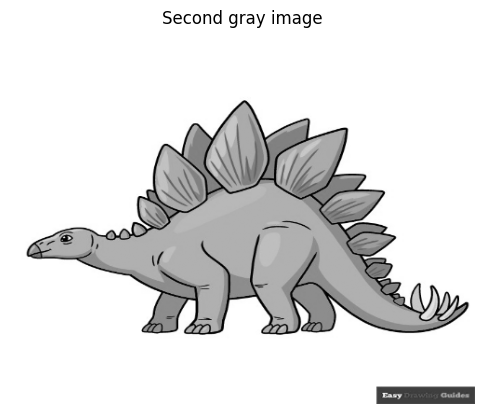

In [16]:
img_np_array_2 = np.frombuffer(img_data_2, np.uint8)
img_bgr_from_base64_2 = cv2.imdecode(img_np_array_2, cv2.IMREAD_COLOR)

img_rgb_2 = cv2.cvtColor(img_bgr_from_base64_2, cv2.COLOR_BGR2RGB)
size = (500, 400)
img_rgb_2 = cv2.resize(img_rgb_2, size)
img_gray_2 = cv2.cvtColor(img_rgb_2, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(6,6))
plt.imshow(img_gray_2, cmap='gray')
plt.title("Second gray image")
plt.axis("off")
plt.show()

Applying FFT

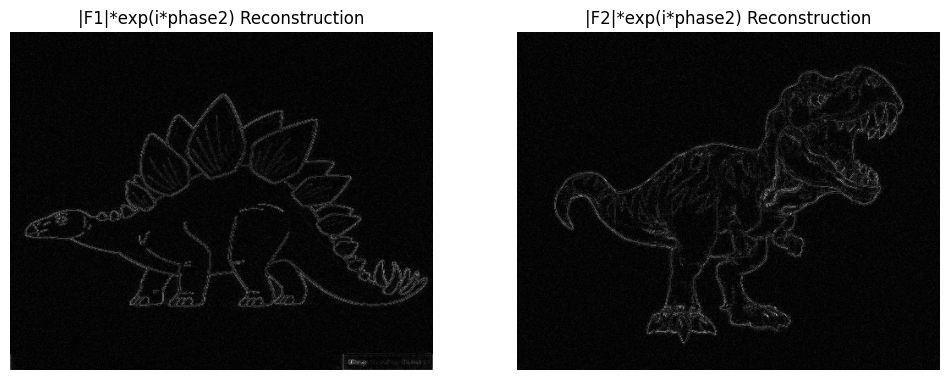

' The outputs clearly shows that phase preserves the overall structure of the image like we have combined the magnitude of image 1\n    with the phase of image 2 and vice versa , the the resulting plot we can see that due the phases the the outlines of the images\n    reversed.\n    The Magnitude only contributes the overall brightness and a subtle background texture/noise level.'

In [17]:
img_gray_2 = np.astype(img_gray_2, np.float32)
f2 = np.fft.fft2(img_gray_2)
fshift2 = np.fft.fftshift(f2)

# Calculating magnitude and phase
magnitude2 = 20*np.log(np.abs(fshift2) + 1)
phase2 = np.angle(fshift2)

# Combining magnitude and phases
freq1 = magnitude * np.exp(1j*phase2)
freq2 = magnitude2 * np.exp(1j*phase)

# Reconstruction
ishift_1 = np.fft.ifftshift(freq1)
img_1 = np.fft.ifft2(ishift_1)
img_1 = np.abs(img_1)

ishift_2 = np.fft.ifftshift(freq2)
img_2 = np.fft.ifft2(ishift_2)
img_2 = np.abs(img_2)

# Plotting the Results
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.imshow(img_1, cmap='gray')
plt.title("|F1|*exp(i*phase2) Reconstruction")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img_2, cmap='gray')
plt.title("|F2|*exp(i*phase2) Reconstruction")
plt.axis("off")
plt.show()

''' The outputs clearly shows that phase preserves the overall structure of the image like we have combined the magnitude of image 1
    with the phase of image 2 and vice versa , the the resulting plot we can see that due the phases the the outlines of the images
    reversed.
    The Magnitude only contributes the overall brightness and a subtle background texture/noise level.'''